In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import json
import numpy as np
import re
import string
import nltk
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
with open('/content/drive/MyDrive/Train/train_data1.json', 'r') as file: # Replace this path with the dataset path in your local machine
    data = json.load(file)

In [ ]:
# Process JSON data
source_sentences_train = []
target_sentences_train = []

source_sentences_val = []
target_sentences_val = []

id_train = []
id_val = []

In [ ]:
for language_pair, language_data in data.items():
  print(f"Language Pair: {language_pair}")


Language Pair: English-Bengali
Language Pair: English-Hindi


In [ ]:
for language_pair, language_data in data.items():
    if(language_pair == "English-Bengali"):
      print(f"Language Pair: {language_pair}")
      for data_type, data_entries in language_data.items():
          print(f"  Data Type: {data_type}")
          for entry_id, entry_data in data_entries.items():
              source = entry_data["source"]
              target = entry_data["target"]
              if (data_type == "Validation"):
                source_sentences_val.append(source)
                target_sentences_val.append(target)
                id_val.append(entry_id)
              else:
                source_sentences_train.append(source)
                target_sentences_train.append(target)
                id_train.append(entry_id)

Language Pair: English-Bengali
  Data Type: Train


In [ ]:
with open('/content/drive/MyDrive/Train/val_data1.json', 'r') as file: # Replace this path with the dataset path in your local machine
    data = json.load(file)

In [ ]:
for language_pair, language_data in data.items():
    if(language_pair == "English-Bengali"):
      print(f"Language Pair: {language_pair}")
      for data_type, data_entries in language_data.items():
          print(f"  Data Type: {data_type}")
          for entry_id, entry_data in data_entries.items():
              source = entry_data["source"]
              #target = entry_data["target"]
              if (data_type == "Validation"):
                source_sentences_val.append(source)
                #target_sentences_val.append(target)
                #id_val.append(entry_id)
              #else:
                #source_sentences_train.append(source)
                #target_sentences_train.append(target)
                #id_train.append(entry_id)

Language Pair: English-Bengali
  Data Type: Validation


In [ ]:
print(len(source_sentences_train))
print(len(target_sentences_train))

print(len(source_sentences_val))
print(len(target_sentences_val))

68849
68849
9836
0


In [ ]:
x={'English':source_sentences_train,'Hindi':target_sentences_train}

In [ ]:
df=pd.DataFrame(x)

In [ ]:

df

,English,Hindi
0,cancel everything on my calendar,मेरे कैलेंडर पर सब कुछ रद्द करें
1,Adrenal hormone levels are at their peak durin...,अधिवृक्क के हार्मोन का स्तर प्रातःकाल में अपने...
2,"Golden threads are obtained from Surat, the qu...","स्वर्ण धागे सूरत से प्राप्त होते हैं, जिनकी गु..."
3,Look for agglutination within 30 seconds.,30 सेकेण्ड के भीतर एग्लूटिनेशन देखें।
4,The non-pompousness and informality of their l...,उनके जीवन की आडंबरहीनता एवं अनौपचारिकता उनके स...
...,...,...
80792,"So, is it that this is the optimization proble...","तो, यह अनुकूलन समस्या है जिसमें हम रुचि रखते थे।"
80793,In this Masjid made with red stones there are ...,लाल पत्थरों से बनायी गयी इस मस्जिद में हिन्दू ...
80794,"He began to work on the movie on August 17, 20...","उन्होंने 17 अगस्त, 2010 को फिल्म पर काम करना श..."
80795,start a new shopping list,एक नई खरीदारी सूची शुरू करें


In [ ]:
import nltk
from collections import Counter

In [ ]:
# Function to preprocess and remove punctuation and numbers
def preprocess_and_remove_punctuation(sentence):
    # Remove punctuation and numbers
    sentence = ''.join([char for char in sentence if char not in string.punctuation and not char.isdigit()])
    return sentence

In [ ]:
# Tokenization and Lowercasing
def preprocess(sentences):
    tokenized_sentences = [nltk.word_tokenize(preprocess_and_remove_punctuation(sentence.lower())) for sentence in sentences]
    return tokenized_sentences

In [ ]:
target_sentences_train = [re.sub(r'[a-zA-Z]','',hi) for hi in target_sentences_train] #optional

In [ ]:
english_tokens = preprocess(source_sentences_train)
english_test=preprocess(source_sentences_val)
hindi_tokens = preprocess(target_sentences_train)
hindi_test=preprocess(target_sentences_val)

In [ ]:
en_train=english_tokens
en_test=english_test
de_train=hindi_tokens
de_test=hindi_test

In [ ]:
en_index2word = ["<PAD>", "<SOS>", "<EOS>"]
de_index2word = ["<PAD>", "<SOS>", "<EOS>"]

for ds in [en_train, en_test]:
    for sent in ds:
        for token in sent:
            if token not in en_index2word:
                en_index2word.append(token)

for ds in [de_train, de_test]:
    for sent in ds:
        for token in sent:
            if token not in de_index2word:
                de_index2word.append(token)

In [ ]:
len(en_index2word)

61208

In [ ]:
len(de_index2word)

72202

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
en_word2index = {token: idx for idx, token in enumerate(en_index2word)}
de_word2index = {token: idx for idx, token in enumerate(de_index2word)}

In [ ]:
len(en_word2index)

61208

In [ ]:
en_lengths = sum([len(sent) for sent in en_train])/len(en_train)
de_lengths = sum([len(sent) for sent in de_train])/len(de_train)

In [ ]:
seq_length = 20

In [ ]:
def encode_and_pad(vocab, sent, max_length):
    sos = [vocab["<SOS>"]]
    eos = [vocab["<EOS>"]]
    pad = [vocab["<PAD>"]]

    if len(sent) < max_length - 2: # -2 for SOS and EOS
        n_pads = max_length - 2 - len(sent)
        encoded = [vocab[w] for w in sent]
        return sos + encoded + eos + pad * n_pads
    else: # sent is longer than max_length; truncating
        encoded = [vocab[w] for w in sent]
        truncated = encoded[:max_length - 2]
        return sos + truncated + eos

In [ ]:
en_train_encoded = [encode_and_pad(en_word2index, sent, seq_length) for sent in en_train]
en_test_encoded = [encode_and_pad(en_word2index, sent, seq_length) for sent in en_test]
de_train_encoded = [encode_and_pad(de_word2index, sent, seq_length) for sent in de_train]
de_test_encoded = [encode_and_pad(de_word2index, sent, seq_length) for sent in de_test]

In [ ]:
en_train_encoded[1]

[1, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 15, 16, 21, 22, 23, 2]

In [ ]:
batch_size = 50

train_x = np.array(en_train_encoded)
train_y = np.array(de_train_encoded)
test_x = np.array(en_test_encoded)
test_y = np.array(de_test_encoded)

train_ds = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
test_ds = TensorDataset(torch.from_numpy(test_x))


train_dl = DataLoader(train_ds, shuffle=True, batch_size=batch_size, drop_last=True)
#test_dl = DataLoader(test_ds, shuffle=True, batch_size=batch_size, drop_last=True)

 Updated GRU Encoder and Decoder

In [ ]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size, dropout=0.3):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size, padding_idx=0)
        self.dropout = nn.Dropout(dropout)
        self.gru = nn.GRU(hidden_size, hidden_size, batch_first=True)

    def forward(self, input, hidden):
        embedded = self.embedding(input)
        embedded = self.dropout(embedded)   # Apply dropout to embeddings
        output, hidden = self.gru(embedded, hidden)
        return output, hidden

    def initHidden(self, batch_size):
        return torch.zeros(1, batch_size, self.hidden_size, device=device)


In [ ]:
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout=0.3):
        super(DecoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(output_size, hidden_size, padding_idx=0)
        self.dropout = nn.Dropout(dropout)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        output = self.embedding(input)
        output = self.dropout(output)  # Apply dropout to embeddings
        output = F.relu(output)
        output, hidden = self.gru(output, hidden)
        output = self.softmax(self.out(output[0]))
        return output, hidden


In [ ]:
hidden_size = 256
batch_size = 50
seq_length = 20
epochs = 5

# Example: replace with your actual vocab sizes
input_size = len(en_word2index)    # English vocab size
output_size = len(de_index2word)   # Target language vocab size

encoder = EncoderRNN(input_size, hidden_size).to(device)
decoder = DecoderRNN(hidden_size, output_size).to(device)

enc_optimizer = torch.optim.Adam(encoder.parameters(), lr=0.001)
dec_optimizer = torch.optim.Adam(decoder.parameters(), lr=0.001)
criterion = nn.NLLLoss(ignore_index=0)

In [ ]:
import random

In [ ]:
EOS = en_word2index["<EOS>"]

In [ ]:
SOS_token = en_word2index["<SOS>"]

PAD_token = 0

losses = []

# ---------------------------
# Training Loop
# ---------------------------
for epoch in range(1, epochs + 1):
    epoch_loss = 0.0
    print(f"\nEpoch {epoch}/{epochs}")

    # Teacher forcing ratio decays from 1.0 → 0.5 over epochs
    teacher_forcing_ratio = 1.0 - (epoch - 1) * 0.5 / (epochs - 1)

    for idx, batch in enumerate(train_dl):
        input_tensor = batch[0].to(device)   # shape: [batch_size, seq_length]
        target_tensor = batch[1].to(device)  # shape: [batch_size, seq_length]
        current_batch_size = input_tensor.size(0)  # <-- this gets actual batch size

        encoder_hidden = encoder.initHidden(current_batch_size)

        enc_optimizer.zero_grad()
        dec_optimizer.zero_grad()

        encoder_output, encoder_hidden = encoder(input_tensor, encoder_hidden)

        decoder_input = target_tensor[:, 0].unsqueeze(0)  # SOS token
        decoder_hidden = encoder_hidden

        dec_result = torch.zeros(seq_length, current_batch_size, output_size, device=device)

        for t in range(1, seq_length):
            decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)

            topv, topi = decoder_output.topk(1)
            use_teacher_forcing = random.random() < teacher_forcing_ratio
            decoder_input = (target_tensor[:, t] if use_teacher_forcing else topi.squeeze(1)).unsqueeze(0)

            dec_result[t] = decoder_output

        # scores = dec_result.transpose(1, 0)[1:].reshape(-1, output_size)
        # targets = target_tensor[:, 1:].reshape(-1)
        # ✅ CORRECTED LINES:
        # 1. Slice the sequence dimension FIRST to remove the initial zeros
        scores = dec_result[1:].transpose(0, 1)

        # 2. Reshape to match the targets
        scores = scores.reshape(-1, output_size)

        # 3. The targets line is already correct!
        targets = target_tensor[:, 1:].reshape(-1)
        loss = criterion(scores, targets)
        loss.backward()

        torch.nn.utils.clip_grad_norm_(encoder.parameters(), 1.0)
        torch.nn.utils.clip_grad_norm_(decoder.parameters(), 1.0)

        enc_optimizer.step()
        dec_optimizer.step()

        losses.append(loss.item())
        epoch_loss += loss.item()

        if idx % 100 == 0:
            avg_loss = sum(losses) / len(losses)
            print(f"Batch {idx}: avg_loss = {avg_loss:.4f}")

    print(f"Epoch {epoch} finished | Average Loss: {epoch_loss / len(train_dl):.4f}")

print("\nTraining complete ")



Epoch 1/5
Batch 0: avg_loss = 11.5689
Batch 100: avg_loss = 9.0049
Batch 200: avg_loss = 8.7129
Batch 300: avg_loss = 8.5515
Batch 400: avg_loss = 8.4463
Batch 500: avg_loss = 8.3571
Batch 600: avg_loss = 8.2755
Batch 700: avg_loss = 8.2072
Batch 800: avg_loss = 8.1442
Batch 900: avg_loss = 8.0847
Batch 1000: avg_loss = 8.0323
Batch 1100: avg_loss = 7.9803
Batch 1200: avg_loss = 7.9375
Batch 1300: avg_loss = 7.8978
Epoch 1 finished | Average Loss: 7.8695

Epoch 2/5
Batch 0: avg_loss = 7.8688
Batch 100: avg_loss = 7.8063
Batch 200: avg_loss = 7.7503
Batch 300: avg_loss = 7.6995
Batch 400: avg_loss = 7.6524
Batch 500: avg_loss = 7.6084
Batch 600: avg_loss = 7.5687
Batch 700: avg_loss = 7.5325
Batch 800: avg_loss = 7.4987
Batch 900: avg_loss = 7.4675
Batch 1000: avg_loss = 7.4379
Batch 1100: avg_loss = 7.4083
Batch 1200: avg_loss = 7.3822
Batch 1300: avg_loss = 7.3564
Epoch 2 finished | Average Loss: 6.8073

Epoch 3/5
Batch 0: avg_loss = 7.3380
Batch 100: avg_loss = 7.2987
Batch 200: avg

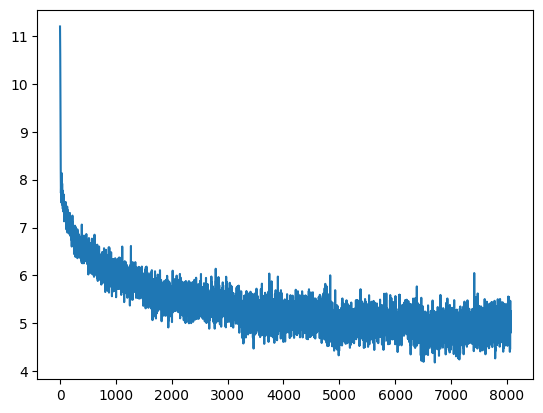

In [ ]:
plt.plot(losses)

In [ ]:
from tqdm import tqdm

In [ ]:
val_ids = [ i for i,_ in data["English-Hindi"]["Validation"].items()]

In [ ]:
input_length = target_length = seq_length

In [ ]:
val_outs = []
for i in tqdm(range(len(test_ds))):
  encoder_hidden = torch.zeros(1, 1, hidden_size).to(device)
  input_tensor = test_ds[i][0].unsqueeze(dim=0).to(device)
  result = []
  with torch.set_grad_enabled(False):
    encoder_output, encoder_hidden = encoder(input_tensor, encoder_hidden)
    decoder_input = torch.tensor([SOS_token]).unsqueeze(dim=0).to(device)
    decoder_hidden = encoder_hidden
    for di in range(1, target_length):
        decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
        best = decoder_output.argmax(1)
        result.append(de_index2word[best.to('cpu').item()])
        if best.item() == EOS:
            break

        decoder_input = best.unsqueeze(dim=0)
  result = [i for i in result if not i in ['<EOS>', '<PAD>', '<SOS>']]
  val_outs.append(" ".join(result))

100%|██████████| 11543/11543 [02:11<00:00, 87.89it/s]


In [ ]:
df0 = pd.DataFrame()
df0["ID"] = val_ids
df0["Translation"] = val_outs

In [ ]:
df0.to_csv('answersH.csv', index = False)

In [ ]:
x=pd.read_csv("/content/answersH.csv")

In [ ]:
x

,ID,Translation
0,505511,इस सप्ताह को मेरे करने के लिए मेरा क्या होगा
1,505512,प्रॉपर और और और और
2,505513,जौ का उपयोग किया जाता है जो भी चारे के लिए उपय...
3,505514,इस ने फिल्म को लिए के लिए के लिए के लिए के लिए...
4,505515,राजाजी राष्‍ट्रीय उद्यान का सबसे राष्ट्रीय राष...
...,...,...
11538,517049,उनके पिता के के के के के दो और के बाद में और औ...
11539,517050,यह कारण है कि इस क्षेत्र में के कारण में में म...
11540,517051,मुझे पिनकोड में सभी राज्य में सभी टीकाकरण केंद...
11541,517052,दिसंबर में में लोग के लोगों के द्वारा में से प...


Now do the same for bengali language

Now do the same for bengali language

In [ ]:
with open('/content/drive/MyDrive/Train/train_data1.json', 'r') as file: # Replace this path with the dataset path in your local machine
    data = json.load(file)

In [ ]:
# Process JSON data
source_sentences_train = []
target_sentences_train = []

source_sentences_val = []
target_sentences_val = []

id_train = []
id_val = []

In [ ]:
for language_pair, language_data in data.items():
    if(language_pair == "English-Bengali"):
      print(f"Language Pair: {language_pair}")
      for data_type, data_entries in language_data.items():
          print(f"  Data Type: {data_type}")
          for entry_id, entry_data in data_entries.items():
              source = entry_data["source"]
              target = entry_data["target"]
              if (data_type == "Validation"):
                source_sentences_val.append(source)
                target_sentences_val.append(target)
                id_val.append(entry_id)
              else:
                source_sentences_train.append(source)
                target_sentences_train.append(target)
                id_train.append(entry_id)

Language Pair: English-Bengali
  Data Type: Train


In [ ]:
with open('/content/drive/MyDrive/Train/val_data1.json', 'r') as file: # Replace this path with the dataset path in your local machine
    data = json.load(file)

In [ ]:
for language_pair, language_data in data.items():
    if(language_pair == "English-Bengali"):
      print(f"Language Pair: {language_pair}")
      for data_type, data_entries in language_data.items():
          print(f"  Data Type: {data_type}")
          for entry_id, entry_data in data_entries.items():
              source = entry_data["source"]
              #target = entry_data["target"]
              if (data_type == "Validation"):
                source_sentences_val.append(source)
                #target_sentences_val.append(target)
                #id_val.append(entry_id)
              #else:
                #source_sentences_train.append(source)
                #target_sentences_train.append(target)
                #id_train.append(entry_id)

Language Pair: English-Bengali
  Data Type: Validation


In [ ]:
print(len(source_sentences_train))
print(len(target_sentences_train))

print(len(source_sentences_val))
print(len(target_sentences_val))

68849
68849
9836
0


In [ ]:
x={'English':source_sentences_train,'Bengali':target_sentences_train}

In [ ]:
df=pd.DataFrame(x)

In [ ]:

df

,English,Bengali
0,Do not forget to visit the point where the Nar...,এই জায়গাগুলো দেখতে ভুলো না যেখানে নর্মদা নদী ম...
1,It is evident that the biggest cause of povert...,এই কথা স্পষ্ট যে দরিদ্রতার বড় কারণ হল অশিক্ষা ।
2,The film was released theatrically on 12 April...,চলচ্চিত্রটি ২০১৩ সালের ১২ই এপ্রিল প্রেক্ষাগৃহে...
3,is wyatt's birthday party at ten p. m.,অনিমেষ এর জন্মদিনের পার্টি রাত দশটায়
4,"Apart from being used as an eatable, barley is...",খাদ্যদ্রব্য ছাড়াও যব আরো বিভিন্ন ক্ষেত্রে যেমন...
...,...,...
68844,But it is evident that there is change in both...,তাও এটা প্রত্যক্ষভাবে দেখা যায় যে প্রিন্ট মিড...
68845,Include a detailed listing of all of your prod...,ছবি সহ সম্পূর্ণ করা আপনার সমস্ত পণ্যের একটি বি...
68846,"Each subcategory counts as one page, pages in ...",প্রতিটি উপবিভাগ একটি পৃষ্ঠা হিসাবে গণনা করা হয...
68847,It is one of the country's oldest state-run pu...,এটি দেশের সবচেয়ে পুরনো রাষ্ট্র-চালিত সরকারী বা...


In [ ]:
# Function to preprocess and remove punctuation and numbers
def preprocess_and_remove_punctuation(sentence):
    # Remove punctuation and numbers
    sentence = ''.join([char for char in sentence if char not in string.punctuation and not char.isdigit()])
    return sentence

In [ ]:
# Tokenization and Lowercasing
def preprocess(sentences):
    tokenized_sentences = [nltk.word_tokenize(preprocess_and_remove_punctuation(sentence.lower())) for sentence in sentences]
    return tokenized_sentences

In [ ]:
target_sentences_train = [re.sub(r'[a-zA-Z]','',hi) for hi in target_sentences_train] #optional

In [ ]:
english_tokens = preprocess(source_sentences_train)
english_test=preprocess(source_sentences_val)
Bengali_tokens = preprocess(target_sentences_train)
Bengali_test=preprocess(target_sentences_val)

In [ ]:
en_train=english_tokens
en_test=english_test
de_train=Bengali_tokens
de_test=Bengali_test

In [ ]:
en_index2word = ["<PAD>", "<SOS>", "<EOS>"]
de_index2word = ["<PAD>", "<SOS>", "<EOS>"]

for ds in [en_train, en_test]:
    for sent in ds:
        for token in sent:
            if token not in en_index2word:
                en_index2word.append(token)

for ds in [de_train, de_test]:
    for sent in ds:
        for token in sent:
            if token not in de_index2word:
                de_index2word.append(token)

In [ ]:
len(en_index2word)

57603

In [ ]:
len(de_index2word)

101703

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
en_word2index = {token: idx for idx, token in enumerate(en_index2word)}
de_word2index = {token: idx for idx, token in enumerate(de_index2word)}

In [ ]:
len(en_word2index)

57603

In [ ]:
en_lengths = sum([len(sent) for sent in en_train])/len(en_train)
de_lengths = sum([len(sent) for sent in de_train])/len(de_train)

In [ ]:
seq_length = 20

In [ ]:
def encode_and_pad(vocab, sent, max_length):
    sos = [vocab["<SOS>"]]
    eos = [vocab["<EOS>"]]
    pad = [vocab["<PAD>"]]

    if len(sent) < max_length - 2: # -2 for SOS and EOS
        n_pads = max_length - 2 - len(sent)
        encoded = [vocab[w] for w in sent]
        return sos + encoded + eos + pad * n_pads
    else: # sent is longer than max_length; truncating
        encoded = [vocab[w] for w in sent]
        truncated = encoded[:max_length - 2]
        return sos + truncated + eos

In [ ]:
en_train_encoded = [encode_and_pad(en_word2index, sent, seq_length) for sent in en_train]
en_test_encoded = [encode_and_pad(en_word2index, sent, seq_length) for sent in en_test]
de_train_encoded = [encode_and_pad(de_word2index, sent, seq_length) for sent in de_train]
de_test_encoded = [encode_and_pad(de_word2index, sent, seq_length) for sent in de_test]

In [ ]:
en_train_encoded[1]

[1, 23, 24, 25, 26, 8, 27, 28, 29, 30, 24, 31, 2, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
batch_size = 50

train_x = np.array(en_train_encoded)
train_y = np.array(de_train_encoded)
test_x = np.array(en_test_encoded)
test_y = np.array(de_test_encoded)

train_ds = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
test_ds = TensorDataset(torch.from_numpy(test_x))


train_dl = DataLoader(train_ds, shuffle=True, batch_size=batch_size, drop_last=True)
#test_dl = DataLoader(test_ds, shuffle=True, batch_size=batch_size, drop_last=True)

In [ ]:
print(len(train_dl))

1376


In [ ]:
train_x[1]

array([ 1, 23, 24, 25, 26,  8, 27, 28, 29, 30, 24, 31,  2,  0,  0,  0,  0,
        0,  0,  0])

In [ ]:
train_ds[1]

(tensor([ 1, 23, 24, 25, 26,  8, 27, 28, 29, 30, 24, 31,  2,  0,  0,  0,  0,  0,
          0,  0]),
 tensor([ 1,  3, 26, 27, 28, 29, 30, 31, 32, 33, 34,  2,  0,  0,  0,  0,  0,  0,
          0,  0]))

In [ ]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        # Embedding layer
        self.embedding = nn.Embedding(input_size, hidden_size, padding_idx=0)

        # GRU layer. The input and output are both of the same size
        #  since embedding size = hidden size in this example
        self.gru = nn.GRU(hidden_size, hidden_size, batch_first=True)

    def forward(self, input, hidden):
        # The inputs are first transformed into embeddings
        embedded = self.embedding(input)
        output = embedded

        # As in any RNN, the new input and the previous hidden states are fed
        #  into the model at each time step
        output, hidden = self.gru(output, hidden)
        return output, hidden

    def initHidden(self):
        # This method is used to create the innitial hidden states for the encoder
        return torch.zeros(1, batch_size, self.hidden_size)

In [ ]:
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(DecoderRNN, self).__init__()
        self.hidden_size = hidden_size

        # Embedding layer
        self.embedding = nn.Embedding(output_size, hidden_size, padding_idx=0)

        # The GRU layer
        self.gru = nn.GRU(hidden_size, hidden_size)

        # Fully-connected layer for scores
        self.out = nn.Linear(hidden_size, output_size)

        # Applying Softmax to the scores
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        # Feeding input through embedding layer
        output = self.embedding(input)

        # Applying an activation function (ReLu)
        output = F.relu(output)

        # Feeding input and previous hidden state
        output, hidden = self.gru(output, hidden)

        # Outputting scores from the final time-step
        output = self.softmax(self.out(output[0]))

        return output, hidden

    # We do not need an .initHidden() method for the decoder since the encoder output will act as input in the first decoder time-step

In [ ]:
hidden_size = 128


In [ ]:
seq_length = 20

In [ ]:
encoder = EncoderRNN(len(en_index2word), hidden_size).to(device)
decoder = DecoderRNN(hidden_size, len(de_index2word)).to(device)

In [ ]:
encoder

EncoderRNN(
  (embedding): Embedding(57603, 128, padding_idx=0)
  (gru): GRU(128, 128, batch_first=True)
)

In [ ]:
decoder

DecoderRNN(
  (embedding): Embedding(101703, 128, padding_idx=0)
  (gru): GRU(128, 128)
  (out): Linear(in_features=128, out_features=101703, bias=True)
  (softmax): LogSoftmax(dim=1)
)

In [ ]:
criterion = nn.NLLLoss()
enc_optimizer = torch.optim.Adam(encoder.parameters(), lr = 3e-3)
dec_optimizer = torch.optim.Adam(decoder.parameters(), lr = 3e-3)

In [ ]:
losses = []

In [ ]:
input_length = target_length = seq_length

SOS = en_word2index["<SOS>"]
EOS = en_word2index["<EOS>"]

epochs = 1

for epoch in range(epochs):
    for idx, batch in enumerate(train_dl):

        # Creating initial hidden states for the encoder
        encoder_hidden = encoder.initHidden()

        # Sending to device
        encoder_hidden = encoder_hidden.to(device)

        # Assigning the input and sending to device
        input_tensor = batch[0].to(device)

        # Assigning the output and sending to device
        target_tensor = batch[1].to(device)


        # Clearing gradients
        enc_optimizer.zero_grad()
        dec_optimizer.zero_grad()

        # Enabling gradient calculation
        with torch.set_grad_enabled(True):

            # Feeding batch into encoder
            encoder_output, encoder_hidden = encoder(input_tensor, encoder_hidden)

            # This is a placeholder tensor for decoder outputs. We send it to device as well
            dec_result = torch.zeros(target_length, batch_size, len(de_index2word)).to(device)

            # Creating a batch of SOS tokens which will all be fed to the decoder
            decoder_input = target_tensor[:, 0].unsqueeze(dim=0).to(device)

            # Creating initial hidden states of the decoder by copying encoder hidden states
            decoder_hidden = encoder_hidden

            # For each time-step in decoding:
            for i in range(1, target_length):

                # Feed input and previous hidden states
                decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)

                # Finding the best scoring word
                best = decoder_output.argmax(1)

                # Assigning next input as current best word
                decoder_input = best.unsqueeze(dim=0)

                # Creating an entry in the placeholder output tensor
                dec_result[i] = decoder_output


            # Creating scores and targets for loss calculation
            scores = dec_result.transpose(1, 0)[1:].reshape(-1, dec_result.shape[2])
            targets = target_tensor[1:].reshape(-1)

            # Calculating loss
            loss = criterion(scores, targets)

            # Performing backprop and clipping excess gradients
            loss.backward()

            torch.nn.utils.clip_grad_norm_(encoder.parameters(), max_norm=1)
            torch.nn.utils.clip_grad_norm_(decoder.parameters(), max_norm=1)

            enc_optimizer.step()
            dec_optimizer.step()

            # Keeping track of loss
            losses.append(loss.item())
            if idx % 100 == 0:
                print(idx, sum(losses)/len(losses))

0 10.957625389099121
100 6.685693986345045
200 6.324854990736169
300 6.173510907892373
400 6.077534907476563
500 6.010810722609956
600 5.959106319954312
700 5.917382862020321
800 5.872796776589383
900 5.840219265348241
1000 5.8097001903659695
1100 5.780211636199397
1200 5.749883790298068
1300 5.723036452314654


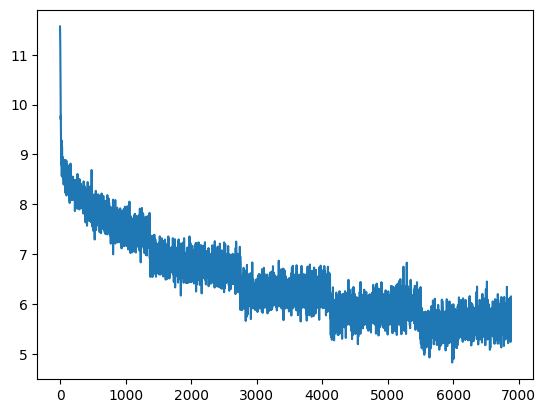

In [ ]:
plt.plot(losses)

In [ ]:
from tqdm import tqdm

In [ ]:
val_ids = [ i for i,_ in data["English-Bengali"]["Validation"].items()]

In [ ]:
val_outs = []
for i in tqdm(range(len(test_ds))):
  encoder_hidden = torch.zeros(1, 1, hidden_size).to(device)
  input_tensor = test_ds[i][0].unsqueeze(dim=0).to(device)
  result = []
  with torch.set_grad_enabled(False):
    encoder_output, encoder_hidden = encoder(input_tensor, encoder_hidden)
    decoder_input = torch.tensor([SOS_token]).unsqueeze(dim=0).to(device)
    decoder_hidden = encoder_hidden
    for di in range(1, target_length):
        decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
        best = decoder_output.argmax(1)
        result.append(de_index2word[best.to('cpu').item()])
        if best.item() == EOS:
            break

        decoder_input = best.unsqueeze(dim=0)
  result = [i for i in result if not i in ['<EOS>', '<PAD>', '<SOS>']]
  val_outs.append(" ".join(result))

100%|██████████| 9836/9836 [01:48<00:00, 90.65it/s]


In [ ]:
df1 = pd.DataFrame()
df1["ID"] = val_ids
df1["Translation"] = val_outs

In [ ]:
df1.to_csv('answersB.csv', index = False)

In [ ]:
x=pd.read_csv("/content/answersB.csv")

In [ ]:
x

,ID,Translation
0,147532,কিছু মন্দির থেকে থেকে থেকে করা যেতে পারে এবং এ...
1,147533,অন্য দিকে থেকে অন্য দিকে অন্য দিকে থেকে অন্য দ...
2,147534,মার্কিন যুক্তরাষ্ট্রে এবং এবং জন্য এবং এবং এবং...
3,147535,মিজোরামের জনসংখ্যা জনসংখ্যা জনসংখ্যা ছিল ছিল
4,147536,দাদরা হল একটি এবং এবং এবং একটি জেলার একটি একটি
...,...,...
9831,157363,এই রোগ এই প্রথম বার হয় ৷
9832,157364,এখানে বিখ্যাত এখানে
9833,157365,নিকটতম নিকটতম খুঁজুন
9834,157366,এর আগে এবং এবং এবং এবং


# Do the above same thing for English-Bengali.

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv("/content/answersB.csv") # Bengali
df2= pd.read_csv("/content/answersH.csv")  # Hindi

In [ ]:
df3 = pd.concat([df1, df2]) #Concat

In [ ]:
df3

,ID,Translation
0,177039,বর্তমান ঘটনা
1,177040,ঈশ্বর ঈশ্বর তাঁর <unk> কাছে খুশি ছিলেন কিন্তু ...
2,177041,বুকে ব্যাথা হলে বা জোরে জোরে জোরে জোরে চূর্ণ ক...
3,177042,তার উপর এটা স্বীকার করে যে শিশু সত্যি বলতে থাক...
4,177043,অস্ট্রেলিয়ার <unk> <unk> বেশী মাত্রায় পাওয়া যায় ।
...,...,...
23080,563219,राम को एक ईमेल भेजें और उनसे पूछें कि वह अब क्...
23081,563220,बोस की पहल पर उड़ीसा सरकार ने में भुवनेश्वर मे...
23082,563221,को कसकर बंद कमरे में डिग्री सेल्सियस तक हो जान...
23083,563222,श्‍वास छोड़ते हुए दोनों हाथों से बायें पैर को ...


In [ ]:
df3.to_csv('answersBH.csv', index = False)

In [ ]:
filtered_data = pd.read_csv("/content/answersBH.csv")

In [ ]:
answer = "/content/answer.csv"
with open(answer, "w") as f:
  f.writelines("ID\tTranslation\n")
  for i in range(filtered_data.shape[0]):
    f.writelines(f'{filtered_data["ID"][i]}\t"{filtered_data["Translation"][i]}"\n')

Attention with GRU

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import json
import numpy as np
import re
import string
import nltk
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
with open('/content/drive/MyDrive/Train/train_data1.json', 'r') as file: # Replace this path with the dataset path in your local machine
    data = json.load(file)

In [ ]:
# Process JSON data
source_sentences_train = []
target_sentences_train = []

source_sentences_val = []
target_sentences_val = []

id_train = []
id_val = []

In [ ]:
for language_pair, language_data in data.items():
  print(f"Language Pair: {language_pair}")


Language Pair: English-Bengali
Language Pair: English-Hindi


In [ ]:
for language_pair, language_data in data.items():
    if(language_pair == "English-Hindi"):
      print(f"Language Pair: {language_pair}")
      for data_type, data_entries in language_data.items():
          print(f"  Data Type: {data_type}")
          for entry_id, entry_data in data_entries.items():
              source = entry_data["source"]
              target = entry_data["target"]
              if (data_type == "Validation"):
                source_sentences_val.append(source)
                target_sentences_val.append(target)
                id_val.append(entry_id)
              else:
                source_sentences_train.append(source)
                target_sentences_train.append(target)
                id_train.append(entry_id)

Language Pair: English-Hindi
  Data Type: Train


In [ ]:
with open('/content/drive/MyDrive/Train/val_data1.json', 'r') as file: # Replace this path with the dataset path in your local machine
    data = json.load(file)

In [ ]:
for language_pair, language_data in data.items():
    if(language_pair == "English-Hindi"):
      print(f"Language Pair: {language_pair}")
      for data_type, data_entries in language_data.items():
          print(f"  Data Type: {data_type}")
          for entry_id, entry_data in data_entries.items():
              source = entry_data["source"]
              #target = entry_data["target"]
              if (data_type == "Validation"):
                source_sentences_val.append(source)
                #target_sentences_val.append(target)
                #id_val.append(entry_id)
              #else:
                #source_sentences_train.append(source)
                #target_sentences_train.append(target)
                #id_train.append(entry_id)

Language Pair: English-Hindi
  Data Type: Validation


In [ ]:
print(len(source_sentences_train))
print(len(target_sentences_train))

print(len(source_sentences_val))
print(len(target_sentences_val))

80797
80797
11543
0


In [ ]:
x={'English':source_sentences_train,'Hindi':target_sentences_train}

In [ ]:
df=pd.DataFrame(x)

In [ ]:

df

,English,Hindi
0,cancel everything on my calendar,मेरे कैलेंडर पर सब कुछ रद्द करें
1,Adrenal hormone levels are at their peak durin...,अधिवृक्क के हार्मोन का स्तर प्रातःकाल में अपने...
2,"Golden threads are obtained from Surat, the qu...","स्वर्ण धागे सूरत से प्राप्त होते हैं, जिनकी गु..."
3,Look for agglutination within 30 seconds.,30 सेकेण्ड के भीतर एग्लूटिनेशन देखें।
4,The non-pompousness and informality of their l...,उनके जीवन की आडंबरहीनता एवं अनौपचारिकता उनके स...
...,...,...
80792,"So, is it that this is the optimization proble...","तो, यह अनुकूलन समस्या है जिसमें हम रुचि रखते थे।"
80793,In this Masjid made with red stones there are ...,लाल पत्थरों से बनायी गयी इस मस्जिद में हिन्दू ...
80794,"He began to work on the movie on August 17, 20...","उन्होंने 17 अगस्त, 2010 को फिल्म पर काम करना श..."
80795,start a new shopping list,एक नई खरीदारी सूची शुरू करें


In [ ]:
import nltk
from collections import Counter

In [ ]:
# Function to preprocess and remove punctuation and numbers
def preprocess_and_remove_punctuation(sentence):
    # Remove punctuation and numbers
    sentence = ''.join([char for char in sentence if char not in string.punctuation and not char.isdigit()])
    return sentence

In [ ]:
# Tokenization and Lowercasing
def preprocess(sentences):
    tokenized_sentences = [nltk.word_tokenize(preprocess_and_remove_punctuation(sentence.lower())) for sentence in sentences]
    return tokenized_sentences

In [ ]:
target_sentences_train = [re.sub(r'[a-zA-Z]','',hi) for hi in target_sentences_train] #optional

In [ ]:
english_tokens = preprocess(source_sentences_train)
english_test=preprocess(source_sentences_val)
hindi_tokens = preprocess(target_sentences_train)
hindi_test=preprocess(target_sentences_val)

In [ ]:
en_train=english_tokens
en_test=english_test
de_train=hindi_tokens
de_test=hindi_test

In [ ]:
en_index2word = ["<PAD>", "<SOS>", "<EOS>"]
de_index2word = ["<PAD>", "<SOS>", "<EOS>"]

for ds in [en_train, en_test]:
    for sent in ds:
        for token in sent:
            if token not in en_index2word:
                en_index2word.append(token)

for ds in [de_train, de_test]:
    for sent in ds:
        for token in sent:
            if token not in de_index2word:
                de_index2word.append(token)

In [ ]:
len(en_index2word)

61208

In [ ]:
len(de_index2word)

72202

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
en_word2index = {token: idx for idx, token in enumerate(en_index2word)}
de_word2index = {token: idx for idx, token in enumerate(de_index2word)}

In [ ]:
len(en_word2index)

61208

In [ ]:
en_lengths = sum([len(sent) for sent in en_train])/len(en_train)
de_lengths = sum([len(sent) for sent in de_train])/len(de_train)

In [ ]:
seq_length = 20

In [ ]:
def encode_and_pad(vocab, sent, max_length):
    sos = [vocab["<SOS>"]]
    eos = [vocab["<EOS>"]]
    pad = [vocab["<PAD>"]]

    if len(sent) < max_length - 2: # -2 for SOS and EOS
        n_pads = max_length - 2 - len(sent)
        encoded = [vocab[w] for w in sent]
        return sos + encoded + eos + pad * n_pads
    else: # sent is longer than max_length; truncating
        encoded = [vocab[w] for w in sent]
        truncated = encoded[:max_length - 2]
        return sos + truncated + eos

In [ ]:
en_train_encoded = [encode_and_pad(en_word2index, sent, seq_length) for sent in en_train]
en_test_encoded = [encode_and_pad(en_word2index, sent, seq_length) for sent in en_test]
de_train_encoded = [encode_and_pad(de_word2index, sent, seq_length) for sent in de_train]
de_test_encoded = [encode_and_pad(de_word2index, sent, seq_length) for sent in de_test]

In [ ]:
en_train_encoded[1]

[1, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 15, 16, 21, 22, 23, 2]

In [ ]:
batch_size = 50

train_x = np.array(en_train_encoded)
train_y = np.array(de_train_encoded)
test_x = np.array(en_test_encoded)
test_y = np.array(de_test_encoded)

train_ds = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
test_ds = TensorDataset(torch.from_numpy(test_x))


train_dl = DataLoader(train_ds, shuffle=True, batch_size=batch_size, drop_last=True)
#test_dl = DataLoader(test_ds, shuffle=True, batch_size=batch_size, drop_last=True)

In [ ]:
print(len(train_dl))

1615


In [ ]:
train_x[1]

array([ 1,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 15, 16, 21,
       22, 23,  2])

In [ ]:
train_ds[1]

(tensor([ 1,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 15, 16, 21, 22,
         23,  2]),
 tensor([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18,  5, 19, 20, 21, 22, 23, 24, 25,
         26,  2]))

 Updated GRU with attention

In [ ]:
import os
from tqdm import tqdm
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F

# ---------------- Hyperparameters ----------------
hidden_size = 256
num_epochs = 8
save_epochs = [1, 3, 5, 8]

# ---------------- Encoder ----------------
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size, dropout=0.4):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size, padding_idx=0)
        self.gru = nn.GRU(hidden_size, hidden_size, batch_first=True, dropout=dropout if hidden_size > 1 else 0)

    def forward(self, input, hidden):
        embedded = self.embedding(input)
        output, hidden = self.gru(embedded, hidden)
        return output, hidden

    def initHidden(self, batch_size, device):
        return torch.zeros(1, batch_size, self.hidden_size, device=device)

# ---------------- Luong Attention Decoder ----------------
class LuongAttentionDecoder(nn.Module):
    def __init__(self, hidden_size, output_size, dropout=0.4, max_length=20):
        super(LuongAttentionDecoder, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout = nn.Dropout(dropout)
        self.max_length = max_length

        self.embedding = nn.Embedding(output_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.attn = nn.Linear(hidden_size*2, max_length)
        self.attn_combine = nn.Linear(hidden_size*2, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input)
        embedded = self.dropout(embedded)

        # Compute attention weights
        attn_weights = F.softmax(
            self.attn(torch.cat((embedded[0], hidden[0]), 1)), dim=1
        )
        attn_applied = torch.bmm(attn_weights.unsqueeze(1), encoder_outputs)

        output = torch.cat((embedded[0], attn_applied.squeeze(1)), 1)
        output = self.attn_combine(output).unsqueeze(0)
        output = F.relu(output)

        output, hidden = self.gru(output, hidden)
        output = self.softmax(self.out(output[0]))
        return output, hidden, attn_weights


In [ ]:
# ---------------- Initialize Model, Criterion, Optimizers ----------------
encoder = EncoderRNN(input_size=len(en_word2index), hidden_size=hidden_size, dropout=0.4).to(device)
decoder = LuongAttentionDecoder(hidden_size=hidden_size, output_size=len(de_index2word), dropout=0.4).to(device)

criterion = nn.NLLLoss(ignore_index=0)
enc_optimizer = torch.optim.Adam(encoder.parameters(), lr=0.002)
dec_optimizer = torch.optim.Adam(decoder.parameters(), lr=0.002)

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.4 and num_layers=1
  warnings.warn(


In [ ]:
input_length = target_length = seq_length

SOS = en_word2index["<SOS>"]
EOS = en_word2index["<EOS>"]

In [ ]:
# ---------------- Training Loop ----------------
print("Starting training...")

for epoch in range(1, num_epochs + 1):
    encoder.train()
    decoder.train()
    total_loss = 0

    for idx, batch in enumerate(train_dl):
        input_tensor = batch[0].to(device)
        target_tensor = batch[1].to(device)
        batch_size_current = input_tensor.size(0)

        encoder_hidden = encoder.initHidden(batch_size_current, device)

        enc_optimizer.zero_grad()
        dec_optimizer.zero_grad()

        encoder_outputs, encoder_hidden = encoder(input_tensor, encoder_hidden)

        dec_result = torch.zeros(target_length, batch_size_current, len(de_index2word), device=device)
        decoder_input = target_tensor[:, 0].unsqueeze(dim=0)
        decoder_hidden = encoder_hidden

        for t in range(1, target_length):
            decoder_output, decoder_hidden, _ = decoder(
                decoder_input.to(device), decoder_hidden, encoder_outputs
            )
            best = decoder_output.argmax(1)
            decoder_input = best.unsqueeze(0)
            dec_result[t] = decoder_output

        scores = dec_result.transpose(1, 0)[:, 1:].reshape(-1, dec_result.shape[2])
        targets = target_tensor[:, 1:].reshape(-1)

        loss = criterion(scores, targets)
        loss.backward()

        torch.nn.utils.clip_grad_norm_(encoder.parameters(), 1)
        torch.nn.utils.clip_grad_norm_(decoder.parameters(), 1)

        enc_optimizer.step()
        dec_optimizer.step()

        total_loss += loss.item()

        if idx % 100 == 0:
            avg_loss = total_loss / (idx + 1)
            print(f"Batch {idx}, Loss: {avg_loss:.4f}")

    avg_loss = total_loss / len(train_dl)
    print(f"\nEpoch {epoch}/{num_epochs} completed. Average Loss: {avg_loss:.4f}")

    # ---------------- Save Model Checkpoint ----------------
    os.makedirs("checkpoints", exist_ok=True)
    torch.save({
        'epoch': epoch,
        'encoder_state_dict': encoder.state_dict(),
        'decoder_state_dict': decoder.state_dict(),
        'enc_optimizer_state_dict': enc_optimizer.state_dict(),
        'dec_optimizer_state_dict': dec_optimizer.state_dict(),
        'loss': avg_loss,
    }, f"checkpoints/model_epoch_{epoch}.pth")
    print(f"💾 Model saved: checkpoints/model_epoch_{epoch}.pth")

    # ---------------- Validation Translation CSV ----------------
    if epoch in [1,3,5,8]:
        print(f"\n🟢 Generating translations for epoch {epoch} ...")
        val_outs = []
        val_ids = [i for i, _ in data["English-Hindi"]["Validation"].items()]

        encoder.eval()
        decoder.eval()

        with torch.no_grad():
            for i in tqdm(range(len(test_ds))):
                input_tensor = test_ds[i][0].unsqueeze(dim=0).to(device)
                encoder_hidden = encoder.initHidden(1, device)
                result = []

                encoder_outputs, encoder_hidden = encoder(input_tensor, encoder_hidden)
                decoder_input = torch.tensor([SOS]).unsqueeze(dim=0).to(device)
                decoder_hidden = encoder_hidden

                for di in range(1, target_length):
                    decoder_output, decoder_hidden, _ = decoder(
                        decoder_input, decoder_hidden, encoder_outputs
                    )
                    best = decoder_output.argmax(1)
                    result.append(de_index2word[best.to('cpu').item()])
                    if best.item() == EOS:
                        break
                    decoder_input = best.unsqueeze(dim=0)

                result = [w for w in result if w not in ['<EOS>', '<PAD>', '<SOS>']]
                val_outs.append(" ".join(result))

        df = pd.DataFrame({
            "ID": val_ids,
            "Translation": val_outs
        })
        os.makedirs("results", exist_ok=True)
        save_path = f"results/answers_H_epoch_{epoch}.csv"
        df.to_csv(save_path, index=False)
        print(f"✅ Saved translations to {save_path}\n")

print("\n🎉 Training complete!")


Starting training...
Batch 0, Loss: 11.1880
Batch 100, Loss: 7.9745
Batch 200, Loss: 7.7966
Batch 300, Loss: 7.6416
Batch 400, Loss: 7.5012
Batch 500, Loss: 7.3892
Batch 600, Loss: 7.3012
Batch 700, Loss: 7.2215
Batch 800, Loss: 7.1539
Batch 900, Loss: 7.0933
Batch 1000, Loss: 7.0378
Batch 1100, Loss: 6.9889
Batch 1200, Loss: 6.9443
Batch 1300, Loss: 6.9013
Batch 1400, Loss: 6.8646
Batch 1500, Loss: 6.8272
Batch 1600, Loss: 6.7916

Epoch 1/8 completed. Average Loss: 6.7866
💾 Model saved: checkpoints/model_epoch_1.pth

🟢 Generating translations for epoch 1 ...


100%|██████████| 11543/11543 [02:32<00:00, 75.87it/s]


✅ Saved translations to results/answers_H_epoch_1.csv

Batch 0, Loss: 5.9948
Batch 100, Loss: 5.8441
Batch 200, Loss: 5.8455
Batch 300, Loss: 5.8415
Batch 400, Loss: 5.8318
Batch 500, Loss: 5.8241
Batch 600, Loss: 5.8160
Batch 700, Loss: 5.8084
Batch 800, Loss: 5.8016
Batch 900, Loss: 5.7970
Batch 1000, Loss: 5.7890
Batch 1100, Loss: 5.7820
Batch 1200, Loss: 5.7758
Batch 1300, Loss: 5.7694
Batch 1400, Loss: 5.7626
Batch 1500, Loss: 5.7558
Batch 1600, Loss: 5.7518

Epoch 2/8 completed. Average Loss: 5.7509
💾 Model saved: checkpoints/model_epoch_2.pth
Batch 0, Loss: 5.0898
Batch 100, Loss: 5.0266
Batch 200, Loss: 5.0290
Batch 300, Loss: 5.0382
Batch 400, Loss: 5.0450
Batch 500, Loss: 5.0556
Batch 600, Loss: 5.0634
Batch 700, Loss: 5.0666
Batch 800, Loss: 5.0725
Batch 900, Loss: 5.0750
Batch 1000, Loss: 5.0798
Batch 1100, Loss: 5.0841
Batch 1200, Loss: 5.0892
Batch 1300, Loss: 5.0950
Batch 1400, Loss: 5.0977
Batch 1500, Loss: 5.1002
Batch 1600, Loss: 5.1017

Epoch 3/8 completed. Average L

100%|██████████| 11543/11543 [02:38<00:00, 72.77it/s]


✅ Saved translations to results/answers_H_epoch_3.csv

Batch 0, Loss: 4.4327
Batch 100, Loss: 4.4241
Batch 200, Loss: 4.4270
Batch 300, Loss: 4.4405
Batch 400, Loss: 4.4571
Batch 500, Loss: 4.4694
Batch 600, Loss: 4.4817
Batch 700, Loss: 4.4954
Batch 800, Loss: 4.5106
Batch 900, Loss: 4.5200
Batch 1000, Loss: 4.5299
Batch 1100, Loss: 4.5406
Batch 1200, Loss: 4.5479
Batch 1300, Loss: 4.5561
Batch 1400, Loss: 4.5645
Batch 1500, Loss: 4.5733
Batch 1600, Loss: 4.5819

Epoch 4/8 completed. Average Loss: 4.5829
💾 Model saved: checkpoints/model_epoch_4.pth
Batch 0, Loss: 4.2494
Batch 100, Loss: 4.0941
Batch 200, Loss: 4.1146
Batch 300, Loss: 4.1310
Batch 400, Loss: 4.1401
Batch 500, Loss: 4.1510
Batch 600, Loss: 4.1619
Batch 700, Loss: 4.1744
Batch 800, Loss: 4.1840
Batch 900, Loss: 4.1939
Batch 1000, Loss: 4.2038
Batch 1100, Loss: 4.2131
Batch 1200, Loss: 4.2197
Batch 1300, Loss: 4.2274
Batch 1400, Loss: 4.2350
Batch 1500, Loss: 4.2421
Batch 1600, Loss: 4.2505

Epoch 5/8 completed. Average L

100%|██████████| 11543/11543 [02:39<00:00, 72.19it/s]


✅ Saved translations to results/answers_H_epoch_5.csv

Batch 0, Loss: 3.9335
Batch 100, Loss: 3.9589
Batch 200, Loss: 3.9537
Batch 300, Loss: 3.9690
Batch 400, Loss: 3.9842
Batch 500, Loss: 3.9969
Batch 600, Loss: 4.0086
Batch 700, Loss: 4.0168
Batch 800, Loss: 4.0257
Batch 900, Loss: 4.0337
Batch 1000, Loss: 4.0411
Batch 1100, Loss: 4.0489
Batch 1200, Loss: 4.0587
Batch 1300, Loss: 4.0666
Batch 1400, Loss: 4.0747
Batch 1500, Loss: 4.0821
Batch 1600, Loss: 4.0892

Epoch 6/8 completed. Average Loss: 4.0901
💾 Model saved: checkpoints/model_epoch_6.pth
Batch 0, Loss: 3.7516
Batch 100, Loss: 3.7801
Batch 200, Loss: 3.8010
Batch 300, Loss: 3.8130
Batch 400, Loss: 3.8294
Batch 500, Loss: 3.8449
Batch 600, Loss: 3.8589
Batch 700, Loss: 3.8703
Batch 800, Loss: 3.8796
Batch 900, Loss: 3.8901
Batch 1000, Loss: 3.8989
Batch 1100, Loss: 3.9081
Batch 1200, Loss: 3.9154
Batch 1300, Loss: 3.9233
Batch 1400, Loss: 3.9313
Batch 1500, Loss: 3.9380
Batch 1600, Loss: 3.9437

Epoch 7/8 completed. Average L

100%|██████████| 11543/11543 [02:50<00:00, 67.87it/s]


✅ Saved translations to results/answers_H_epoch_8.csv


🎉 Training complete!


### BiGRU + Attention

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import json
import numpy as np
import re
import string
import nltk
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
with open('/content/drive/MyDrive/Train/train_data1.json', 'r') as file: # Replace this path with the dataset path in your local machine
    data = json.load(file)

In [ ]:
# Process JSON data
source_sentences_train = []
target_sentences_train = []

source_sentences_val = []
target_sentences_val = []

id_train = []
id_val = []

In [ ]:
for language_pair, language_data in data.items():
  print(f"Language Pair: {language_pair}")


Language Pair: English-Bengali
Language Pair: English-Hindi


In [ ]:
for language_pair, language_data in data.items():
    if(language_pair == "English-Hindi"):
      print(f"Language Pair: {language_pair}")
      for data_type, data_entries in language_data.items():
          print(f"  Data Type: {data_type}")
          for entry_id, entry_data in data_entries.items():
              source = entry_data["source"]
              target = entry_data["target"]
              if (data_type == "Validation"):
                source_sentences_val.append(source)
                target_sentences_val.append(target)
                id_val.append(entry_id)
              else:
                source_sentences_train.append(source)
                target_sentences_train.append(target)
                id_train.append(entry_id)

Language Pair: English-Hindi
  Data Type: Train


In [ ]:
with open('/content/drive/MyDrive/Train/val_data1.json', 'r') as file: # Replace this path with the dataset path in your local machine
    data = json.load(file)

In [ ]:
for language_pair, language_data in data.items():
    if(language_pair == "English-Hindi"):
      print(f"Language Pair: {language_pair}")
      for data_type, data_entries in language_data.items():
          print(f"  Data Type: {data_type}")
          for entry_id, entry_data in data_entries.items():
              source = entry_data["source"]
              #target = entry_data["target"]
              if (data_type == "Validation"):
                source_sentences_val.append(source)
                #target_sentences_val.append(target)
                #id_val.append(entry_id)
              #else:
                #source_sentences_train.append(source)
                #target_sentences_train.append(target)
                #id_train.append(entry_id)

Language Pair: English-Hindi
  Data Type: Validation


In [ ]:
print(len(source_sentences_train))
print(len(target_sentences_train))

print(len(source_sentences_val))
print(len(target_sentences_val))

80797
80797
11543
0


In [ ]:
x={'English':source_sentences_train,'Hindi':target_sentences_train}

In [ ]:
df=pd.DataFrame(x)

In [ ]:

df

,English,Hindi
0,cancel everything on my calendar,मेरे कैलेंडर पर सब कुछ रद्द करें
1,Adrenal hormone levels are at their peak durin...,अधिवृक्क के हार्मोन का स्तर प्रातःकाल में अपने...
2,"Golden threads are obtained from Surat, the qu...","स्वर्ण धागे सूरत से प्राप्त होते हैं, जिनकी गु..."
3,Look for agglutination within 30 seconds.,30 सेकेण्ड के भीतर एग्लूटिनेशन देखें।
4,The non-pompousness and informality of their l...,उनके जीवन की आडंबरहीनता एवं अनौपचारिकता उनके स...
...,...,...
80792,"So, is it that this is the optimization proble...","तो, यह अनुकूलन समस्या है जिसमें हम रुचि रखते थे।"
80793,In this Masjid made with red stones there are ...,लाल पत्थरों से बनायी गयी इस मस्जिद में हिन्दू ...
80794,"He began to work on the movie on August 17, 20...","उन्होंने 17 अगस्त, 2010 को फिल्म पर काम करना श..."
80795,start a new shopping list,एक नई खरीदारी सूची शुरू करें


In [ ]:
import nltk
from collections import Counter

In [ ]:
# Function to preprocess and remove punctuation and numbers
def preprocess_and_remove_punctuation(sentence):
    # Remove punctuation and numbers
    sentence = ''.join([char for char in sentence if char not in string.punctuation and not char.isdigit()])
    return sentence

In [ ]:
# Tokenization and Lowercasing
def preprocess(sentences):
    tokenized_sentences = [nltk.word_tokenize(preprocess_and_remove_punctuation(sentence.lower())) for sentence in sentences]
    return tokenized_sentences

In [ ]:
target_sentences_train = [re.sub(r'[a-zA-Z]','',hi) for hi in target_sentences_train] #optional

In [ ]:
english_tokens = preprocess(source_sentences_train)
english_test=preprocess(source_sentences_val)
hindi_tokens = preprocess(target_sentences_train)
hindi_test=preprocess(target_sentences_val)

In [ ]:
en_train=english_tokens
en_test=english_test
de_train=hindi_tokens
de_test=hindi_test

In [ ]:
en_index2word = ["<PAD>", "<SOS>", "<EOS>"]
de_index2word = ["<PAD>", "<SOS>", "<EOS>"]

for ds in [en_train, en_test]:
    for sent in ds:
        for token in sent:
            if token not in en_index2word:
                en_index2word.append(token)

for ds in [de_train, de_test]:
    for sent in ds:
        for token in sent:
            if token not in de_index2word:
                de_index2word.append(token)

In [ ]:
len(en_index2word)

61208

In [ ]:
len(de_index2word)

72202

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
en_word2index = {token: idx for idx, token in enumerate(en_index2word)}
de_word2index = {token: idx for idx, token in enumerate(de_index2word)}

In [ ]:
len(en_word2index)

61208

In [ ]:
en_lengths = sum([len(sent) for sent in en_train])/len(en_train)
de_lengths = sum([len(sent) for sent in de_train])/len(de_train)

In [ ]:
seq_length = 20

In [ ]:
def encode_and_pad(vocab, sent, max_length):
    sos = [vocab["<SOS>"]]
    eos = [vocab["<EOS>"]]
    pad = [vocab["<PAD>"]]

    if len(sent) < max_length - 2: # -2 for SOS and EOS
        n_pads = max_length - 2 - len(sent)
        encoded = [vocab[w] for w in sent]
        return sos + encoded + eos + pad * n_pads
    else: # sent is longer than max_length; truncating
        encoded = [vocab[w] for w in sent]
        truncated = encoded[:max_length - 2]
        return sos + truncated + eos

In [ ]:
en_train_encoded = [encode_and_pad(en_word2index, sent, seq_length) for sent in en_train]
en_test_encoded = [encode_and_pad(en_word2index, sent, seq_length) for sent in en_test]
de_train_encoded = [encode_and_pad(de_word2index, sent, seq_length) for sent in de_train]
de_test_encoded = [encode_and_pad(de_word2index, sent, seq_length) for sent in de_test]

In [ ]:
en_train_encoded[1]

[1, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 15, 16, 21, 22, 23, 2]

In [ ]:
from torch.utils.data import random_split
batch_size = 50

train_x = np.array(en_train_encoded)
train_y = np.array(de_train_encoded)
test_x = np.array(en_test_encoded)
test_y = np.array(de_test_encoded)


# Create the full training dataset
train_ds = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))

# --- NEW: Split train_ds into a new train set and a validation set ---
val_percent = 0.1 # Use 10% of training data for validation
train_size = int((1.0 - val_percent) * len(train_ds))
val_size = len(train_ds) - train_size
new_train_ds, new_val_ds = random_split(train_ds, [train_size, val_size])
# --------------------------------------------------------------------

# This is your dataset for final predictions (from val_data1.json)
test_ds = TensorDataset(torch.from_numpy(test_x))


# --- Create DataLoaders from the NEW datasets ---
train_dl = DataLoader(new_train_ds, shuffle=True, batch_size=batch_size, drop_last=True)
# This is the val_dl that your training loop needs!
val_dl = DataLoader(new_val_ds, shuffle=False, batch_size=batch_size, drop_last=False)
# This is the test_dl for generating the final submission CSV
test_dl = DataLoader(test_ds, shuffle=False, batch_size=batch_size, drop_last=False)

In [ ]:
print(len(train_dl))

1454


In [ ]:
train_x[1]

array([ 1,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 15, 16, 21,
       22, 23,  2])

In [ ]:
train_ds[1]

(tensor([ 1,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 15, 16, 21, 22,
         23,  2]),
 tensor([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18,  5, 19, 20, 21, 22, 23, 24, 25,
         26,  2]))

 Updated GRU with attention

In [ ]:
import os
from tqdm import tqdm
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim.lr_scheduler import ReduceLROnPlateau

# ---------------- Hyperparameters ----------------
hidden_size = 256
num_layers = 2
dropout = 0.3
num_epochs = 8  # <-- CHANGED
save_epochs = [1, 3, 5, 8]  # <-- CHANGED


# ---------------- Bidirectional Encoder (FIX) ----------------
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=2, dropout=0.3):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.embedding = nn.Embedding(input_size, hidden_size, padding_idx=0)
        self.gru = nn.GRU(hidden_size, hidden_size,
                          num_layers=num_layers,
                          dropout=dropout,
                          batch_first=True,
                          bidirectional=True)
        # Bridge layer to combine bidirectional hidden states for the decoder
        self.fc_hidden = nn.Linear(hidden_size * 2, hidden_size)

    def forward(self, input, hidden):
        # input shape: (batch_size, seq_len)
        # hidden shape: (num_layers * 2, batch_size, hidden_size)
        embedded = self.embedding(input)  # (batch_size, seq_len, hidden_size)

        # output shape: (batch_size, seq_len, hidden_size * 2)
        # hidden shape: (num_layers * 2, batch_size, hidden_size)
        output, hidden = self.gru(embedded, hidden)

        # (num_layers * 2, B, H) -> (num_layers, B, H * 2)
        hidden_reshaped = hidden.view(self.num_layers, 2, -1, self.hidden_size)
        hidden_combined = torch.cat((hidden_reshaped[:, 0, :, :], hidden_reshaped[:, 1, :, :]), dim=2)

        # (num_layers, B, H * 2) -> (num_layers, B, H)
        decoder_hidden = torch.tanh(self.fc_hidden(hidden_combined))

        return output, decoder_hidden  # Return encoder outputs and adapted hidden state

    def initHidden(self, batch_size, device):
        # NEW: Hidden state is (num_layers * 2) for bidirectional
        return torch.zeros(self.num_layers * 2, batch_size, self.hidden_size, device=device)

# ---------------- Luong Attention Decoder  ----------------
class LuongAttentionDecoder(nn.Module):
    def __init__(self, hidden_size, output_size, num_layers=2, dropout=0.3):
        super(LuongAttentionDecoder, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.num_layers = num_layers

        self.embedding = nn.Embedding(output_size, hidden_size)
        self.dropout = nn.Dropout(dropout)
        self.gru = nn.GRU(hidden_size, hidden_size,
                          num_layers=num_layers,
                          dropout=dropout) # No batch_first, expects (seq_len=1, batch, H)

        # NEW: Luong "General" attention layer
        # Takes encoder outputs (H*2) and maps them to decoder hidden size (H)
        self.attn = nn.Linear(hidden_size * 2, hidden_size)

        # NEW: Final combination layer
        # Takes context vector (H*2) + decoder GRU output (H)
        self.attn_combine = nn.Linear(hidden_size + hidden_size * 2, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden, encoder_outputs):
        # input shape: (1, batch_size)
        # hidden shape: (num_layers, batch_size, hidden_size)
        # encoder_outputs shape: (batch_size, seq_len, hidden_size * 2)

        embedded = self.embedding(input)  # (1, B, H)
        embedded = self.dropout(embedded)

        # 1. Run through GRU
        # gru_output shape: (1, B, H)
        # hidden shape: (num_layers, B, H)
        gru_output, hidden = self.gru(embedded, hidden)

        # 2. Calculate attention (General Score)
        # query is (B, 1, H)
        query = gru_output.transpose(0, 1)
        # keys are (B, seq_len, H*2)
        keys = encoder_outputs

        # Project keys to match query size: (B, seq_len, H)
        weighted_keys = self.attn(keys)

        # Score: (B, 1, H) @ (B, H, seq_len) -> (B, 1, seq_len)
        attn_scores = torch.bmm(query, weighted_keys.transpose(1, 2))

        # Weights: (B, 1, seq_len)
        attn_weights = F.softmax(attn_scores, dim=2)

        # 3. Get context vector
        # (B, 1, seq_len) @ (B, seq_len, H*2) -> (B, 1, H*2)
        context = torch.bmm(attn_weights, keys)

        # 4. Combine and predict
        # Squeeze to (B, H) and (B, H*2)
        gru_output_squeezed = gru_output.squeeze(0)
        context_squeezed = context.squeeze(1)

        # Concat: (B, H + H*2)
        concat_input = torch.cat((gru_output_squeezed, context_squeezed), 1)

        # (B, H)
        concat_output = torch.tanh(self.attn_combine(concat_input))

        # Final output: (B, output_size)
        output = self.softmax(self.out(concat_output))

        return output, hidden, attn_weights.squeeze(1)

In [ ]:
# ---------------- Initialize Model, Criterion, Optimizers ----------------
encoder = EncoderRNN(input_size=len(en_word2index), hidden_size=hidden_size,
                     num_layers=num_layers, dropout=dropout).to(device)
decoder = LuongAttentionDecoder(hidden_size=hidden_size, output_size=len(de_index2word),
                              num_layers=num_layers, dropout=dropout).to(device)

criterion = nn.NLLLoss(ignore_index=0)
enc_optimizer = torch.optim.Adam(encoder.parameters(), lr=0.001)
dec_optimizer = torch.optim.Adam(decoder.parameters(), lr=0.001)

# NEW: Add learning rate schedulers
enc_scheduler = ReduceLROnPlateau(enc_optimizer, 'min', patience=1, factor=0.5)
dec_scheduler = ReduceLROnPlateau(dec_optimizer, 'min', patience=1, factor=0.5)


In [ ]:
input_length = target_length = seq_length

SOS = en_word2index["<SOS>"]
EOS = en_word2index["<EOS>"]

In [ ]:
# ---------------- Training Loop ----------------
print("Starting training...")

for epoch in range(1, num_epochs + 1):
    encoder.train()
    decoder.train()
    total_train_loss = 0

    for idx, batch in enumerate(train_dl):
        input_tensor = batch[0].to(device)
        target_tensor = batch[1].to(device)
        batch_size_current = input_tensor.size(0)

        encoder_hidden = encoder.initHidden(batch_size_current, device)

        enc_optimizer.zero_grad()
        dec_optimizer.zero_grad()

        encoder_outputs, encoder_hidden = encoder(input_tensor, encoder_hidden)

        # dec_result storage is fine, but we can also just sum the loss
        loss = 0

        # Use <SOS> as the first decoder input
        decoder_input = target_tensor[:, 0].unsqueeze(0)  # (1, batch_size)
        decoder_hidden = encoder_hidden  # Use adapted hidden state from encoder

        for t in range(1, target_length):
            decoder_output, decoder_hidden, _ = decoder(
                decoder_input.to(device), decoder_hidden, encoder_outputs
            )

            # Sum loss for this time step
            loss += criterion(decoder_output, target_tensor[:, t])

            # --- CRITICAL FIX: TEACHER FORCING ---
            # Use the *actual* target token as the next input
            decoder_input = target_tensor[:, t].unsqueeze(0)

        # Normalize loss by sequence length
        batch_loss = loss / (target_length - 1)

        batch_loss.backward()

        torch.nn.utils.clip_grad_norm_(encoder.parameters(), 1)
        torch.nn.utils.clip_grad_norm_(decoder.parameters(), 1)

        enc_optimizer.step()
        dec_optimizer.step()

        total_train_loss += batch_loss.item()

        if idx % 100 == 0:
            avg_loss = total_train_loss / (idx + 1)
            print(f"Batch {idx}/{len(train_dl)}, Train Loss: {avg_loss:.4f}")

    avg_train_loss = total_train_loss / len(train_dl)
    print(f"\nEpoch {epoch}/{num_epochs} completed. Average Train Loss: {avg_train_loss:.4f}")

    # ---------------- NEW: Validation Loss Loop ----------------
    print("Running validation...")
    encoder.eval()
    decoder.eval()
    total_val_loss = 0

    with torch.no_grad():
        for idx, batch in enumerate(val_dl): # <-- Use validation data loader
            input_tensor = batch[0].to(device)
            target_tensor = batch[1].to(device)
            batch_size_current = input_tensor.size(0)

            encoder_hidden = encoder.initHidden(batch_size_current, device)
            encoder_outputs, encoder_hidden = encoder(input_tensor, encoder_hidden)

            decoder_input = target_tensor[:, 0].unsqueeze(0)
            decoder_hidden = encoder_hidden

            val_loss = 0
            for t in range(1, target_length):
                decoder_output, decoder_hidden, _ = decoder(
                    decoder_input.to(device), decoder_hidden, encoder_outputs
                )
                val_loss += criterion(decoder_output, target_tensor[:, t])
                decoder_input = target_tensor[:, t].unsqueeze(0) # Teacher forcing for loss

            total_val_loss += (val_loss.item() / (target_length - 1))

    avg_val_loss = total_val_loss / len(val_dl)
    print(f"Average Validation Loss: {avg_val_loss:.4f}")

    # NEW: Step the schedulers based on validation loss
    enc_scheduler.step(avg_val_loss)
    dec_scheduler.step(avg_val_loss)

    # ---------------- Save Model Checkpoint ----------------
    os.makedirs("checkpoints", exist_ok=True)
    torch.save({
        'epoch': epoch,
        'encoder_state_dict': encoder.state_dict(),
        'decoder_state_dict': decoder.state_dict(),
        'enc_optimizer_state_dict': enc_optimizer.state_dict(),
        'dec_optimizer_state_dict': dec_optimizer.state_dict(),
        'train_loss': avg_train_loss,
        'val_loss': avg_val_loss, # NEW: Save val loss
    }, f"checkpoints/model_epoch_{epoch}.pth")
    print(f"💾 Model saved: checkpoints/model_epoch_{epoch}.pth")

    # ---------------- Validation Translation CSV (Inference) ----------------
    if epoch in save_epochs:
        print(f"\n🟢 Generating translations for epoch {epoch} ...")
        val_outs = []
        val_ids = [i for i, _ in data["English-Hindi"]["Validation"].items()]

        encoder.eval()
        decoder.eval()

        with torch.no_grad():
            for i in tqdm(range(len(test_ds))):
                input_tensor = test_ds[i][0].unsqueeze(dim=0).to(device)
                encoder_hidden = encoder.initHidden(1, device)
                result = []

                encoder_outputs, encoder_hidden = encoder(input_tensor, encoder_hidden)

                # FIX: Use correct shape (1, 1) for <SOS> token
                decoder_input = torch.tensor([[SOS]], device=device)
                decoder_hidden = encoder_hidden

                for di in range(1, target_length):
                    decoder_output, decoder_hidden, _ = decoder(
                        decoder_input, decoder_hidden, encoder_outputs
                    )
                    best = decoder_output.argmax(1)
                    result.append(de_index2word[best.to('cpu').item()])

                    if best.item() == EOS:
                        break

                    decoder_input = best.unsqueeze(0) # Feed model's prediction back

                result = [w for w in result if w not in ['<EOS>', '<PAD>', '<SOS>']]
                val_outs.append(" ".join(result))

        df = pd.DataFrame({
            "ID": val_ids,
            "Translation": val_outs
        })
        os.makedirs("results", exist_ok=True)
        save_path = f"results/answers_H_epoch_{epoch}.csv"
        df.to_csv(save_path, index=False)
        print(f"✅ Saved translations to {save_path}\n")

print("\n🎉 Training complete!")

Starting training...
Batch 0/1454, Train Loss: 11.1893
Batch 100/1454, Train Loss: 7.8449
Batch 200/1454, Train Loss: 7.6244
Batch 300/1454, Train Loss: 7.5368
Batch 400/1454, Train Loss: 7.4693
Batch 500/1454, Train Loss: 7.3988
Batch 600/1454, Train Loss: 7.3209
Batch 700/1454, Train Loss: 7.2442
Batch 800/1454, Train Loss: 7.1719
Batch 900/1454, Train Loss: 7.1026
Batch 1000/1454, Train Loss: 7.0377
Batch 1100/1454, Train Loss: 6.9786
Batch 1200/1454, Train Loss: 6.9252
Batch 1300/1454, Train Loss: 6.8789
Batch 1400/1454, Train Loss: 6.8350

Epoch 1/8 completed. Average Train Loss: 6.8118
Running validation...
Average Validation Loss: 6.3384
💾 Model saved: checkpoints/model_epoch_1.pth

🟢 Generating translations for epoch 1 ...


100%|██████████| 11543/11543 [03:01<00:00, 63.43it/s]


✅ Saved translations to results/answers_H_epoch_1.csv

Batch 0/1454, Train Loss: 5.9711
Batch 100/1454, Train Loss: 6.0112
Batch 200/1454, Train Loss: 5.9730
Batch 300/1454, Train Loss: 5.9651
Batch 400/1454, Train Loss: 5.9503
Batch 500/1454, Train Loss: 5.9300
Batch 600/1454, Train Loss: 5.9061
Batch 700/1454, Train Loss: 5.8872
Batch 800/1454, Train Loss: 5.8677
Batch 900/1454, Train Loss: 5.8508
Batch 1000/1454, Train Loss: 5.8307
Batch 1100/1454, Train Loss: 5.8087
Batch 1200/1454, Train Loss: 5.7888
Batch 1300/1454, Train Loss: 5.7722
Batch 1400/1454, Train Loss: 5.7532

Epoch 2/8 completed. Average Train Loss: 5.7439
Running validation...
Average Validation Loss: 5.7190
💾 Model saved: checkpoints/model_epoch_2.pth
Batch 0/1454, Train Loss: 4.9226
Batch 100/1454, Train Loss: 5.1962
Batch 200/1454, Train Loss: 5.1993
Batch 300/1454, Train Loss: 5.2076
Batch 400/1454, Train Loss: 5.2093
Batch 500/1454, Train Loss: 5.2059
Batch 600/1454, Train Loss: 5.2020
Batch 700/1454, Train Loss

100%|██████████| 11543/11543 [03:02<00:00, 63.15it/s]


✅ Saved translations to results/answers_H_epoch_3.csv

Batch 0/1454, Train Loss: 4.4422
Batch 100/1454, Train Loss: 4.6341
Batch 200/1454, Train Loss: 4.6249
Batch 300/1454, Train Loss: 4.6386
Batch 400/1454, Train Loss: 4.6473
Batch 500/1454, Train Loss: 4.6513
Batch 600/1454, Train Loss: 4.6549
Batch 700/1454, Train Loss: 4.6620
Batch 800/1454, Train Loss: 4.6634
Batch 900/1454, Train Loss: 4.6640
Batch 1000/1454, Train Loss: 4.6679
Batch 1100/1454, Train Loss: 4.6692
Batch 1200/1454, Train Loss: 4.6696
Batch 1300/1454, Train Loss: 4.6693
Batch 1400/1454, Train Loss: 4.6707

Epoch 4/8 completed. Average Train Loss: 4.6705
Running validation...
Average Validation Loss: 5.1260
💾 Model saved: checkpoints/model_epoch_4.pth
Batch 0/1454, Train Loss: 4.6518
Batch 100/1454, Train Loss: 4.2017
Batch 200/1454, Train Loss: 4.2157
Batch 300/1454, Train Loss: 4.2376
Batch 400/1454, Train Loss: 4.2508
Batch 500/1454, Train Loss: 4.2553
Batch 600/1454, Train Loss: 4.2599
Batch 700/1454, Train Loss

100%|██████████| 11543/11543 [03:00<00:00, 64.00it/s]


✅ Saved translations to results/answers_H_epoch_5.csv

Batch 0/1454, Train Loss: 3.8312
Batch 100/1454, Train Loss: 3.8199
Batch 200/1454, Train Loss: 3.8563
Batch 300/1454, Train Loss: 3.8737
Batch 400/1454, Train Loss: 3.8877
Batch 500/1454, Train Loss: 3.9012
Batch 600/1454, Train Loss: 3.9112
Batch 700/1454, Train Loss: 3.9192
Batch 800/1454, Train Loss: 3.9278
Batch 900/1454, Train Loss: 3.9363
Batch 1000/1454, Train Loss: 3.9440
Batch 1100/1454, Train Loss: 3.9518
Batch 1200/1454, Train Loss: 3.9578
Batch 1300/1454, Train Loss: 3.9625
Batch 1400/1454, Train Loss: 3.9674

Epoch 6/8 completed. Average Train Loss: 3.9701
Running validation...
Average Validation Loss: 5.0372
💾 Model saved: checkpoints/model_epoch_6.pth
Batch 0/1454, Train Loss: 3.6323
Batch 100/1454, Train Loss: 3.5352
Batch 200/1454, Train Loss: 3.5600
Batch 300/1454, Train Loss: 3.5769
Batch 400/1454, Train Loss: 3.5915
Batch 500/1454, Train Loss: 3.6100
Batch 600/1454, Train Loss: 3.6219
Batch 700/1454, Train Loss

100%|██████████| 11543/11543 [02:57<00:00, 64.86it/s]

✅ Saved translations to results/answers_H_epoch_8.csv


🎉 Training complete!


In [ ]:

!pip install numpy==1.26.4 spacy==3.7.6 indic-nlp-library

!python -m spacy download en_core_web_sm

# 3. Clone the IndicNLP resources
!git clone https://github.com/anoopkunchukuttan/indic_nlp_resources.git

# 4. Set the environment variable
%env INDIC_RESOURCES_PATH=./indic_nlp_resources

Reason for being yanked: Incorrect compatibility for transformer models
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 55.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.2/920.2 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 94.1 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: blis
    Found existing installation: blis 1.3.0
    Uninstalling blis-1.3.0:
      Successfully uninstalled blis-1.3.0
  Attempting uninstall: thinc
    Found existing installation: thinc 8.3.6
    Uninstalling thinc-8.3.6:
      Successfully uninstalled thinc-8.3.6
  Attempting uninstall: spacy
    Found existing installation: spacy 3.8.7
    Uninstalling spacy-3.8.7:
      Successfully uninstalled spacy-3.8.7
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 83.8 MB/s eta 0:00:0000:010:01
  Attempting uninstall: en-core-web-sm
    Found existing in

In [ ]:
# -*- coding: utf-8 -*-
"""
Part 1: Settings & Setup
"""
import torch
import spacy
import os

# Set the path for Indic NLP resources (if needed)
os.environ['INDIC_RESOURCES_PATH'] = './indic_nlp_resources'


# ----------------------------------------------------------------------------
# 1. Configuration Class
# ----------------------------------------------------------------------------
class Config:
    """
    Holds all the settings for the project in one place.
    """
    def __init__(self):

        # --- File Paths ---
        # Main folder where the data is
        self.BASE_PATH = "/kaggle/input/dataset-capstone/Train"

        # 1. Training data file (has both English and Hindi)
        self.DATA_JSON_FILE = os.path.join(self.BASE_PATH, "train_data1.json")

        # 2. Test data file (for the final submission, has English only)
        self.TEST_JSON_FILE = os.path.join(self.BASE_PATH, "test_data1_final.json")

        # Where to save the model checkpoints
        self.MODEL_SAVE_PATH = "transformer_model_best.pth" # Save the best model here
        self.MODEL_SAVE_PATH_FINAL = "transformer_model_final.pth" # Save the final model here

        # --- Language & Data Settings ---
        self.LANGUAGE_PAIR = "English-Hindi" # We are translating English to Hindi

        # How much of the training data to use for validation (e.g., 0.05 = 5%)
        self.VALIDATION_SPLIT = 0.05

        # --- Special Tokens ---
        # These tokens help the model understand sentence structure
        self.PAD_TOKEN = "<pad>" # Token for padding short sentences
        self.SOS_TOKEN = "<sos>" # "Start of Sentence" token
        self.EOS_TOKEN = "<eos>" # "End of Sentence" token
        self.UNK_TOKEN = "<unk>" # "Unknown word" token

        # Unique numbers (indices) for each special token
        self.PAD_IDX = 0
        self.SOS_IDX = 1
        self.EOS_IDX = 2
        self.UNK_IDX = 3

        # --- Model Hyperparameters (Settings) ---
        self.D_MODEL = 512              # Main size of layers and embeddings
        self.N_HEADS = 8                # Number of "heads" in multi-head attention
        self.NUM_ENCODER_LAYERS = 3     # Number of encoder blocks
        self.NUM_DECODER_LAYERS = 3     # Number of decoder blocks
        self.D_FF = 2048                # Size of the feed-forward layer (usually 4 * D_MODEL)
        self.DROPOUT = 0.15             # How many neurons to "turn off" during training to prevent overfitting

        # Vocab sizes (these will be set later after reading the data)
        self.VOCAB_EN_SIZE = -1
        self.VOCAB_HI_SIZE = -1

        # --- Training & Dataloader Settings ---
        self.SEQ_LENGTH = 45        # Max sentence length (longer sentences will be cut)
        self.BATCH_SIZE = 50        # How many sentences to process at one time
        self.LEARNING_RATE = 1e-4   # How fast the model learns
        self.NUM_EPOCHS = 15        # How many times to train on the full dataset

        # --- Hardware ---
        # Use a GPU (cuda) if available, otherwise use the CPU
        self.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
        self.USE_MULTI_GPU = True   # Try to use multiple GPUs if available


# ----------------------------------------------------------------------------
# 2. GLOBAL VARIABLES
# ----------------------------------------------------------------------------

# Create an instance of the Config class to use its settings
config = Config()

# Load the Spacy English model (for tokenizing English text)
try:
    spacy_en = spacy.load("en_core_web_sm")
    print("Spacy 'en_core_web_sm' model loaded.")
except Exception as e:
    print(f"Warning: Could not load spacy. Error: {e}")
    print("Please run: !python -m spacy download en_core_web_sm")
    spacy_en = None

# Print a summary of the settings
print(f"--- Config Initialized ---")
print(f"Device set to: {config.DEVICE}")
print(f"Training data: {config.DATA_JSON_FILE}")
print(f"TEST (Submission) data: {config.TEST_JSON_FILE}")
print(f"Language pair: {config.LANGUAGE_PAIR}")
print(f"Validation split: {config.VALIDATION_SPLIT * 100}%")
print(f"--------------------------")

Spacy 'en_core_web_sm' model loaded.
--- Config Initialized ---
Device set to: cuda
Training data: /kaggle/input/dataset-capstone/Train/train_data1.json
TEST (Submission) data: /kaggle/input/dataset-capstone/Train/test_data1_final.json
Language pair: English-Hindi
Validation split: 5.0%
--------------------------


In [ ]:
# ----------------------------------------------------------------------------
# 1. IMPORTS
# ----------------------------------------------------------------------------

import json
import re
import string
import spacy
from collections import Counter
import os

# --- IndicNLP Imports ---
# We must set the resource path *before* importing the library
try:
    # Get the path from the environment variable (set in the previous script)
    INDIC_RESOURCES_PATH = os.environ.get('INDIC_RESOURCES_PATH')
    if not INDIC_RESOURCES_PATH:
        print("Warning: INDIC_RESOURCES_PATH environment variable not set.")
    else:
        # Import the main common module
        from indicnlp import common
        # Tell IndicNLP where to find its resource files
        common.set_resources_path(INDIC_RESOURCES_PATH)
        print(f"IndicNLP resource path set to: {INDIC_RESOURCES_PATH}")

    # Now we can safely import the tokenizer
    from indicnlp.tokenize import indic_tokenize

except ImportError:
    print("ERROR: 'indic-nlp-library' not found.")
    print("Please run: !pip install indic-nlp-library")
except Exception as e:
    print(f"Error setting up IndicNLP: {e}")
    print("Please ensure you have cloned 'indic_nlp_resources' and set the %env.")

# ----------------------------------------------------------------------------
# 2. GLOBAL VARIABLES
# ----------------------------------------------------------------------------

# `spacy_en` model is loaded in the setup file (Part 1)
# and will be used by the `tokenize_en` function.

# Define punctuation and digits for easy removal
PUNCTUATION = string.punctuation
DIGITS = str.maketrans('', '', string.digits) # Creates a mapping to remove digits

# ----------------------------------------------------------------------------
# 3. TOKENIZER FUNCTIONS
# ----------------------------------------------------------------------------

def tokenize_en(text):
    """
    Splits English text into a list of words (tokens) using Spacy.
    Converts all tokens to lowercase.

    This function uses the global `spacy_en` model loaded in the setup script.
    """
    # Check if the `spacy_en` model was loaded correctly in the setup script
    if 'spacy_en' not in globals() or spacy_en is None:
        raise RuntimeError("Global 'spacy_en' model not found or not loaded.")

    # Use spacy's tokenizer and get the lowercase text for each token
    return [token.text.lower() for token in spacy_en.tokenizer(text)]

def tokenize_hi(text):
    """
    Splits Hindi text into a list of words (tokens) using IndicNLP.
    """
    try:
        # Use IndicNLP's basic tokenizer for Hindi
        return indic_tokenize.trivial_tokenize(text, lang='hi')
    except Exception as e:
        print(f"Error tokenizing Hindi text: {e}")
        return []

# ----------------------------------------------------------------------------
# 4. PRE-PROCESSING FUNCTION
# ----------------------------------------------------------------------------

def preprocess_sentence(text, lang):
    """
    Cleans and tokenizes a single raw sentence.

    Args:
        text (str): The raw sentence string.
        lang (str): 'en' for English or 'hi' for Hindi.

    Returns:
        list[str]: A list of cleaned tokens.
    """
    # 1. Basic cleaning: lowercase and remove numbers
    text = text.lower()
    text = text.translate(DIGITS)

    # 2. Add spaces around punctuation
    # This helps separate words from punctuation (e.g., "hello...world" -> "hello ... world")
    text = re.sub(f"([{PUNCTUATION}])", r" \1 ", text)
    # Replace multiple spaces with a single space
    text = re.sub(r"\s{2,}", " ", text)

    # 3. Language-specific cleaning and tokenization
    if lang == 'hi':
        # Remove all English letters (a-z, A-Z) from Hindi text
        text = re.sub(r'[a-zA-Z]', '', text)
        # Remove any leftover punctuation
        text = re.sub(f"[{PUNCTUATION}]", "", text)

        # Tokenize using the Hindi tokenizer
        tokens = tokenize_hi(text)

    else: # lang == 'en'
        # Remove any leftover punctuation
        text = re.sub(f"[{PUNCTUATION}]", "", text)

        # Tokenize using the English tokenizer
        tokens = tokenize_en(text)

    # 4. Final filter: remove any empty strings that resulted from cleaning
    tokens = [token for token in tokens if token.strip()]

    return tokens

# ----------------------------------------------------------------------------
# 5. DATA LOADING FUNCTIONS
# ----------------------------------------------------------------------------

def load_train_val_data(config_obj):
    """
    Loads data from the training JSON file.
    Splits it into training and validation sets.
    Processes and tokenizes all sentences.
    """
    print("\n--- Loading Train Data ---")
    print(f"Loading data from: {config_obj.DATA_JSON_FILE}")

    with open(config_obj.DATA_JSON_FILE, 'r', encoding='utf-8') as f:
        data = json.load(f)

    en_sentences = []
    hi_sentences = []

    lang_pair = config_obj.LANGUAGE_PAIR
    if lang_pair not in data or "Train" not in data[lang_pair]:
        raise KeyError(f"Could not find '{lang_pair}' or 'Train' key in JSON.")

    print(f"Processing for language pair: {lang_pair}")

    # Get all the sentence pairs
    train_data = data[lang_pair]["Train"]
    for entry_id, entry in train_data.items():
        en_sentences.append(entry["source"])
        hi_sentences.append(entry["target"])

    print(f"Loaded {len(en_sentences)} total training sentences.")

    # --- Split data into Train and Validation ---
    total_samples = len(en_sentences)
    val_size = int(total_samples * config_obj.VALIDATION_SPLIT)
    train_size = total_samples - val_size

    print(f"Splitting data: {train_size} training, {val_size} validation.")

    # Slice the lists to create train/val sets
    en_train_raw = en_sentences[:train_size]
    hi_train_raw = hi_sentences[:train_size]

    en_val_raw = en_sentences[train_size:]
    hi_val_raw = hi_sentences[train_size:]

    # --- Process and Tokenize all sentences ---
    print("Tokenizing sentences (this may take a minute)...")

    en_tokens_train = [preprocess_sentence(s, 'en') for s in en_train_raw]
    hi_tokens_train = [preprocess_sentence(s, 'hi') for s in hi_train_raw]

    en_tokens_val = [preprocess_sentence(s, 'en') for s in en_val_raw]
    hi_tokens_val = [preprocess_sentence(s, 'hi') for s in hi_val_raw]

    return (
        en_tokens_train, hi_tokens_train,
        en_tokens_val, hi_tokens_val,
        data # Return the original JSON data for printing examples later
    )

def load_test_data(config_obj):
    """
    Loads and processes the test (submission) data.
    This file only has English "source" sentences.
    """
    print("\n--- Loading Test (Submission) Data ---")
    print(f"Loading data from: {config_obj.TEST_JSON_FILE}")

    with open(config_obj.TEST_JSON_FILE, 'r', encoding='utf-8') as f:
        data = json.load(f)

    en_sentences = []
    test_ids = [] # Store the IDs for the submission file

    lang_pair = config_obj.LANGUAGE_PAIR
    # The test file has a "Test" key
    if lang_pair not in data or "Test" not in data[lang_pair]:
        raise KeyError(f"Could not find '{lang_pair}' or 'Test' key in JSON.")

    test_data = data[lang_pair]["Test"]
    for entry_id, entry in test_data.items():
        en_sentences.append(entry["source"])
        test_ids.append(entry_id)

    print(f"Loaded {len(en_sentences)} test sentences.")

    # Process and tokenize the English test sentences
    en_tokens_test = [preprocess_sentence(s, 'en') for s in en_sentences]

    return en_tokens_test, test_ids

# ----------------------------------------------------------------------------
# 6. VOCABULARY BUILDER
# ----------------------------------------------------------------------------

def build_vocab(token_lists, min_freq, config_obj):
    """
    Builds a vocabulary (word-to-index mapping) from a list of tokenized sentences.

    Args:
        token_lists (list[list[str]]): A list of sentences (e.g., en_tokens_train).
        min_freq (int): A word must appear at least this many times to be included.
        config_obj (Config): The main settings object.

    Returns:
        (dict, dict): (word2index, index2word) dictionaries.
    """
    word_freq = Counter()
    # Count the frequency of all words in the dataset
    for sentence in token_lists:
        word_freq.update(sentence)

    original_types = len(word_freq)

    # Keep only the words that appear at least `min_freq` times
    vocab = [
        word for word, freq in word_freq.items() if freq >= min_freq
    ]

    # Add the special tokens to the beginning of the vocab
    # This is important so they match the indices in the Config (0, 1, 2, 3)
    special_tokens = [
        config_obj.PAD_TOKEN, # Index 0
        config_obj.SOS_TOKEN, # Index 1
        config_obj.EOS_TOKEN, # Index 2
        config_obj.UNK_TOKEN  # Index 3
    ]

    # Remove special tokens from the main vocab if they were present
    for token in special_tokens:
        if token in vocab:
            vocab.remove(token)

    # Final vocab: special tokens first, then the rest
    final_vocab = special_tokens + vocab

    # Create the mapping dictionaries
    word2index = {word: idx for idx, word in enumerate(final_vocab)}
    index2word = {idx: word for idx, word in enumerate(final_vocab)}

    print(f"Vocabulary built. Total size: {len(word2index)}")
    print(f"Original word types: {original_types}")
    print(f"Words kept (freq >= {min_freq}): {len(vocab)}")

    return word2index, index2word

# ----------------------------------------------------------------------------
# 7. MAIN PIPELINE RUNNER
# ----------------------------------------------------------------------------

def run_data_pipeline(config_obj):
    """
    Runs the full data loading and processing pipeline.

    Args:
        config_obj (Config): The main configuration object.

    Returns:
        A tuple with all the data needed for training:
        (en_tokens_train, hi_tokens_train,
         en_tokens_val, hi_tokens_val,
         en_tokens_test, test_ids,
         en_word2index, en_index2word,
         hi_word2index, hi_index2word)
    """

    # --- 1. Load and Process Train/Val Data ---
    (
        en_tokens_train, hi_tokens_train,
        en_tokens_val, hi_tokens_val,
        train_data_json # Get the raw JSON for example printing
    ) = load_train_val_data(config_obj)

    # --- 2. Build Vocabularies ---
    # Build vocab from BOTH training and validation tokens
    print("\n--- Building English Vocab ---")
    en_word2index, en_index2word = build_vocab(
        en_tokens_train + en_tokens_val,
        min_freq=2, # A word must appear at least 2 times
        config_obj=config_obj
    )

    print("\n--- Building Hindi Vocab ---")
    hi_word2index, hi_index2word = build_vocab(
        hi_tokens_train + hi_tokens_val,
        min_freq=2,
        config_obj=config_obj
    )

    # --- 3. Update Config with Vocab Sizes ---
    # This is a critical step!
    # The model needs to know the exact vocab size for its output layer.
    print(f"\nUpdating config.VOCAB_EN_SIZE: {len(en_word2index)}")
    config_obj.VOCAB_EN_SIZE = len(en_word2index)

    print(f"Updating config.VOCAB_HI_SIZE: {len(hi_word2index)}")
    config_obj.VOCAB_HI_SIZE = len(hi_word2index)

    # --- 4. Load Test Data ---
    en_tokens_test, test_ids = load_test_data(config_obj)

    # --- 5. Show an example of the processing ---
    print("\n--- EXAMPLE PROCESSING (from Train data) ---")
    idx_to_show = 1
    if en_tokens_train:
        # Get the original raw sentences from the JSON object
        train_keys = list(train_data_json[config_obj.LANGUAGE_PAIR]['Train'].keys())
        original_en_key = train_keys[idx_to_show]
        original_hi_key = train_keys[idx_to_show]

        original_en = train_data_json[config_obj.LANGUAGE_PAIR]['Train'][original_en_key]['source']
        original_hi = train_data_json[config_obj.LANGUAGE_PAIR]['Train'][original_hi_key]['target']

        print(f"Original EN: {original_en}")
        print(f"Original HI: {original_hi}")
        print("---")
        print(f"Processed EN Tokens: {en_tokens_train[idx_to_show]}")
        print(f"Processed HI Tokens: {hi_tokens_train[idx_to_show]}")

    # --- 6. Return all results ---
    return (
        en_tokens_train, hi_tokens_train,
        en_tokens_val, hi_tokens_val,
        en_tokens_test, test_ids,
        en_word2index, en_index2word,
        hi_word2index, hi_index2word
    )

IndicNLP resource path set to: ./indic_nlp_resources


In [ ]:
# This is the execution cell for Part 2

print("--- Running Data Pipeline (Part 2) ---")

# Call the main function from the previous script to load and process all data
(
    # 1. Tokenized Training data
    en_tokens_train, hi_tokens_train,

    # 2. Tokenized Validation data
    en_tokens_val, hi_tokens_val,

    # 3. Tokenized Test data
    en_tokens_test, test_ids,

    # 4. English Vocab
    en_word2index, en_index2word,

    # 5. Hindi Vocab
    hi_word2index, hi_index2word

) = run_data_pipeline(config)

print("\n--- Data Pipeline Complete ---")
print(f"English vocab size: {len(en_word2index)}")
print(f"Hindi vocab size: {len(hi_word2index)}")
print(f"Loaded {len(en_tokens_train)} training sentences.")
print(f"Loaded {len(en_tokens_val)} validation sentences.")
print(f"Loaded {len(en_tokens_test)} test sentences.")

--- Running Data Pipeline (Part 2) ---

--- Loading Train Data ---
Loading data from: /kaggle/input/dataset-capstone/Train/train_data1.json
Processing for language pair: English-Hindi
Loaded 80797 total training sentences.
Splitting data: 76758 training, 4039 validation.
Tokenizing sentences (this may take a minute)...

--- Building English Vocab ---
Vocabulary built. Total size: 28528
Original word types: 52933
Words kept (freq >= 2): 28524

--- Building Hindi Vocab ---
Vocabulary built. Total size: 32028
Original word types: 68809
Words kept (freq >= 2): 32024

Updating config.VOCAB_EN_SIZE: 28528
Updating config.VOCAB_HI_SIZE: 32028

--- Loading Test (Submission) Data ---
Loading data from: /kaggle/input/dataset-capstone/Train/test_data1_final.json
Loaded 23085 test sentences.

--- EXAMPLE PROCESSING (from Train data) ---
Original EN: Adrenal hormone levels are at their peak during the morning and taper off during the evening, reaching a low level around 3 am An important function o

--- English Sentence Lengths (Tokens) ---
count    76758.000000
mean        16.443876
std          9.230153
min          0.000000
50%         15.000000
90%         28.000000
95%         33.000000
99%         45.000000
max        262.000000
dtype: float64

--- Hindi Sentence Lengths (Tokens) ---
count    76758.000000
mean        18.744079
std         10.379436
min          0.000000
50%         17.000000
90%         32.000000
95%         37.000000
99%         50.000000
max        217.000000
dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


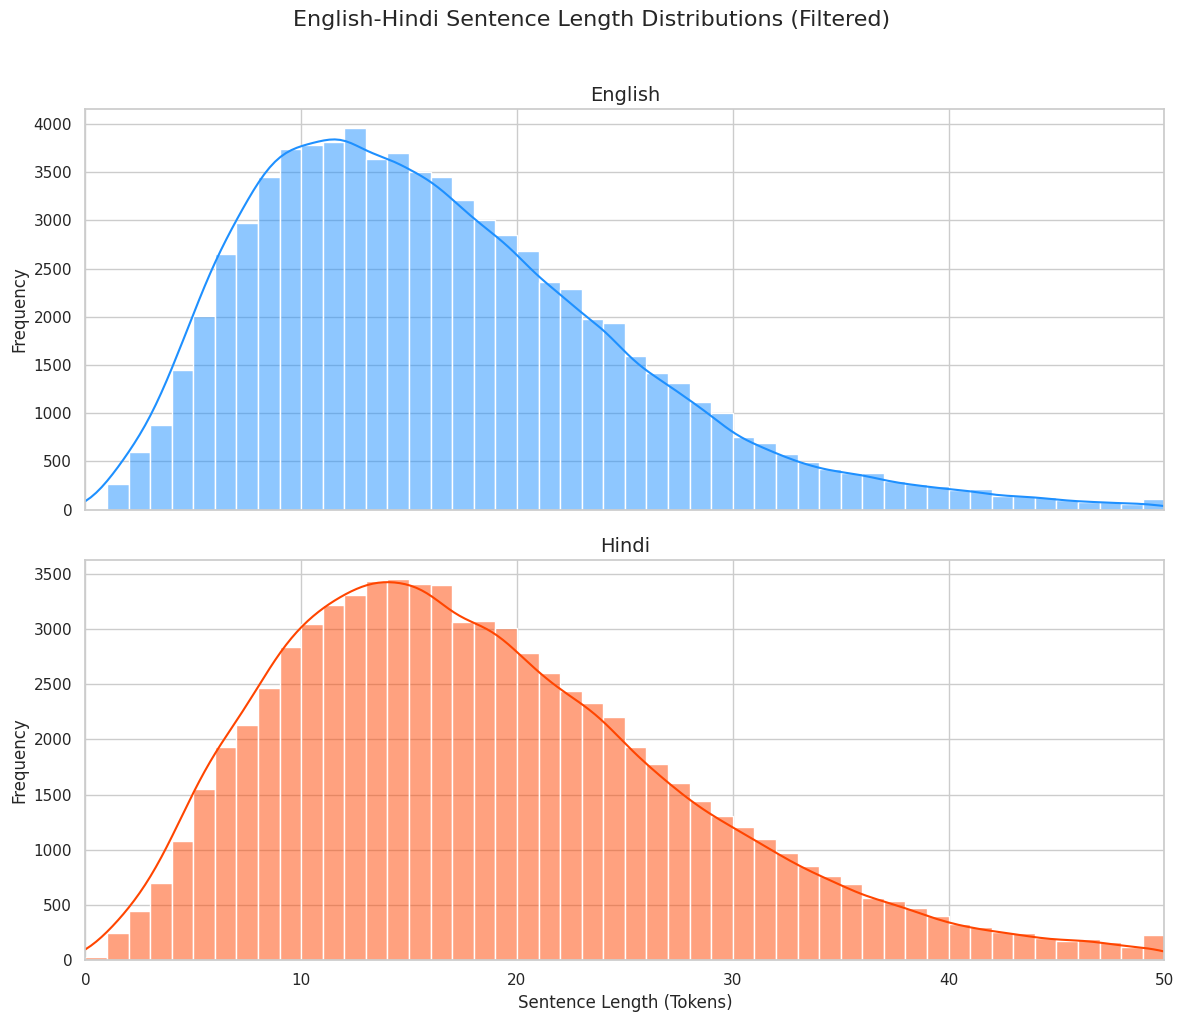

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


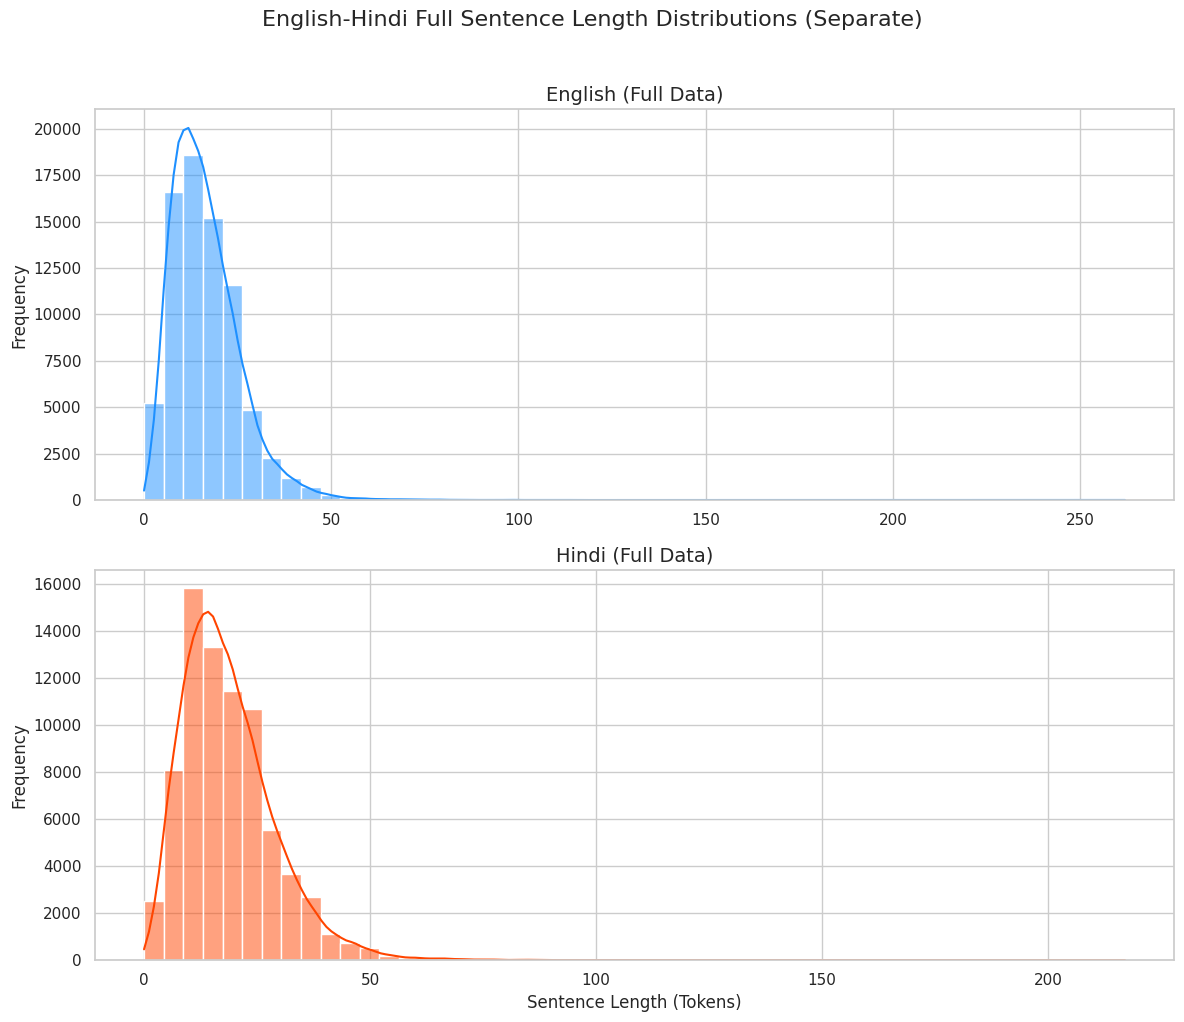


Plotting complete.
Plots saved as 'sentence_length_filtered.png' and 'sentence_length_full.png'


In [ ]:
"""
Part 3: Data Analysis - Sentence Lengths
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# 1. Calculate the length of each sentence
# (Assumes en_tokens_train and hi_tokens_train are lists of token lists)
en_lengths = [len(s) for s in en_tokens_train]
hi_lengths = [len(s) for s in hi_tokens_train]

# 2. Store lengths in pandas Series for easy stats
en_series = pd.Series(en_lengths)
hi_series = pd.Series(hi_lengths)

# 3. Print summary statistics
print("--- English Sentence Lengths (Tokens) ---")
# We also add the 90th, 95th, and 99th percentiles
en_stats = en_series.describe(percentiles=[.90, .95, .99])
print(en_stats)

print("\n--- Hindi Sentence Lengths (Tokens) ---")
hi_stats = hi_series.describe(percentiles=[.90, .95, .99])
print(hi_stats)


# --- 4. Plotting the Distributions ---

# Set a consistent plot style
sns.set(style="whitegrid")

#  Plot 1: Overlaid Histograms (Full Data) ---
# This plot shows the complete distribution, including outliers.
#
# plt.figure(figsize=(12, 7))
# sns.histplot(en_series, color="dodgerblue", label="English", kde=True, alpha=0.6, bins=50)
# sns.histplot(hi_series, color="orangered", label="Hindi", kde=True, alpha=0.6, bins=50)
# plt.title('Full Distribution of Sentence Lengths (Frequency vs. Length)', fontsize=16)
# plt.xlabel('Sentence Length (Tokens)', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)
# plt.legend()
# plt.show()


# --- 5. Prepare Filtered Data for Cleaner Plots ---
# Get the 99th percentile length to use as a plotting limit.
# This helps ignore extreme outliers for a clearer view.
max_len_en = en_stats.get('99%', en_stats.get('max'))
max_len_hi = hi_stats.get('99%', hi_stats.get('max'))
plot_limit = int(max(max_len_en, max_len_hi))

# Create new Series that only contain lengths up to the limit
en_filtered = en_series[en_series <= plot_limit]
hi_filtered = hi_series[hi_series <= plot_limit]

# Plot 2: Filtered Histograms ---
#
# plt.figure(figsize=(12, 7))
# sns.histplot(en_filtered, color="dodgerblue", label="English", kde=True, alpha=0.6)
# sns.histplot(hi_filtered, color="orangered", label="Hindi", kde=True, alpha=0.6)
# plt.title(f'Distribution of Sentence Lengths (Filtered at {plot_limit} Tokens)', fontsize=16)
# plt.xlabel('Sentence Length (Tokens)', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)
# plt.legend()
# plt.show()

# --- 6. Plot: Filtered Data (Separate Subplots) ---
# This shows the filtered data (up to 99th percentile) in two separate plots.
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
fig.suptitle('English-Hindi Sentence Length Distributions (Filtered)', fontsize=16, y=1.02)

# English plot
sns.histplot(en_filtered, ax=axes[0], color="dodgerblue", kde=True, bins=50)
axes[0].set_title('English', fontsize=14)
axes[0].set_xlabel('') # Remove x-label for the top plot
axes[0].set_ylabel('Frequency')

# Hindi plot
sns.histplot(hi_filtered, ax=axes[1], color="orangered", kde=True, bins=50)
axes[1].set_title('Hindi', fontsize=14)
axes[1].set_xlabel('Sentence Length (Tokens)')
axes[1].set_ylabel('Frequency')

plt.xlim(0, plot_limit) # Set the shared x-axis limit
plt.tight_layout()
# Save the figure before showing it
fig.savefig('sentence_length_filtered.png', dpi=300, bbox_inches='tight')
plt.show()

# --- 7. Plot: Full Data (Separate Subplots) ---
# This shows the *complete* data (including outliers) in two separate plots.
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=False) # sharex=False, as scales might be very different
fig.suptitle('English-Hindi Full Sentence Length Distributions (Separate)', fontsize=16, y=1.02)

# English Full Data
sns.histplot(en_series, ax=axes[0], color="dodgerblue", kde=True, bins=50)
axes[0].set_title('English (Full Data)', fontsize=14)
axes[0].set_xlabel('')
axes[0].set_ylabel('Frequency')

# Hindi Full Data
sns.histplot(hi_series, ax=axes[1], color="orangered", kde=True, bins=50)
axes[1].set_title('Hindi (Full Data)', fontsize=14)
axes[1].set_xlabel('Sentence Length (Tokens)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
# Save the figure before showing it
fig.savefig('sentence_length_full.png', dpi=300, bbox_inches='tight')
plt.show()


print("\nPlotting complete.")
print("Plots saved as 'sentence_length_filtered.png' and 'sentence_length_full.png'")

In [ ]:
import pandas as pd

# 1. Get the list of lengths for your training data
en_lengths = [len(s) for s in en_tokens_train]
hi_lengths = [len(s) for s in hi_tokens_train]

# 2. Create a pandas Series to get quick stats
en_series = pd.Series(en_lengths)
hi_series = pd.Series(hi_lengths)

# 3. Print the descriptive statistics
print("--- English Sentence Lengths (Tokens) ---")
# We add 90th, 95th, and 99th percentiles
print(en_series.describe(percentiles=[.90, .95, .99]))

print("\n--- Hindi Sentence Lengths (Tokens) ---")
print(hi_series.describe(percentiles=[.90, .95, .99]))

--- English Sentence Lengths (Tokens) ---
count    76758.000000
mean        16.443876
std          9.230153
min          0.000000
50%         15.000000
90%         28.000000
95%         33.000000
99%         45.000000
max        262.000000
dtype: float64

--- Hindi Sentence Lengths (Tokens) ---
count    76758.000000
mean        18.744079
std         10.379436
min          0.000000
50%         17.000000
90%         32.000000
95%         37.000000
99%         50.000000
max        217.000000
dtype: float64


In [ ]:
"""
Part 4: PyTorch DataLoader (using TensorDataset)
"""

import torch
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# ----------------------------------------------------------------------------
# 1. TOKEN-TO-ID HELPER FUNCTION
# ----------------------------------------------------------------------------

def tokens_to_padded_ids(tokens, word2index, max_length, config):
    """
    Converts a list of tokens (e.g., ['hello', 'world']) into a
    padded list of numbers (e.g., [1, 15, 27, 2, 0, 0]).

    This function adds <SOS> and <EOS> tokens correctly.
    """
    # Get the numerical index for each special token
    sos_idx = word2index.get(config.SOS_TOKEN, config.UNK_IDX)
    eos_idx = word2index.get(config.EOS_TOKEN, config.UNK_IDX)
    pad_idx = word2index.get(config.PAD_TOKEN, config.UNK_IDX)
    unk_idx = word2index.get(config.UNK_TOKEN, config.UNK_IDX)

    # Start the sentence with the <SOS> token
    indices = [sos_idx]

    # Convert all tokens in the sentence to their numbers
    for token in tokens:
        indices.append(word2index.get(token, unk_idx))

    # End the sentence with the <EOS> token
    indices.append(eos_idx)

    # Pad or truncate the sentence to the fixed max_length
    if len(indices) < max_length:
        # Pad with <pad> tokens if it's too short
        num_pads = max_length - len(indices)
        padded_indices = indices + ([pad_idx] * num_pads)
    else:
        # Truncate if it's too long, but keep the <EOS> token at the end
        truncated_indices = indices[:max_length - 1]
        padded_indices = truncated_indices + [eos_idx]

    return padded_indices

# ----------------------------------------------------------------------------
# 2. DATALOADER CREATION (TRAIN & VAL)
# ----------------------------------------------------------------------------

def prepare_train_val_loaders(config,
                              en_tokens_train, hi_tokens_train,
                              en_tokens_val, hi_tokens_val,
                              en_word2index, hi_word2index):
    """
    Creates the training and validation DataLoader objects.
    """

    print("\n--- Part 4: Creating DataLoaders ---")

    # --- 1. Encode and Pad Training Data ---
    print(f"Encoding {len(en_tokens_train)} training sentences...")

    train_src_encoded = [
        tokens_to_padded_ids(tokens, en_word2index, config.SEQ_LENGTH, config)
        for tokens in en_tokens_train
    ]
    train_tgt_encoded = [
        tokens_to_padded_ids(tokens, hi_word2index, config.SEQ_LENGTH, config)
        for tokens in hi_tokens_train
    ]

    # --- 2. Encode and Pad Validation Data ---
    print(f"Encoding {len(en_tokens_val)} validation sentences...")
    val_src_encoded = [
        tokens_to_padded_ids(tokens, en_word2index, config.SEQ_LENGTH, config)
        for tokens in en_tokens_val
    ]
    val_tgt_encoded = [
        tokens_to_padded_ids(tokens, hi_word2index, config.SEQ_LENGTH, config)
        for tokens in hi_tokens_val
    ]

    # --- 3. Convert to PyTorch Tensors ---
    print("Converting to PyTorch Tensors...")
    # .long() is important, as these are indices, not float values
    train_src_tensor = torch.from_numpy(np.array(train_src_encoded)).long()
    train_tgt_tensor = torch.from_numpy(np.array(train_tgt_encoded)).long()

    val_src_tensor = torch.from_numpy(np.array(val_src_encoded)).long()
    val_tgt_tensor = torch.from_numpy(np.array(val_tgt_encoded)).long()

    # --- 4. Create TensorDatasets ---
    # A TensorDataset just wraps tensors. Each sample will be
    # retrieved by indexing both tensors along the first dimension.
    train_dataset = TensorDataset(train_src_tensor, train_tgt_tensor)
    val_dataset = TensorDataset(val_src_tensor, val_tgt_tensor)

    # --- 5. Create DataLoaders ---
    train_loader = DataLoader(
        train_dataset,
        batch_size=config.BATCH_SIZE,
        shuffle=True, # Shuffle training data
        drop_last=True # Drop the last batch if it's smaller than BATCH_SIZE
    )

    val_loader = DataLoader(
        val_dataset,
        batch_size=config.BATCH_SIZE,
        shuffle=False, # No need to shuffle validation data
        drop_last=False
    )

    print("Train and Validation DataLoaders created.")

    # --- 6. Show an example from the dataloader ---
    try:
        example_src_batch, example_tgt_batch = next(iter(train_loader))
        print(f"\nExample train batch shape (SRC): {example_src_batch.shape}")
        print(f"Example train batch shape (TGT): {example_tgt_batch.shape}")

        print("\nExample numericalized source sentence (from batch):")
        print(example_src_batch[0])

        print("\nExample numericalized target sentence (from batch):")
        print(example_tgt_batch[0])
    except Exception as e:
        print(f"Could not show dataloader example: {e}")

    return train_loader, val_loader


def prepare_test_loader(config, en_tokens_test, test_ids, en_word2index):
    """
    Creates the TEST (submission) DataLoader.
    This one only contains the source (English) data.
    """

    print("\n--- Part 4: Creating Test DataLoader ---")

    # --- 1. Encode and Pad Test Data ---
    print(f"Encoding {len(en_tokens_test)} test sentences...")

    test_src_encoded = [
        tokens_to_padded_ids(tokens, en_word2index, config.SEQ_LENGTH, config)
        for tokens in en_tokens_test
    ]

    # --- 2. Convert to Tensors ---
    test_src_tensor = torch.from_numpy(np.array(test_src_encoded)).long()

    # --- 3. Create TensorDataset ---
    # A DataLoader needs pairs, so we create a dummy target tensor
    # with just the indices (0, 1, 2, ...).
    # This isn't used for training, but it lets the DataLoader work.
    dummy_indices_tensor = torch.arange(len(test_ids))
    test_dataset = TensorDataset(test_src_tensor, dummy_indices_tensor)

    # --- 4. Create DataLoader ---
    test_loader = DataLoader(
        test_dataset,
        batch_size=config.BATCH_SIZE,
        shuffle=False, # Must NOT shuffle test data
        drop_last=False
    )

    print("Test (Submission) DataLoader created.")

    # We return the test_ids list separately to match the IDs to predictions
    return test_loader, test_ids

In [ ]:
# --- Run Part 3 ---
# Create the training and validation dataloaders
train_dataloader, val_dataloader = prepare_train_val_loaders(
    config,
    en_tokens_train, hi_tokens_train,
    en_tokens_val, hi_tokens_val,
    en_word2index, hi_word2index
)

# Create the test dataloader
# We use `_` to ignore the second return value (test_ids) for now
test_dataloader, _ = prepare_test_loader(
    config, en_tokens_test, test_ids, en_word2index
)


--- Part 3: Creating DataLoaders ---
Encoding 76758 training sentences...
Encoding 4039 validation sentences...
Converting to PyTorch Tensors...
Train and Validation DataLoaders created.

Example train batch shape (SRC): torch.Size([50, 45])
Example train batch shape (TGT): torch.Size([50, 45])

Example numericalized source sentence (from batch):
tensor([    1,  7153,    62,    17,   411,    31,  1117,    44, 14203,    35,
            3,   260,   745,    17,  6039,  6033,     2,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0])

Example numericalized target sentence (from batch):
tensor([    1,  1447,    12,   437, 15338, 15339,    45,     3,   218,   516,
          918,  3674,  1032,    21,    36,     2,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
       

In [ ]:

import torch
import torch.nn as nn
import math

# ----------------------------------------------------------------------------
# 1. SCALED DOT-PRODUCT ATTENTION (Function)
# ----------------------------------------------------------------------------

def scaled_dot_product_attention(query, key, value, mask=None, dropout=None):
    """
    Calculates the core "Scaled Dot-Product Attention".

    This is the formula: Attention(Q, K, V) = softmax( (Q * K^T) / sqrt(d_k) ) * V

    Args:
        query (Tensor): The query vectors. Shape [batch, heads, q_len, d_k]
        key (Tensor): The key vectors. Shape [batch, heads, k_len, d_k]
        value (Tensor): The value vectors. Shape [batch, heads, v_len, d_v]
                        (Note: k_len == v_len)
        mask (Tensor, optional): Hides certain positions (e.g., padding or future words).
                                 Shape is broadcastable to [batch, heads, q_len, k_len].
        dropout (nn.Dropout, optional): A dropout layer to apply to the attention weights.

    Returns:
        (Tensor, Tensor):
        1. The output of the attention (weighted values). Shape [batch, heads, q_len, d_v]
        2. The attention weights (scores). Shape [batch, heads, q_len, k_len]
    """

    # Get the dimension of the keys (d_k) for scaling
    d_k = query.size(-1)

    # 1. Calculate scores: (Q * K^T) / sqrt(d_k)
    # Shape: [batch, heads, q_len, d_k] @ [batch, heads, d_k, k_len] -> [batch, heads, q_len, k_len]
    scores = torch.matmul(query, key.transpose(-2, -1)) / math.sqrt(d_k)

    # 2. Apply mask (if one is provided)
    # The mask has 0s where we want to "hide" information (like padding).
    # masked_fill replaces 0s with a very small number (-1e9) so softmax turns them into 0.
    if mask is not None:
        scores = scores.masked_fill(mask == 0, -1e9)

    # 3. Apply softmax to get attention weights
    # This turns the scores into probabilities (summing to 1) along the key dimension.
    attention_weights = torch.softmax(scores, dim=-1)

    # 4. Apply dropout (if provided)
    if dropout is not None:
        attention_weights = dropout(attention_weights)

    # 5. Get the weighted output: (Attention * V)
    # Shape: [batch, heads, q_len, k_len] @ [batch, heads, v_len, d_v] -> [batch, heads, q_len, d_v]
    # (Note: k_len == v_len)
    output = torch.matmul(attention_weights, value)

    return output, attention_weights

# ----------------------------------------------------------------------------
# 2. MULTI-HEAD ATTENTION (Module)
# ----------------------------------------------------------------------------

class MultiHeadAttention(nn.Module):
    """
    Implements the Multi-Head Attention layer.

    This layer does the following:
    1. Takes query, key, and value inputs.
    2. Runs them through 3 separate linear layers (W_q, W_k, W_v) to get Q, K, V.
    3. Splits the Q, K, V tensors into multiple "heads".
    4. Applies scaled dot-product attention to each head in parallel.
    5. Concatenates the results from all heads.
    6. Puts the concatenated result through a final linear layer (W_o).
    """
    def __init__(self, d_model, num_heads, dropout_prob): # Renamed
        """
        Args:
            d_model (int): The embedding dimension (e.g., 512).
            num_heads (int): Number of heads (e.g., 8). Must divide d_model.
            dropout_prob (float): Dropout probability.
        """
        super(MultiHeadAttention, self).__init__()

        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"

        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads # Dimension of each head

        # Define the 4 linear layers
        self.W_q = nn.Linear(d_model, d_model) # Query projection
        self.W_k = nn.Linear(d_model, d_model) # Key projection
        self.W_v = nn.Linear(d_model, d_model) # Value projection
        self.W_o = nn.Linear(d_model, d_model) # Final output projection

        self.dropout = nn.Dropout(dropout_prob)

    def split_heads(self, x, batch_size):
        """
        Splits the last dimension `d_model` into `num_heads` and `d_k`.
        Transposes the result to be [batch_size, num_heads, seq_len, d_k].

        Args:
            x (Tensor): Input tensor. Shape [batch_size, seq_len, d_model]
        """
        # Reshape to [batch_size, seq_len, num_heads, d_k]
        x = x.view(batch_size, -1, self.num_heads, self.d_k)

        # Transpose to [batch_size, num_heads, seq_len, d_k]
        return x.transpose(1, 2)

    def forward(self, query, key, value, mask=None):
        """
        Forward pass for the Multi-Head Attention layer.

        Args:
            query (Tensor): Query. Shape [batch_size, q_len, d_model]
            key (Tensor): Key. Shape [batch_size, k_len, d_model]
            value (Tensor): Value. Shape [batch_size, v_len, d_model]
            mask (Tensor, optional): Mask to hide positions.

        Returns:
            Tensor: Output of the layer. Shape [batch_size, q_len, d_model]
        """
        batch_size = query.size(0)

        # 1. Project Q, K, V using linear layers
        # Shape: [batch, seq_len, d_model]
        Q = self.W_q(query)
        K = self.W_k(key)
        V = self.W_v(value)

        # 2. Split into multiple heads
        # Shape: [batch, num_heads, seq_len, d_k]
        Q = self.split_heads(Q, batch_size)
        K = self.split_heads(K, batch_size)
        V = self.split_heads(V, batch_size)

        # 3. Apply scaled dot-product attention
        # attention_output shape: [batch, num_heads, q_len, d_k]
        # attention_weights (ignored): [batch, num_heads, q_len, k_len]
        attention_output, _ = scaled_dot_product_attention( # Renamed
            Q, K, V, mask, self.dropout
        )

        # 4. Concatenate heads
        # First, transpose back to [batch, q_len, num_heads, d_k]
        attention_output = attention_output.transpose(1, 2).contiguous()
        # Then, reshape to [batch, q_len, d_model]
        attention_output = attention_output.view(batch_size, -1, self.d_model)

        # 5. Pass through the final output linear layer
        # Shape: [batch, q_len, d_model]
        output = self.W_o(attention_output)

        return output

In [ ]:

import torch
import torch.nn as nn
import math

# ----------------------------------------------------------------------------
# 1. POSITION-WISE FEED-FORWARD NETWORK (Module)
# ----------------------------------------------------------------------------

class PositionwiseFeedForward(nn.Module):
    """
    Implements the Position-wise Feed-Forward Network (FFN).

    This is a simple two-layer network (Linear -> ReLU -> Linear) that
    is applied to each token's embedding independently.

    The path is:
    Input -> Linear 1 (Expand) -> ReLU -> Dropout -> Linear 2 (Contract) -> Output
    """
    def __init__(self, d_model, d_ff, dropout_prob): # Renamed for consistency
        """
        Args:
            d_model (int): Input and output dimension (e.g., 512).
            d_ff (int): Inner dimension, usually 4 * d_model (e.g., 2048).
            dropout_prob (float): Dropout probability.
        """
        super(PositionwiseFeedForward, self).__init__()

        self.linear_1 = nn.Linear(d_model, d_ff) # Expands to d_ff
        self.linear_2 = nn.Linear(d_ff, d_model) # Contracts back to d_model
        self.dropout = nn.Dropout(dropout_prob)
        self.relu = nn.ReLU()

    def forward(self, x):
        """
        Args:
            x (Tensor): Input tensor. Shape [batch_size, seq_len, d_model]

        Returns:
            Tensor: Output tensor. Shape [batch_size, seq_len, d_model]
        """
        # Shape: [batch, seq_len, d_model] -> [batch, seq_len, d_ff]
        x = self.relu(self.linear_1(x))

        # Apply dropout
        x = self.dropout(x)

        # Shape: [batch, seq_len, d_ff] -> [batch, seq_len, d_model]
        x = self.linear_2(x)

        return x

# ----------------------------------------------------------------------------
# 2. POSITIONAL ENCODING (Module)
# ----------------------------------------------------------------------------

class PositionalEncoding(nn.Module):
    """
    Injects information about the position of tokens in the sequence.

    This uses sine and cosine functions of different frequencies.
    The formula for each position `pos` and dimension `i` is:

    PE(pos, 2i)   = sin(pos / 10000^(2i / d_model))
    PE(pos, 2i+1) = cos(pos / 10000^(2i / d_model))

    This encoding is added directly to the word embeddings.
    """
    def __init__(self, d_model, dropout_prob, max_len=5000): # Renamed
        """
        Args:
            d_model (int): The embedding dimension (e.g., 512).
            dropout_prob (float): Dropout probability.
            max_len (int): Max sequence length to pre-compute.
        """
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout_prob)

        # --- Create the positional encoding matrix ---

        # Create a matrix of zeros to hold the encodings
        # Shape: [max_len, d_model]
        pe = torch.zeros(max_len, d_model)

        # Create a tensor for the positions (0, 1, 2, ..., max_len-1)
        # Shape: [max_len, 1]
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)

        # Create the denominator term (1 / 10000^(2i / d_model))
        # This is the "div_term" in the formula
        div_term = torch.exp(torch.arange(0, d_model, 2).float() *
                             (-math.log(10000.0) / d_model))

        # Apply sin to even indices (0, 2, 4, ...)
        pe[:, 0::2] = torch.sin(position * div_term)

        # Apply cos to odd indices (1, 3, 5, ...)
        pe[:, 1::2] = torch.cos(position * div_term)

        # --- End of matrix creation ---

        # Add a batch dimension (1) so it can be broadcasted
        # Shape: [1, max_len, d_model]
        pe = pe.unsqueeze(0)

        # Register 'pe' as a buffer.
        # This means it's part of the module's state but not a trainable parameter.
        self.register_buffer('pe', pe)

    def forward(self, x):
        """
        Adds the positional encoding to the input embeddings.

        Args:
            x (Tensor): Input embeddings.
                        Shape [batch_size, seq_len, d_model]
        Returns:
            Tensor: Embeddings + positional encoding.
                        Shape [batch_size, seq_len, d_model]
        """
        # x.size(1) is the sequence length (seq_len)
        # We slice the pre-computed 'pe' matrix to match the input's length.
        # self.pe[:, :x.size(1), :] shape is [1, seq_len, d_model]
        # This is added to 'x' (shape [batch_size, seq_len, d_model])
        x = x + self.pe[:, :x.size(1), :]

        return self.dropout(x)

In [ ]:
"""
Part 7: Transformer Encoder
"""
import torch
import torch.nn as nn
import math

# # (These modules are assumed to be defined in previous files)
# try:
#     from transformer_attention import MultiHeadAttention
#     from transformer_building_blocks import PositionwiseFeedForward, PositionalEncoding
# except ImportError:
#     print("ERROR: Ensure previous modules (Attention, FFN, PositionalEncoding) are defined.")

# ----------------------------------------------------------------------------
# 1. ENCODER LAYER (Single Block)
# ----------------------------------------------------------------------------

class EncoderLayer(nn.Module):
    """
    A single block in the Encoder stack.

    An EncoderLayer has two main parts (sub-layers):
    1. A Multi-Head Self-Attention mechanism (so the input can "see" other tokens)
    2. A simple, Position-wise Feed-Forward Network

    Each of these two parts has a residual connection (Add)
    and Layer Normalization (Norm) applied to its output.

    Path:
    Input -> Self-Attention -> Add & Norm -> Feed-Forward -> Add & Norm -> Output
    """
    def __init__(self, d_model, num_heads, d_ff, dropout_prob): # Renamed
        """
        Args:
            d_model (int): The embedding dimension (e.g., 512).
            num_heads (int): Number of attention heads (e.g., 8).
            d_ff (int): Inner dimension of the feed-forward network (e.g., 2048).
            dropout_prob (float): Dropout probability.
        """
        super(EncoderLayer, self).__init__()

        # Sub-layer 1: Multi-Head Self-Attention
        self.self_attn = MultiHeadAttention(d_model, num_heads, dropout_prob)
        self.norm1 = nn.LayerNorm(d_model)
        self.dropout1 = nn.Dropout(dropout_prob)

        # Sub-layer 2: Position-wise Feed-Forward
        self.feed_forward = PositionwiseFeedForward(d_model, d_ff, dropout_prob)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout2 = nn.Dropout(dropout_prob)

    def forward(self, x, mask):
        """
        Forward pass for the EncoderLayer.

        Args:
            x (Tensor): Input tensor. Shape [batch_size, seq_len, d_model]
            mask (Tensor): Source padding mask (hides <pad> tokens).
                           Shape [batch_size, 1, 1, seq_len]

        Returns:
            Tensor: Output tensor. Shape [batch_size, seq_len, d_model]
        """

        # --- Sub-layer 1: Self-Attention ---
        # 1.1. Compute attention
        # In self-attention, Q, K, and V all come from the same input 'x'
        attn_output = self.self_attn(query=x, key=x, value=x, mask=mask)

        # 1.2. Apply residual connection (Add) and Layer Normalization (Norm)
        # x = x + self.dropout1(attn_output)
        # x = self.norm1(x)
        # (Combined into one line):
        x = self.norm1(x + self.dropout1(attn_output))

        # --- Sub-layer 2: Feed-Forward ---
        # 2.1. Compute feed-forward
        ff_output = self.feed_forward(x)

        # 2.2. Apply residual connection (Add) and Layer Normalization (Norm)
        # x = x + self.dropout2(ff_output)
        # x = self.norm2(x)
        # (Combined into one line):
        x = self.norm2(x + self.dropout2(ff_output))

        return x

# ----------------------------------------------------------------------------
# 2. ENCODER (Full Stack)
# ----------------------------------------------------------------------------

class Encoder(nn.Module):
    """
    The full Encoder, which is a stack of N identical EncoderLayers.

    It is responsible for:
    1. Taking the input token indices.
    2. Converting them to embeddings.
    3. Adding positional information (Positional Encoding).
    4. Passing the result through N EncoderLayers.
    """
    def __init__(self,
                 src_vocab_size, # Renamed for clarity
                 d_model,
                 num_layers,
                 num_heads,
                 d_ff,
                 dropout_prob, # Renamed
                 max_seq_len): # Renamed for clarity
        """
        Args:
            src_vocab_size (int): Size of the source (English) vocabulary.
            d_model (int): Embedding dimension.
            num_layers (int): Number of EncoderLayers to stack (e.g., 6).
            num_heads (int): Number of attention heads.
            d_ff (int): Inner dimension of FFN.
            dropout_prob (float): Dropout probability.
            max_seq_len (int): Max sequence length (for PositionalEncoding).
        """
        super(Encoder, self).__init__()

        self.d_model = d_model
        self.embedding = nn.Embedding(src_vocab_size, d_model)
        self.pos_encoding = PositionalEncoding(d_model, dropout_prob, max_len=max_seq_len)

        # Create a list of N identical EncoderLayers
        self.layers = nn.ModuleList(
            [EncoderLayer(d_model, num_heads, d_ff, dropout_prob)
             for _ in range(num_layers)]
        )

        self.dropout = nn.Dropout(dropout_prob)
        # The original paper applies one final LayerNorm after the stack
        self.norm = nn.LayerNorm(d_model)

    def forward(self, x, mask):
        """
        Forward pass for the full Encoder.

        Args:
            x (Tensor): Source token indices. Shape [batch_size, src_seq_len]
            mask (Tensor): Source padding mask.
                           Shape [batch_size, 1, 1, src_seq_len]

        Returns:
            Tensor: The encoded sequence (memory for the Decoder).
                    Shape [batch_size, src_seq_len, d_model]
        """

        # 1. Get embedding
        # Shape: [batch, seq_len] -> [batch, seq_len, d_model]
        # We scale by sqrt(d_model) as suggested in the original paper
        x = self.embedding(x) * math.sqrt(self.d_model)

        # 2. Add positional encoding
        x = self.pos_encoding(x)

        # 3. Apply dropout to the combined embeddings + positional encodings
        x = self.dropout(x)

        # 4. Pass the output through all N layers in the stack
        for layer in self.layers:
            x = layer(x, mask)

        # 5. Apply the final normalization
        # This is the "Post-LN" (Post-Layer-Normalization) architecture
        return self.norm(x)

In [ ]:

import torch
import torch.nn as nn
import math

# (Assuming MultiHeadAttention, PositionwiseFeedForward, PositionalEncoding are defined)

# ----------------------------------------------------------------------------
# 1. DECODER LAYER (Single Block)
# ----------------------------------------------------------------------------

class DecoderLayer(nn.Module):
    """
    A single Decoder block.

    Contains:
    1. Masked Self-Attention (on target)
    2. Cross-Attention (on encoder output)
    3. Feed-Forward Network
    (All with Add & Norm)
    """
    def __init__(self, d_model, num_heads, d_ff, dropout_prob):
        super(DecoderLayer, self).__init__()

        # Sub-layer 1: Masked Self-Attention
        self.self_attn = MultiHeadAttention(d_model, num_heads, dropout_prob)
        self.norm1 = nn.LayerNorm(d_model)
        self.dropout1 = nn.Dropout(dropout_prob)

        # Sub-layer 2: Cross-Attention (Encoder-Decoder)
        self.cross_attn = MultiHeadAttention(d_model, num_heads, dropout_prob)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout2 = nn.Dropout(dropout_prob)

        # Sub-layer 3: Feed-Forward
        self.feed_forward = PositionwiseFeedForward(d_model, d_ff, dropout_prob)
        self.norm3 = nn.LayerNorm(d_model)
        self.dropout3 = nn.Dropout(dropout_prob)

    def forward(self, x, encoder_output, src_mask, tgt_mask):
        """
        Args:
            x (Tensor): Target input [batch, tgt_len, d_model]
            encoder_output (Tensor): Encoder's output [batch, src_len, d_model]
            src_mask (Tensor): Hides source padding [batch, 1, 1, src_len]
            tgt_mask (Tensor): Hides target padding & future tokens [batch, 1, tgt_len, tgt_len]
        """

        # 1. Masked Self-Attention (attends to itself, using target mask)
        self_attn_output = self.self_attn(query=x, key=x, value=x, mask=tgt_mask)
        x = self.norm1(x + self.dropout1(self_attn_output)) # Add & Norm

        # 2. Cross-Attention (Q=decoder, K/V=encoder, using source mask)
        cross_attn_output = self.cross_attn(query=x,
                                            key=encoder_output,
                                            value=encoder_output,
                                            mask=src_mask)
        x = self.norm2(x + self.dropout2(cross_attn_output)) # Add & Norm

        # 3. Feed-Forward
        ff_output = self.feed_forward(x)
        x = self.norm3(x + self.dropout3(ff_output)) # Add & Norm

        return x

# ----------------------------------------------------------------------------
# 2. DECODER (Full Stack)
# ----------------------------------------------------------------------------

class Decoder(nn.Module):
    """
    A stack of N identical DecoderLayers.
    """
    def __init__(self,
                 tgt_vocab_size,
                 d_model,
                 num_layers,
                 num_heads,
                 d_ff,
                 dropout_prob,
                 max_tgt_seq_len):

        super(Decoder, self).__init__()
        self.d_model = d_model
        self.embedding = nn.Embedding(tgt_vocab_size, d_model)
        self.pos_encoding = PositionalEncoding(d_model, dropout_prob, max_len=max_tgt_seq_len)
        self.layers = nn.ModuleList(
            [DecoderLayer(d_model, num_heads, d_ff, dropout_prob)
             for _ in range(num_layers)]
        )
        self.dropout = nn.Dropout(dropout_prob)
        self.norm = nn.LayerNorm(d_model) # Final normalization

    def forward(self, x, encoder_output, src_mask, tgt_mask):
        """
        Args:
            x (Tensor): Target indices [batch, tgt_len]
            encoder_output (Tensor): Encoder's output [batch, src_len, d_model]
            src_mask (Tensor): Source padding mask
            tgt_mask (Tensor): Target mask
        """
        # 1. Embedding + Scaling
        x = self.embedding(x) * math.sqrt(self.d_model)

        # 2. Add Positional Encoding
        x = self.pos_encoding(x)
        x = self.dropout(x)

        # 3. Pass through all N layers
        for layer in self.layers:
            x = layer(x, encoder_output, src_mask, tgt_mask)

        # 4. Final normalization
        return self.norm(x)

In [ ]:
"""
Part 9: The Full Transformer Model
"""
import torch
import torch.nn as nn
import math

# (Assuming Encoder and Decoder classes are defined)

# ----------------------------------------------------------------------------
# 1. TRANSFORMER MODEL (Module)
# ----------------------------------------------------------------------------

class Transformer(nn.Module):
    """
    The complete Encoder-Decoder Transformer model.

    Combines:
    1. Encoder
    2. Decoder
    3. Final Linear layer (to predict words)
    """
    def __init__(self,
                 config, # Renamed to config
                 src_vocab_size,
                 tgt_vocab_size,
                 src_pad_idx,
                 tgt_pad_idx
                ):
        """
        Args:
            config (Config): The main settings object.
            src_vocab_size (int): Source (English) vocab size.
            tgt_vocab_size (int): Target (Hindi) vocab size.
            src_pad_idx (int): Index of the source padding token.
            tgt_pad_idx (int): Index of the target padding token.
        """
        super(Transformer, self).__init__()

        self.config = config
        self.src_pad_idx = src_pad_idx
        self.tgt_pad_idx = tgt_pad_idx

        # 1. Initialize Encoder
        self.encoder = Encoder(
            src_vocab_size=src_vocab_size,
            d_model=config.D_MODEL,
            num_layers=config.NUM_ENCODER_LAYERS,
            num_heads=config.N_HEADS,
            d_ff=config.D_FF,
            dropout_prob=config.DROPOUT, # Renamed
            max_seq_len=config.SEQ_LENGTH + 20 # Add a buffer
        )

        # 2. Initialize Decoder
        self.decoder = Decoder(
            tgt_vocab_size=tgt_vocab_size,
            d_model=config.D_MODEL,
            num_layers=config.NUM_DECODER_LAYERS,
            num_heads=config.N_HEADS,
            d_ff=config.D_FF,
            dropout_prob=config.DROPOUT, # Renamed
            max_tgt_seq_len=config.SEQ_LENGTH + 20 # Renamed & buffer
        )

        # 3. Final output Linear layer
        # Projects decoder output [batch, len, d_model] -> [batch, len, tgt_vocab_size]
        self.final_linear = nn.Linear(config.D_MODEL, tgt_vocab_size)

        # Initialize weights
        self._initialize_weights()

        # --- Weight Tying ---
        # Share weights between the decoder's embedding and the final linear layer
        # This is a common optimization.
        self.final_linear.weight = self.decoder.embedding.weight

    def _initialize_weights(self):
        """
        Applies Xavier uniform initialization to all learnable parameters
        (like Linear layers) that have more than 1 dimension.
        """
        for p in self.parameters():
            if p.dim() > 1:
                nn.init.xavier_uniform_(p)

    def create_src_mask(self, src):
        """
        Creates a mask to hide padding tokens in the source sequence.
        Shape: [batch, 1, 1, src_len]
        """
        # Finds where src is NOT the pad token, then adds attention dims
        src_mask = (src != self.src_pad_idx).unsqueeze(1).unsqueeze(2)
        return src_mask

    def create_tgt_mask(self, tgt):
        """
        Creates a mask for the target sequence.
        Hides padding tokens AND future tokens (look-ahead mask).
        Shape: [batch, 1, tgt_len, tgt_len]
        """
        # 1. Target padding mask (hides <pad>)
        # Shape: [batch, 1, 1, tgt_len]
        tgt_pad_mask = (tgt != self.tgt_pad_idx).unsqueeze(1).unsqueeze(2)

        # 2. Look-ahead mask (hides future tokens)
        tgt_seq_len = tgt.shape[1]
        # Creates a lower-triangular matrix (True on and below diagonal)
        look_ahead_mask = torch.triu(
            torch.ones((1, 1, tgt_seq_len, tgt_seq_len), device=tgt.device),
            diagonal=1
        ) == 0

        # 3. Combine masks: (pad_mask) AND (look_ahead_mask)
        # Shape: [batch, 1, tgt_len, tgt_len]
        tgt_mask = tgt_pad_mask & look_ahead_mask
        return tgt_mask

    def forward(self, src, tgt):
        """
        Forward pass for the Transformer.

        Args:
            src (Tensor): Source indices. Shape [batch, src_len]
            tgt (Tensor): Target indices (shifted right). Shape [batch, tgt_len]

        Returns:
            Tensor: Output logits. Shape [batch, tgt_len, tgt_vocab_size]
        """

        # 1. Create masks
        src_mask = self.create_src_mask(src)
        tgt_mask = self.create_tgt_mask(tgt)

        # 2. Pass source through Encoder
        # encoder_output is the "memory"
        encoder_output = self.encoder(src, src_mask)

        # 3. Pass target and memory through Decoder
        decoder_output = self.decoder(tgt, encoder_output, src_mask, tgt_mask)

        # 4. Project decoder output to vocabulary size
        output = self.final_linear(decoder_output)

        return output

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
import time
import math
from tqdm import tqdm

# (Assuming Transformer class is defined)

# Helper to format epoch time
def epoch_time(start_time, end_time):
    """Calculates elapsed time for an epoch."""
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

# ----------------------------------------------------------------------------
# 1. TRAINING FUNCTION (One Epoch)
# ----------------------------------------------------------------------------

def train_fn(model, dataloader, optimizer, criterion, config):
    """Trains the model for one epoch."""
    model.train() # Set model to training mode
    epoch_loss = 0.0

    # Loop through batches
    for batch in tqdm(dataloader, desc="Training", leave=False):

        # 1. Get batch and move to device
        src = batch[0].to(config.DEVICE)
        tgt = batch[1].to(config.DEVICE)

        # 2. Zero gradients
        optimizer.zero_grad()

        # 3. Create shifted targets for "teacher forcing"
        # Input to decoder: <sos>, w1, w2, ...
        tgt_input = tgt[:, :-1]
        # Target for loss: w1, w2, ..., <eos>
        tgt_output = tgt[:, 1:]

        # 4. Forward pass
        output = model(src, tgt_input)

        # 5. Calculate loss
        # Flatten output: [batch * len, vocab_size]
        # Flatten target: [batch * len]
        output_flat = output.contiguous().view(-1, output.shape[-1])
        tgt_output_flat = tgt_output.contiguous().view(-1)

        # Loss function ignores PAD_IDX
        loss = criterion(output_flat, tgt_output_flat)

        # 6. Backward pass and optimize
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0) # Clip gradients
        optimizer.step()

        # 7. Accumulate loss
        epoch_loss += loss.item()

    return epoch_loss / len(dataloader) # Return average loss

# ----------------------------------------------------------------------------
# 2. EVALUATION FUNCTION (One Epoch)
# ----------------------------------------------------------------------------

def evaluate_fn(model, dataloader, criterion, config):
    """Evaluates the model on the validation set."""
    model.eval() # Set model to evaluation mode
    epoch_loss = 0.0

    with torch.no_grad(): # Disable gradient calculation
        for batch in tqdm(dataloader, desc="Evaluating", leave=False):

            # 1. Get batch and move to device
            src = batch[0].to(config.DEVICE)
            tgt = batch[1].to(config.DEVICE)

            # 2. Create shifted targets
            tgt_input = tgt[:, :-1]
            tgt_output = tgt[:, 1:]

            # 3. Forward pass
            output = model(src, tgt_input)

            # 4. Calculate loss
            output_flat = output.contiguous().view(-1, output.shape[-1])
            tgt_output_flat = tgt_output.contiguous().view(-1)

            loss = criterion(output_flat, tgt_output_flat)

            # 5. Accumulate loss
            epoch_loss += loss.item()

    return epoch_loss / len(dataloader) # Return average loss

# ----------------------------------------------------------------------------
# 3. MAIN TRAINING RUNNER
# ----------------------------------------------------------------------------

def run_training_loop(config, train_loader, val_loader): # Renamed
    """
    Initializes and runs the full training and validation loop.
    """
    print("\n--- Starting Training (Part 10) ---")

    # 1. Initialize the Transformer model
    print("Initializing model...")
    model = Transformer(
        config=config,
        src_vocab_size=config.VOCAB_EN_SIZE,
        tgt_vocab_size=config.VOCAB_HI_SIZE,
        src_pad_idx=config.PAD_IDX,
        tgt_pad_idx=config.PAD_IDX
    )

    # 2. Handle Multi-GPU
    if config.USE_MULTI_GPU and torch.cuda.device_count() > 1:
        print(f"--- Using {torch.cuda.device_count()} GPUs via nn.DataParallel ---")
        model = nn.DataParallel(model) # Wrap model for multi-GPU
    else:
        print(f"--- Using a single device: {config.DEVICE} ---")

    # 3. Move model to device
    model = model.to(config.DEVICE)

    # 4. Initialize Optimizer
    print(f"Initializing Adam optimizer with LR: {config.LEARNING_RATE}")
    optimizer = optim.Adam(model.parameters(), lr=config.LEARNING_RATE)

    # 5. Initialize Loss Function (Criterion)
    print(f"Initializing CrossEntropyLoss, ignoring index: {config.PAD_IDX}")
    # Use label smoothing
    criterion = nn.CrossEntropyLoss(ignore_index=config.PAD_IDX, label_smoothing=0.1)

    # --- Training Loop ---
    best_val_loss = float('inf')

    print(f"\n--- Starting training for {config.NUM_EPOCHS} epochs ---")

    for epoch in range(config.NUM_EPOCHS):

        start_time = time.time()

        # Run one epoch
        train_loss = train_fn(model, train_loader, optimizer, criterion, config)
        val_loss = evaluate_fn(model, val_loader, criterion, config)

        end_time = time.time()
        epoch_mins, epoch_secs = epoch_time(start_time, end_time)

        # Check if this is the best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss

            # Save the best model
            # (If using DataParallel, save `model.module`)
            model_state = model.module.state_dict() if isinstance(model, nn.DataParallel) else model.state_dict()
            torch.save(model_state, config.MODEL_SAVE_PATH)
            save_status = " (Best model saved)"
        else:
            save_status = ""

        # Print epoch results
        print(f"\nEpoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s")
        print(f"\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}")
        print(f"\t Val. Loss: {val_loss:.3f} |  Val. PPL: {math.exp(val_loss):7.3f} {save_status}")

    print("\n--- Training Finished ---")
    print(f"Best validation loss: {best_val_loss:.3f}")
    print(f"Best model saved to: {config.MODEL_SAVE_PATH}")

    # --- Save the final model ---
    print(f"Saving final model (Epoch {config.NUM_EPOCHS}) to: {config.MODEL_SAVE_PATH_FINAL}")
    model_state = model.module.state_dict() if isinstance(model, nn.DataParallel) else model.state_dict()
    torch.save(model_state, config.MODEL_SAVE_PATH_FINAL)
    # -----------------------------

    # Return the model
    if isinstance(model, nn.DataParallel):
        return model.module
    else:
        return model

In [ ]:
# This cell starts the full training process.

# Set the number of epochs for this specific run
config.NUM_EPOCHS = 15 # (You can set this to 1 for a quick test)

trained_model = run_training_loop(
    config,
    train_loader, # Renamed in Part 10
    val_loader  # Renamed in Part 10
)

print("\n--- Training script complete ---")
print(f"Model type: {type(trained_model)}")


--- Starting Training (Part 9) ---
Initializing model...
--- Using 2 GPUs via nn.DataParallel ---
Initializing Adam optimizer with LR: 0.0001
Initializing CrossEntropyLoss, ignoring index: 0

--- Starting training for 15 epochs ---



Epoch: 01 | Time: 4m 16s
	Train Loss: 6.680 | Train PPL: 796.616
	 Val. Loss: 6.129 |  Val. PPL: 459.125  (Best model saved)



Epoch: 02 | Time: 4m 20s
	Train Loss: 5.886 | Train PPL: 360.111
	 Val. Loss: 5.604 |  Val. PPL: 271.408  (Best model saved)



Epoch: 03 | Time: 4m 19s
	Train Loss: 5.416 | Train PPL: 224.957
	 Val. Loss: 5.213 |  Val. PPL: 183.615  (Best model saved)



Epoch: 04 | Time: 4m 22s
	Train Loss: 5.052 | Train PPL: 156.325
	 Val. Loss: 4.921 |  Val. PPL: 137.076  (Best model saved)



Epoch: 05 | Time: 4m 22s
	Train Loss: 4.752 | Train PPL: 115.870
	 Val. Loss: 4.670 |  Val. PPL: 106.737  (Best model saved)



Epoch: 06 | Time: 4m 22s
	Train Loss: 4.492 | Train PPL:  89.256
	 Val. Loss: 4.483 |  Val. PPL:  88.499  (Best model saved)



Epoch: 07 | Time: 4m 22s
	Train Loss: 4.267 | Train PPL:  71.339
	 Val. Loss: 4.332 |  Val. PPL:  76.091  (Best model saved)



Epoch: 08 | Time: 4m 18s
	Train Loss: 4.074 | Train PPL:  58.787
	 Val. Loss: 4.211 |  Val. PPL:  67.430  (Best model saved)



Epoch: 09 | Time: 4m 17s
	Train Loss: 3.909 | Train PPL:  49.836
	 Val. Loss: 4.104 |  Val. PPL:  60.583  (Best model saved)



Epoch: 10 | Time: 4m 22s
	Train Loss: 3.766 | Train PPL:  43.198
	 Val. Loss: 4.033 |  Val. PPL:  56.426  (Best model saved)



Epoch: 11 | Time: 4m 22s
	Train Loss: 3.640 | Train PPL:  38.101
	 Val. Loss: 3.990 |  Val. PPL:  54.074  (Best model saved)



Epoch: 12 | Time: 4m 22s
	Train Loss: 3.531 | Train PPL:  34.143
	 Val. Loss: 3.957 |  Val. PPL:  52.324  (Best model saved)



Epoch: 14 | Time: 4m 22s
	Train Loss: 3.341 | Train PPL:  28.255
	 Val. Loss: 3.893 |  Val. PPL:  49.058  (Best model saved)



Epoch: 15 | Time: 4m 19s
	Train Loss: 3.261 | Train PPL:  26.071
	 Val. Loss: 3.859 |  Val. PPL:  47.421  (Best model saved)

--- Training Finished ---
Best validation loss: 3.859
Model saved to: transformer_model.pth

--- Training script complete ---
Model type: <class '__main__.Transformer'>


In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
import time
import math
import json
import os
from tqdm import tqdm

# (Assuming Config, load_train_val_data, prepare_train_val_loaders,
#  Transformer, train_fn, evaluate_fn, and epoch_time are defined)

# --- 1. Define File Paths ---
# Path to the *original* dataset
DATA_PATH = "/kaggle/input/dataset-capstone/Train"

# Path to your *saved model artifacts*
MODEL_INPUT_DIR = "/kaggle/input/json-files-eng2hindi"
MODEL_MOD_DIR = "/kaggle/input/eng2hindi/transformers/default/1"
MODEL_PATH = os.path.join(MODEL_MOD_DIR, "transformer_model.pth")
CONFIG_PATH = os.path.join(MODEL_INPUT_DIR, "config.json")
EN_VOCAB_PATH = os.path.join(MODEL_INPUT_DIR, "en_word2index.json")
HI_VOCAB_PATH = os.path.join(MODEL_INPUT_DIR, "hi_word2index.json")

# --- 2. Load Config and Vocabs ---
print("Loading artifacts...")
with open(CONFIG_PATH, 'r') as f:
    config_data = json.load(f)
with open(EN_VOCAB_PATH, 'r') as f:
    en_word2index = json.load(f)
with open(HI_VOCAB_PATH, 'r') as f:
    hi_word2index = json.load(f)

# --- 3. Set up the Config Object ---
# Create a new config and override it with loaded values
config = Config()
config.D_MODEL = config_data['D_MODEL']
config.N_HEADS = config_data['N_HEADS']
config.NUM_ENCODER_LAYERS = config_data['NUM_ENCODER_LAYERS']
config.NUM_DECODER_LAYERS = config_data['NUM_DECODER_LAYERS']
config.D_FF = config_data['D_FF']
config.DROPOUT = config_data['DROPOUT']
config.SEQ_LENGTH = config_data['SEQ_LENGTH']
config.PAD_IDX = config_data['PAD_IDX']

# Set vocab sizes from loaded files
config.VOCAB_EN_SIZE = len(en_word2index)
config.VOCAB_HI_SIZE = len(hi_word2index)

# Set data paths and a new save path
config.DATA_JSON_FILE = os.path.join(DATA_PATH, "train_data1.json")
config.TEST_JSON_FILE = os.path.join(DATA_PATH, "test_data1_final.json")
config.MODEL_SAVE_PATH = "transformer_model_resumed.pth" # Save to a new file

print(f"Loaded config with SEQ_LENGTH={config.SEQ_LENGTH}")

# --- 4. Re-create the DataLoaders ---
# Load raw token data (without building new vocabs)
print("Loading raw token data...")
(
    en_tokens_train, hi_tokens_train,
    en_tokens_val, hi_tokens_val,
    _ # Don't need the raw JSON
) = load_train_val_data(config)

# Create dataloaders using the *loaded* vocabs
print("Creating dataloaders using loaded vocabs...")
train_loader, val_loader = prepare_train_val_loaders( # Renamed function
    config,
    en_tokens_train, hi_tokens_train,
    en_tokens_val, hi_tokens_val,
    en_word2index,  # Pass the loaded vocab
    hi_word2index   # Pass the loaded vocab
)
print("DataLoaders created.")

# --- 5. Build Model and Load Weights ---
print("Initializing model structure...")
model = Transformer(
    config=config,
    src_vocab_size=config.VOCAB_EN_SIZE,
    tgt_vocab_size=config.VOCAB_HI_SIZE,
    src_pad_idx=config.PAD_IDX,
    tgt_pad_idx=config.PAD_IDX
)

print(f"Loading saved weights from: {MODEL_PATH}")
device = "cuda" if torch.cuda.is_available() else "cpu"
model.load_state_dict(torch.load(MODEL_PATH, map_location=torch.device(device)))
print("Weights loaded successfully.")

# --- 6. Set up for Resumed Training ---
if config.USE_MULTI_GPU and torch.cuda.device_count() > 1:
    print(f"--- Wrapping model in nn.DataParallel for {torch.cuda.device_count()} GPUs ---")
    model = nn.DataParallel(model)

model = model.to(config.DEVICE)

optimizer = optim.Adam(model.parameters(), lr=config.LEARNING_RATE)
criterion = nn.CrossEntropyLoss(ignore_index=config.PAD_IDX, label_smoothing=0.1)

# --- 7. Run the Training Loop ---
print("\nRunning initial evaluation to get baseline...")
initial_val_loss = evaluate_fn(model, val_loader, criterion, config) # Use val_loader
best_val_loss = initial_val_loss
print(f"Current Val. Loss: {best_val_loss:.3f} |  Val. PPL: {math.exp(best_val_loss):7.3f}")

NUM_MORE_EPOCHS = 10
START_EPOCH = 35 # The number of epochs you already trained

print(f"\n--- Resuming training for {NUM_MORE_EPOCHS} more epochs ---")

for epoch in range(NUM_MORE_EPOCHS):
    current_epoch_num = START_EPOCH + epoch + 1
    start_time = time.time()

    # Run one epoch
    train_loss = train_fn(model, train_loader, optimizer, criterion, config) # Use train_loader
    val_loss = evaluate_fn(model, val_loader, criterion, config) # Use val_loader

    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if val_loss < best_val_loss:
        best_val_loss = val_loss

        # Save the best model
        model_state = model.module.state_dict() if isinstance(model, nn.DataParallel) else model.state_dict()
        torch.save(model_state, config.MODEL_SAVE_PATH)
        save_status = " (Best model saved)"
    else:
        save_status = ""

    print(f"\nEpoch: {current_epoch_num:02} | Time: {epoch_mins}m {epoch_secs}s")
    print(f"\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}")
    print(f"\t Val. Loss: {val_loss:.3f} |  Val. PPL: {math.exp(val_loss):7.3f} {save_status}")

print("\n--- Additional Training Finished ---")
print(f"Best model saved to: {config.MODEL_SAVE_PATH}")

# --- Save the final model ---
# (Note: config.NUM_EPOCHS is from the original run, not the new total)
print(f"Saving final model (Epoch {current_epoch_num}) to: {config.MODEL_SAVE_PATH_FINAL}")
model_state = model.module.state_dict() if isinstance(model, nn.DataParallel) else model.state_dict()
torch.save(model_state, config.MODEL_SAVE_PATH_FINAL)
# -----------------------------

Loading artifacts...
Loaded config with SEQ_LENGTH=45
Loading raw token data...

--- Loading Train Data ---
Loading data from: /kaggle/input/dataset-capstone/Train/train_data1.json
Processing for language pair: English-Hindi
Loaded 80797 total training sentences.
Splitting data: 76758 training, 4039 validation.
Tokenizing sentences (this may take a minute)...
Creating dataloaders using loaded vocabs...

--- Part 3: Creating DataLoaders ---
Encoding 76758 training sentences...
Encoding 4039 validation sentences...
Converting to PyTorch Tensors...
Train and Validation DataLoaders created.

Example train batch shape (SRC): torch.Size([50, 45])
Example train batch shape (TGT): torch.Size([50, 45])

Example numericalized source sentence (from batch):
tensor([    1,   260,    23,   210,  7283,     6,  2772,   401,   552,    23,
          262,  9870,     3,    19, 19442,  1653,    23, 13659,     2,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
          

Current Val. Loss: 3.806 |  Val. PPL:  44.957

--- Resuming training for 10 more epochs ---



Epoch: 36 | Time: 4m 5s
	Train Loss: 2.971 | Train PPL:  19.506
	 Val. Loss: 3.840 |  Val. PPL:  46.545 



Epoch: 37 | Time: 4m 10s
	Train Loss: 2.881 | Train PPL:  17.826
	 Val. Loss: 3.828 |  Val. PPL:  45.952 



Epoch: 38 | Time: 4m 9s
	Train Loss: 2.810 | Train PPL:  16.604
	 Val. Loss: 3.815 |  Val. PPL:  45.373 



Epoch: 39 | Time: 4m 9s
	Train Loss: 2.751 | Train PPL:  15.655
	 Val. Loss: 3.820 |  Val. PPL:  45.585 



Epoch: 40 | Time: 4m 8s
	Train Loss: 2.698 | Train PPL:  14.850
	 Val. Loss: 3.832 |  Val. PPL:  46.133 



Epoch: 41 | Time: 4m 8s
	Train Loss: 2.652 | Train PPL:  14.188
	 Val. Loss: 3.843 |  Val. PPL:  46.669 



Epoch: 42 | Time: 4m 8s
	Train Loss: 2.611 | Train PPL:  13.615
	 Val. Loss: 3.846 |  Val. PPL:  46.821 



Epoch: 43 | Time: 4m 8s
	Train Loss: 2.571 | Train PPL:  13.085
	 Val. Loss: 3.856 |  Val. PPL:  47.294 



Epoch: 44 | Time: 4m 9s
	Train Loss: 2.536 | Train PPL:  12.627
	 Val. Loss: 3.853 |  Val. PPL:  47.118 



Epoch: 45 | Time: 4m 8s
	Train Loss: 2.504 | Train PPL:  12.235
	 Val. Loss: 3.877 |  Val. PPL:  48.267 

--- Additional Training Finished ---
Model saved to: transformer_model_resumed.pth
Saving final model (Epoch 15) to: transformer_model_final.pth


In [ ]:
"""
Part 12: Resume Training (from saved file)
"""
import math
import time

# --- 1. Re-create the model structure ---
# We'll create a new model instance to load the saved weights into.
print("Initializing model structure to load saved weights...")
model_to_resume = Transformer(
    config=config,
    src_vocab_size=config.VOCAB_EN_SIZE,
    tgt_vocab_size=config.VOCAB_HI_SIZE,
    src_pad_idx=config.PAD_IDX,
    tgt_pad_idx=config.PAD_IDX
)

# --- 2. Load the saved weights ---
try:
    print(f"Loading saved weights from: {config.MODEL_SAVE_PATH}")
    # Load the state dict (assumes it was saved from the base model, not DataParallel)
    model_to_resume.load_state_dict(torch.load(config.MODEL_SAVE_PATH))
    print("Weights loaded successfully.")

except Exception as e:
    print(f"Error loading model: {e}")
    print("Please ensure the model was saved correctly.")

# --- 3. Handle Multi-GPU ---
# Re-wrap in DataParallel *after* loading weights, if needed
if config.USE_MULTI_GPU and torch.cuda.device_count() > 1:
    print(f"--- Re-wrapping model in nn.DataParallel for {torch.cuda.device_count()} GPUs ---")
    model_to_resume = nn.DataParallel(model_to_resume)

# Move model to the correct device
model_to_resume = model_to_resume.to(config.DEVICE)


# --- 4. Re-create Optimizer and Criterion ---
print(f"Initializing Adam optimizer with LR: {config.LEARNING_RATE}")
optimizer = optim.Adam(model_to_resume.parameters(), lr=config.LEARNING_RATE)

print(f"Initializing CrossEntropyLoss, ignoring index: {config.PAD_IDX}")
criterion = nn.CrossEntropyLoss(ignore_index=config.PAD_IDX, label_smoothing=0.1)

# --- 5. Run the Training Loop ---
# First, run a quick evaluation to get the current best loss
print("\nRunning initial evaluation to get baseline...")
initial_val_loss = evaluate_fn(model_to_resume, val_loader, criterion, config) # Use val_loader
best_val_loss = initial_val_loss # Use best_val_loss
print(f"Current Val. Loss: {best_val_loss:.3f} |  Val. PPL: {math.exp(best_val_loss):7.3f}")


print(f"\n--- Resuming training for 10 more epochs ---")
NEW_EPOCHS = 10
START_EPOCH = 25 # Your previous run

for epoch in range(NEW_EPOCHS):

    current_epoch_num = START_EPOCH + epoch + 1
    start_time = time.time()

    # Run one epoch of training
    train_loss = train_fn(model_to_resume, train_loader, optimizer, criterion, config) # Use train_loader

    # Run one epoch of evaluation
    val_loss = evaluate_fn(model_to_resume, val_loader, criterion, config) # Use val_loader

    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # Check if this is the best model so far
    if val_loss < best_val_loss:
        best_val_loss = val_loss

        # Save the model
        model_state = model_to_resume.module.state_dict() if isinstance(model_to_resume, nn.DataParallel) else model_to_resume.state_dict()
        torch.save(model_state, config.MODEL_SAVE_PATH)

        save_status = " (Best model saved)"
    else:
        save_status = ""

    # Print epoch results
    print(f"\nEpoch: {current_epoch_num:02} | Time: {epoch_mins}m {epoch_secs}s")
    print(f"\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}")
    print(f"\t Val. Loss: {val_loss:.3f} |  Val. PPL: {math.exp(val_loss):7.3f} {save_status}")

print("\n--- Additional Training Finished ---")
print(f"Best validation loss after {START_EPOCH + NEW_EPOCHS} total epochs: {best_val_loss:.3f}")
print(f"Model saved to: {config.MODEL_SAVE_PATH}")

# Store the final, unwrapped model in a variable
if isinstance(model_to_resume, nn.DataParallel):
    trained_model = model_to_resume.module
else:
    trained_model = model_to_resume

Initializing model structure to load saved weights...
Loading saved weights from: transformer_model.pth
Weights loaded successfully.
--- Re-wrapping model in nn.DataParallel for 2 GPUs ---
Initializing Adam optimizer with LR: 0.0001
Initializing CrossEntropyLoss, ignoring index: 0

Running initial evaluation to get baseline...


Current Val. Loss: 3.806 |  Val. PPL:  44.957

--- Resuming training for 10 more epochs ---



Epoch: 26 | Time: 4m 22s
	Train Loss: 2.972 | Train PPL:  19.539
	 Val. Loss: 3.838 |  Val. PPL:  46.434 



Epoch: 27 | Time: 4m 22s
	Train Loss: 2.881 | Train PPL:  17.827
	 Val. Loss: 3.822 |  Val. PPL:  45.673 



Epoch: 28 | Time: 4m 22s
	Train Loss: 2.812 | Train PPL:  16.638
	 Val. Loss: 3.826 |  Val. PPL:  45.867 



Epoch: 29 | Time: 4m 26s
	Train Loss: 2.751 | Train PPL:  15.656
	 Val. Loss: 3.828 |  Val. PPL:  45.968 



Epoch: 30 | Time: 4m 30s
	Train Loss: 2.698 | Train PPL:  14.856
	 Val. Loss: 3.816 |  Val. PPL:  45.433 



Epoch: 31 | Time: 4m 26s
	Train Loss: 2.652 | Train PPL:  14.187
	 Val. Loss: 3.836 |  Val. PPL:  46.326 



Epoch: 32 | Time: 4m 22s
	Train Loss: 2.611 | Train PPL:  13.608
	 Val. Loss: 3.842 |  Val. PPL:  46.622 



Epoch: 33 | Time: 4m 22s
	Train Loss: 2.572 | Train PPL:  13.098
	 Val. Loss: 3.850 |  Val. PPL:  46.999 



Epoch: 34 | Time: 4m 22s
	Train Loss: 2.536 | Train PPL:  12.630
	 Val. Loss: 3.880 |  Val. PPL:  48.440 



Epoch: 35 | Time: 4m 21s
	Train Loss: 2.504 | Train PPL:  12.233
	 Val. Loss: 3.868 |  Val. PPL:  47.856 

--- Additional Training Finished ---
Best validation loss after 35 total epochs: 3.806
Model saved to: transformer_model.pth


In [ ]:
trained_model=model

In [ ]:
"""
Part 13: Inference - Translating Examples
"""
import torch
import torch.nn as nn
import pandas as pd
from tqdm import tqdm
import time

# (Assuming preprocess_sentence, tokens_to_padded_ids,
#  and trained_model are defined)

# ----------------------------------------------------------------------------
# 1. HELPER FUNCTION FOR EXAMPLE SENTENCES
# ----------------------------------------------------------------------------
def translate_example(
    model,
    sentence,
    config, # Renamed
    en_word2index,
    hi_index2word
):
    """
    Translates a single raw English sentence string using greedy decoding.
    """
    print(f"Source: {sentence}")

    # 1. Process and tokenize the sentence
    tokens = preprocess_sentence(sentence, 'en')

    # 2. Numericalize and pad
    # Use the function from Part 4
    src_tensor_ids = tokens_to_padded_ids( # Renamed
        tokens,
        en_word2index,
        config.SEQ_LENGTH,
        config
    )

    # 3. Convert to tensor and add batch dimension [1, seq_len]
    src_tensor = torch.tensor(src_tensor_ids, dtype=torch.long).unsqueeze(0)
    src_tensor = src_tensor.to(config.DEVICE)

    # 4. Set model to evaluation mode
    model.eval()

    # Get the base model (in case it's wrapped in DataParallel)
    real_model = model.module if isinstance(model, nn.DataParallel) else model

    with torch.no_grad():
        # 5. Create the source mask
        src_mask = real_model.create_src_mask(src_tensor)

        # 6. Run the encoder (only once)
        encoder_output = real_model.encoder(src_tensor, src_mask)

        # 7. Start the decoder input with <sos>
        tgt_tokens = [config.SOS_IDX]

        # 8. Greedy decoding loop
        for i in range(config.SEQ_LENGTH):
            # Create tensor from current target tokens
            tgt_tensor = torch.tensor(
                tgt_tokens, dtype=torch.long
            ).unsqueeze(0).to(config.DEVICE)

            # Create the target mask (hides future tokens)
            tgt_mask = real_model.create_tgt_mask(tgt_tensor)

            # Run the decoder
            output = real_model.decoder(
                tgt_tensor, encoder_output, src_mask, tgt_mask
            )

            # Get the logits for the *last* predicted token
            logits = real_model.final_linear(output[:, -1, :])

            # Find the best prediction (greedy)
            pred_token = logits.argmax(dim=-1).item()

            # Append it to our list
            tgt_tokens.append(pred_token)

            # Stop if we hit <eos>
            if pred_token == config.EOS_IDX:
                break

    # 9. Convert numerical IDs back to words
    translation_tokens = [
        hi_index2word.get(str(idx), config.UNK_TOKEN) for idx in tgt_tokens # Use str(idx) if vocab keys are strings
    ]

    # Clean up special tokens
    translation = [
        t for t in translation_tokens
        if t not in [config.SOS_TOKEN, config.EOS_TOKEN]
    ]

    print(f"Translation: {' '.join(translation)}\n")


# --- 2. Run Example Translations ---
if 'trained_model' in locals():
    print("\n--- Testing Inference on Example Sentences ---")

    # --- New Examples ---
    example_1 = "I am a student."
    example_2 = "The weather is very nice today."
    example_3 = "Where is the nearest hospital?"

    translate_example(
        trained_model, example_1, config, en_word2index, hi_index2word
    )
    translate_example(
        trained_model, example_2, config, en_word2index, hi_index2word
    )
    translate_example(
        trained_model, example_3, config, en_word2index, hi_index2word
    )
else:
    print("WARNING: 'trained_model' not found. Skipping example translations.")

In [ ]:

import torch
import torch.nn as nn
import pandas as pd
from tqdm import tqdm
import time

# (Assuming Transformer, config, en_word2index, hi_index2word,
#  and test_loader are all defined and loaded)

# ----------------------------------------------------------------------------
# 1. MAIN INFERENCE FUNCTION (FOR SUBMISSION)
# ----------------------------------------------------------------------------

def generate_submission_file(
    config,
    test_loader, # Renamed
    test_ids,
    hi_index2word,
    model=None
):
    """
    Runs inference on the entire test set and saves the `answersH.csv`.
    """
    print("\n--- Starting Inference (Part 14) ---")

    # 1. Load the trained model if it wasn't passed in
    if model is None:
        print(f"Loading best model from: {config.MODEL_SAVE_PATH}")
        # Initialize a new model instance
        model = Transformer(
            config=config,
            src_vocab_size=config.VOCAB_EN_SIZE,
            tgt_vocab_size=config.VOCAB_HI_SIZE,
            src_pad_idx=config.PAD_IDX,
            tgt_pad_idx=config.PAD_IDX
        )
        try:
            # Load the saved weights
            model.load_state_dict(torch.load(config.MODEL_SAVE_PATH, map_location=config.DEVICE))
            print("Model weights loaded successfully.")
        except FileNotFoundError:
            print("ERROR: No trained model file found. Cannot run inference.")
            return
        except Exception as e:
            print(f"Error loading model weights: {e}. Aborting.")
            return

    # 2. Handle Multi-GPU (if used during training)
    if config.USE_MULTI_GPU and torch.cuda.device_count() > 1 and not isinstance(model, nn.DataParallel):
        print(f"--- Wrapping model in nn.DataParallel for {torch.cuda.device_count()} GPUs ---")
        model = nn.DataParallel(model)

    model = model.to(config.DEVICE)
    model.eval() # Set model to evaluation mode

    all_translations = []
    print("Translating test batches...")
    start_time = time.time()

    # Get the base model (unwraps from DataParallel if needed)
    real_model = model.module if isinstance(model, nn.DataParallel) else model

    for batch in tqdm(test_loader, desc="Inference"):
        # `test_loader` from Part 4 yields (src_batch, dummy_indices)
        src_batch = batch[0].to(config.DEVICE)
        batch_size = src_batch.size(0)

        with torch.no_grad():
            # 1. Create source mask
            src_mask = real_model.create_src_mask(src_batch)

            # 2. Run encoder (once per batch)
            encoder_output = real_model.encoder(src_batch, src_mask)

            # 3. Start decoder inputs: [batch_size, 1] tensor of <sos> tokens
            tgt_tensor = torch.full(
                (batch_size, 1),
                config.SOS_IDX,
                dtype=torch.long,
                device=config.DEVICE
            )

            # 4. Greedy decoding loop (generate one token at a time for all sentences)
            for i in range(config.SEQ_LENGTH):
                # Create mask for the *current* target sequence
                tgt_mask = real_model.create_tgt_mask(tgt_tensor)

                # Run decoder
                output = real_model.decoder(
                    tgt_tensor, encoder_output, src_mask, tgt_mask
                )

                # Get logits for the *last* token only
                logits = real_model.final_linear(output[:, -1, :])

                # Get the most likely next token (greedy)
                pred_token = logits.argmax(dim=-1).unsqueeze(1) # Shape [batch_size, 1]

                # Append the new tokens to the running target tensor
                tgt_tensor = torch.cat([tgt_tensor, pred_token], dim=1)

                # TODO: Optimization: stop if all sentences in batch hit <eos>

            # 5. Convert batch of tensors back to lists of words
            for i in range(batch_size):
                tokens = tgt_tensor[i].cpu().numpy()
                translation = [
                    hi_index2word.get(str(idx), config.UNK_TOKEN) for idx in tokens # Use str(idx)
                ]

                # Clean up <sos> and stop at <eos>
                cleaned_translation = []
                for t in translation:
                    if t == config.EOS_TOKEN:
                        break # Stop
                    if t != config.SOS_TOKEN:
                        cleaned_translation.append(t)

                all_translations.append(" ".join(cleaned_translation))

    end_time = time.time()
    print(f"Inference complete in {end_time - start_time:.2f} seconds.")

    # 6. Create and save the submission DataFrame
    if len(test_ids) != len(all_translations):
        print(f"ERROR: Mismatch in lengths. Expected {len(test_ids)} but got {len(all_translations)}")
    else:
        df_submission = pd.DataFrame({
            "ID": test_ids,
            "Translation": all_translations
        })

        df_submission.to_csv('answersH.csv', index=False)
        print("\n--- Submission File Created ---")
        print(df_submission.head())
        print("\nSuccessfully created 'answersH.csv'.")

In [ ]:
# --- Run Full Inference for Submission ---
generate_submission_file(
    config,
    test_loader,
    test_ids, # Use the original list from the pipeline
    hi_index2word,
    trained_model # Use the model already in memory
)


--- Starting Inference (Part 10) ---
Translating test batches...


Inference: 100%|██████████| 462/462 [04:31<00:00,  1.70it/s]

Inference complete in 271.05 seconds.

--- Submission File Created ---
       ID                                        Translation
0  540139  और फिर हमें छात्रों को यह बताने की आवश्यकता है...
1  540140  जनवरी के पहले निर्धारित कार्यक्रम के लिए पता क...
2  540141  इंदिरा गांधी राष्‍ट्रीय उद्यान कोयम्बटूर जिले ...
3  540142  स्थानीय संगीतज्ञों ने राजा के ध्यान में भी आकर...
4  540143                     बेशक इस पर कुछ और सामान करें ।

Successfully created 'answersH.csv'.


In [ ]:

import json

# --- 1. Save Vocabularies ---
print("Saving vocabularies...")
with open('en_word2index.json', 'w') as f:
    # Save the English word-to-index mapping
    json.dump(en_word2index, f)

with open('hi_word2index.json', 'w') as f:
    # Save the Hindi word-to-index mapping
    json.dump(hi_word2index, f)

# --- 2. Save Config ---
# Save the key model hyperparameters needed for inference
print("Saving config...")
config_to_save = {
    'D_MODEL': config.D_MODEL,
    'N_HEADS': config.N_HEADS,
    'NUM_ENCODER_LAYERS': config.NUM_ENCODER_LAYERS,
    'NUM_DECODER_LAYERS': config.NUM_DECODER_LAYERS,
    'D_FF': config.D_FF,
    'DROPOUT': config.DROPOUT,
    'SEQ_LENGTH': config.SEQ_LENGTH,
    'VOCAB_EN_SIZE': config.VOCAB_EN_SIZE,
    'VOCAB_HI_SIZE': config.VOCAB_HI_SIZE,
    'PAD_IDX': config.PAD_IDX
}
with open('config.json', 'w') as f:
    json.dump(config_to_save, f)

print("Done. Now download these 4 files:")
print("1. transformer_model_best.pth (or .pth file from training)")
print("2. en_word2index.json")
print("3. hi_word2index.json")
print("4. config.json")

Saving vocabularies...
Saving config...
Done. Now download these 4 files:
1. transformer_model.pth
2. en_word2index.json
3. hi_word2index.json
4. config.json


for bengali

In [ ]:
# -*- coding: utf-8 -*-
"""
Part 1: Settings & Setup
"""
import torch
import spacy
import os

# Set the path for Indic NLP resources (if needed)
os.environ['INDIC_RESOURCES_PATH'] = './indic_nlp_resources'


# ----------------------------------------------------------------------------
# 1. Configuration Class
# ----------------------------------------------------------------------------
class Config:
    """
    Holds all the settings for the project in one place.
    """
    def __init__(self):

        # --- File Paths ---
        # Main folder where the data is
        self.BASE_PATH = "/kaggle/input/capstone-dataset/Train"

        # 1. Training data file (has both English and Bengali)
        self.DATA_JSON_FILE = os.path.join(self.BASE_PATH, "train_data1.json")

        # 2. Test data file (for the final submission, has English only)
        self.TEST_JSON_FILE = os.path.join(self.BASE_PATH, "test_data1_final.json")

        # Where to save the model checkpoints
        self.MODEL_SAVE_PATH = "transformer_model_best.pth" # Save the best model here
        self.MODEL_SAVE_PATH_FINAL = "transformer_model_final.pth" # Save the final model here

        # --- Language & Data Settings ---
        self.LANGUAGE_PAIR = "English-Bengali" # We are translating English to Bengali

        # How much of the training data to use for validation (e.g., 0.05 = 5%)
        self.VALIDATION_SPLIT = 0.05

        # --- Special Tokens ---
        # These tokens help the model understand sentence structure
        self.PAD_TOKEN = "<pad>" # Token for padding short sentences
        self.SOS_TOKEN = "<sos>" # "Start of Sentence" token
        self.EOS_TOKEN = "<eos>" # "End of Sentence" token
        self.UNK_TOKEN = "<unk>" # "Unknown word" token

        # Unique numbers (indices) for each special token
        self.PAD_IDX = 0
        self.SOS_IDX = 1
        self.EOS_IDX = 2
        self.UNK_IDX = 3

        # --- Model Hyperparameters (Settings) ---
        self.D_MODEL = 512              # Main size of layers and embeddings
        self.N_HEADS = 8                # Number of "heads" in multi-head attention
        self.NUM_ENCODER_LAYERS = 3     # Number of encoder blocks
        self.NUM_DECODER_LAYERS = 3     # Number of decoder blocks
        self.D_FF = 2048                # Size of the feed-forward layer (usually 4 * D_MODEL)
        self.DROPOUT = 0.12             # How many neurons to "turn off" during training

        # Vocab sizes (will be set later after reading the data)
        # Renamed for clarity - "SRC" (Source) and "TGT" (Target)
        self.VOCAB_SRC_SIZE = -1
        self.VOCAB_TGT_SIZE = -1

        # --- Training & Dataloader Settings ---
        self.SEQ_LENGTH = 45        # Max sentence length (longer sentences will be cut)
        self.BATCH_SIZE = 50        # How many sentences to process at one time
        self.LEARNING_RATE = 1e-4   # How fast the model learns
        self.NUM_EPOCHS = 15        # How many times to train on the full dataset

        # --- Hardware ---
        # Use a GPU (cuda) if available, otherwise use the CPU
        self.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
        self.USE_MULTI_GPU = True   # Try to use multiple GPUs if available


# ----------------------------------------------------------------------------
# 2. GLOBAL VARIABLES
# ----------------------------------------------------------------------------

# Create an instance of the Config class to use its settings
config = Config()

# Load the Spacy English model (for tokenizing English text)
try:
    spacy_en = spacy.load("en_core_web_sm")
    print("Spacy 'en_core_web_sm' model loaded.")
except Exception as e:
    print(f"Warning: Could not load spacy. Error: {e}")
    print("Please run: !python -m spacy download en_core_web_sm")
    spacy_en = None

# Print a summary of the new settings
print(f"--- Config Initialized ---")
print(f"Device set to: {config.DEVICE}")
print(f"Training data: {config.DATA_JSON_FILE}")
print(f"TEST (Submission) data: {config.TEST_JSON_FILE}")
print(f"Language pair: {config.LANGUAGE_PAIR}")
print(f"Validation split: {config.VALIDATION_SPLIT * 100}%")
print(f"--------------------------")

Spacy 'en_core_web_sm' model loaded.
--- Config Initialized ---
Device set to: cuda
Training data: /kaggle/input/capstone-dataset/Train/train_data1.json
TEST (Submission) data: /kaggle/input/capstone-dataset/Train/test_data1_final.json
Language pair: English-Bengali
Validation split: 5.0%
--------------------------


In [ ]:
"""
Part 2: Data Pipeline
"""
# ----------------------------------------------------------------------------
# 1. IMPORTS
# ----------------------------------------------------------------------------
import json
import re
import string
import spacy
from collections import Counter
import os

# --- IndicNLP Imports ---
# (Setup is assumed to be done in Part 1)
try:
    from indicnlp import common
    from indicnlp.tokenize import indic_tokenize
    print("IndicNLP library found.")
except ImportError:
    print("ERROR: 'indic-nlp-library' not found.")
    print("Please run: !pip install indic-nlp-library")
except Exception as e:
    print(f"Error importing IndicNLP: {e}")

# ----------------------------------------------------------------------------
# 2. GLOBAL VARIABLES
# ----------------------------------------------------------------------------

# `spacy_en` model is loaded in the setup file (Part 1)
PUNCTUATION = string.punctuation
DIGITS = str.maketrans('', '', string.digits) # Creates a mapping to remove digits

# ----------------------------------------------------------------------------
# 3. TOKENIZER FUNCTIONS
# ----------------------------------------------------------------------------

def tokenize_src(text):
    """
    Tokenizes the source (English) text using Spacy.
    Uses the global `spacy_en` model.
    """
    if 'spacy_en' not in globals() or spacy_en is None:
        raise RuntimeError("Global 'spacy_en' model not found or not loaded.")
    return [token.text.lower() for token in spacy_en.tokenizer(text)]

def tokenize_tgt(text, lang_code):
    """
    Tokenizes the target (e.g., Bengali, Hindi) text using IndicNLP.

    Args:
        lang_code (str): The language code (e.g., 'bn', 'hi').
    """
    try:
        return indic_tokenize.trivial_tokenize(text, lang=lang_code)
    except Exception as e:
        print(f"Error tokenizing target text (lang={lang_code}): {e}")
        return []

# ----------------------------------------------------------------------------
# 4. PRE-PROCESSING FUNCTION
# ----------------------------------------------------------------------------

def preprocess_sentence(text, lang_role, lang_code='en'):
    """
    Cleans and tokenizes a single raw sentence.

    Args:
        text (str): The raw sentence string.
        lang_role (str): 'src' (source/English) or 'tgt' (target/Indic).
        lang_code (str): Language code for target (e.g., 'bn'), default 'en'.
    """
    # 1. Basic cleaning
    text = text.lower()
    text = text.translate(DIGITS)

    # 2. Add spaces around punctuation
    text = re.sub(f"([{PUNCTUATION}])", r" \1 ", text)
    text = re.sub(r"\s{2,}", " ", text) # Replace multiple spaces

    # 3. Language-specific cleaning and tokenization
    if lang_role == 'tgt':
        # Remove all English letters from target text
        text = re.sub(r'[a-zA-Z]', '', text)
        text = re.sub(f"[{PUNCTUATION}]", "", text) # Remove leftover punctuation

        # Tokenize using the target (Indic) tokenizer
        tokens = tokenize_tgt(text, lang_code)

    else: # lang_role == 'src'
        text = re.sub(f"[{PUNCTUATION}]", "", text) # Remove leftover punctuation

        # Tokenize using the source (Spacy) tokenizer
        tokens = tokenize_src(text)

    # 4. Final filter to remove empty strings
    tokens = [token for token in tokens if token.strip()]
    return tokens

# ----------------------------------------------------------------------------
# 5. DATA LOADING FUNCTIONS
# ----------------------------------------------------------------------------

def load_train_val_data(config):
    """
    Loads, splits, and tokenizes the training and validation data.
    """
    print("\n--- Loading Train Data ---")
    print(f"Loading data from: {config.DATA_JSON_FILE}")

    with open(config.DATA_JSON_FILE, 'r', encoding='utf-8') as f:
        data = json.load(f)

    src_sentences = []
    tgt_sentences = []

    lang_pair = config.LANGUAGE_PAIR
    if lang_pair not in data or "Train" not in data[lang_pair]:
        raise KeyError(f"Could not find '{lang_pair}' or 'Train' key in JSON.")

    print(f"Processing for language pair: {lang_pair}")

    # Get the target language code (e.g., 'bn' from 'English-Bengali')
    tgt_lang_code = lang_pair.split('-')[1].lower()[:2]
    print(f"Target language code set to: '{tgt_lang_code}'")

    # Get all the sentence pairs
    train_data = data[lang_pair]["Train"]
    for entry_id, entry in train_data.items():
        src_sentences.append(entry["source"])
        tgt_sentences.append(entry["target"])

    print(f"Loaded {len(src_sentences)} total training sentences.")

    # --- Split data into Train and Validation ---
    total_samples = len(src_sentences)
    val_size = int(total_samples * config.VALIDATION_SPLIT)
    train_size = total_samples - val_size

    print(f"Splitting data: {train_size} training, {val_size} validation.")

    # Slice the raw sentence lists
    src_train_raw = src_sentences[:train_size]
    tgt_train_raw = tgt_sentences[:train_size]
    src_val_raw = src_sentences[train_size:]
    tgt_val_raw = tgt_sentences[train_size:]

    # --- Process and Tokenize all sentences ---
    print("Tokenizing sentences (this may take a minute)...")

    src_tokens_train = [preprocess_sentence(s, 'src') for s in src_train_raw]
    tgt_tokens_train = [preprocess_sentence(s, 'tgt', lang_code=tgt_lang_code) for s in tgt_train_raw]

    src_tokens_val = [preprocess_sentence(s, 'src') for s in src_val_raw]
    tgt_tokens_val = [preprocess_sentence(s, 'tgt', lang_code=tgt_lang_code) for s in tgt_val_raw]

    return (
        src_tokens_train, tgt_tokens_train,
        src_tokens_val, tgt_tokens_val,
        data # Return original JSON for printing examples
    )

def load_test_data(config):
    """
    Loads and processes the test (submission) data (source only).
    """
    print("\n--- Loading Test (Submission) Data ---")
    print(f"Loading data from: {config.TEST_JSON_FILE}")

    with open(config.TEST_JSON_FILE, 'r', encoding='utf-8') as f:
        data = json.load(f)

    src_sentences = []
    test_ids = [] # Store the IDs for the submission file

    lang_pair = config.LANGUAGE_PAIR
    if lang_pair not in data or "Test" not in data[lang_pair]:
        raise KeyError(f"Could not find '{lang_pair}' or 'Test' key in JSON.")

    test_data = data[lang_pair]["Test"]
    for entry_id, entry in test_data.items():
        src_sentences.append(entry["source"])
        test_ids.append(entry_id)

    print(f"Loaded {len(src_sentences)} test sentences.")

    # Process and tokenize the source (English) test sentences
    src_tokens_test = [preprocess_sentence(s, 'src') for s in src_sentences]

    return src_tokens_test, test_ids

# ----------------------------------------------------------------------------
# 6. VOCABULARY BUILDER
# ----------------------------------------------------------------------------

def build_vocab(token_lists, min_freq, config):
    """
    Builds a vocabulary (word-to-index mapping) from tokenized sentences.

    Args:
        token_lists (list[list[str]]): A list of sentences.
        min_freq (int): Minimum word frequency to be included.
        config (Config): The main settings object.
    """
    word_freq = Counter()
    for sentence in token_lists:
        word_freq.update(sentence) # Count all word frequencies

    original_types = len(word_freq)

    # Keep only words that appear at least `min_freq` times
    vocab = [
        word for word, freq in word_freq.items() if freq >= min_freq
    ]

    # Add special tokens to the start (to match PAD_IDX=0, SOS_IDX=1, etc.)
    special_tokens = [
        config.PAD_TOKEN, # 0
        config.SOS_TOKEN, # 1
        config.EOS_TOKEN, # 2
        config.UNK_TOKEN  # 3
    ]

    # Remove special tokens from vocab if they were already there
    for token in special_tokens:
        if token in vocab:
            vocab.remove(token)

    # Final vocab: special tokens first
    final_vocab = special_tokens + vocab

    # Create mapping dictionaries
    word2index = {word: idx for idx, word in enumerate(final_vocab)}
    index2word = {idx: word for idx, word in enumerate(final_vocab)}

    print(f"Vocabulary built. Total size: {len(word2index)}")
    print(f"Original word types: {original_types}")
    print(f"Words kept (freq >= {min_freq}): {len(vocab)}")

    return word2index, index2word

# ----------------------------------------------------------------------------
# 7. MAIN PIPELINE RUNNER
# ----------------------------------------------------------------------------

def run_data_pipeline(config):
    """
    Runs the full data loading and processing pipeline.
    """
    # --- 1. Load and Process Train/Val Data ---
    (
        src_tokens_train, tgt_tokens_train,
        src_tokens_val, tgt_tokens_val,
        train_data_json
    ) = load_train_val_data(config)

    # --- 2. Build Vocabularies ---
    # Build vocab from BOTH training and validation tokens
    print("\n--- Building Source (EN) Vocab ---")
    src_word2index, src_index2word = build_vocab(
        src_tokens_train + src_tokens_val,
        min_freq=2,
        config=config
    )

    tgt_lang_code = config.LANGUAGE_PAIR.split('-')[1].lower()[:2]
    print(f"\n--- Building Target ({tgt_lang_code.upper()}) Vocab ---")
    tgt_word2index, tgt_index2word = build_vocab(
        tgt_tokens_train + tgt_tokens_val,
        min_freq=2,
        config=config
    )

    # --- 3. Update Config with Vocab Sizes ---
    # This is critical! The model needs the exact vocab sizes.
    print(f"\nUpdating config.VOCAB_SRC_SIZE: {len(src_word2index)}")
    config.VOCAB_SRC_SIZE = len(src_word2index) # Use new SRC/TGT names

    print(f"Updating config.VOCAB_TGT_SIZE: {len(tgt_word2index)}")
    config.VOCAB_TGT_SIZE = len(tgt_word2index) # Use new SRC/TGT names

    # --- 4. Load Test Data ---
    src_tokens_test, test_ids = load_test_data(config)

    # --- 5. Show an example of the processing ---
    print("\n--- EXAMPLE PROCESSING (from Train data) ---")
    idx_to_show = 1
    if src_tokens_train:
        # Get the original raw sentences from the JSON object
        train_keys = list(train_data_json[config.LANGUAGE_PAIR]['Train'].keys())
        original_src_key = train_keys[idx_to_show]
        original_tgt_key = train_keys[idx_to_show]

        original_src = train_data_json[config.LANGUAGE_PAIR]['Train'][original_src_key]['source']
        original_tgt = train_data_json[config.LANGUAGE_PAIR]['Train'][original_tgt_key]['target']

        print(f"Original SRC: {original_src}")
        print(f"Original TGT: {original_tgt}")
        print("---")
        print(f"Processed SRC Tokens: {src_tokens_train[idx_to_show]}")
        print(f"Processed TGT Tokens: {tgt_tokens_train[idx_to_show]}")

    # --- 6. Return all results ---
    return (
        src_tokens_train, tgt_tokens_train,
        src_tokens_val, tgt_tokens_val,
        src_tokens_test, test_ids,
        src_word2index, src_index2word,
        tgt_word2index, tgt_index2word
    )

IndicNLP resource path set to: ./indic_nlp_resources


In [ ]:
# This is the execution cell for Part 2

print("--- Running Data Pipeline (Part 2) ---")

(
    # 1. Tokenized Training data
    src_tokens_train, tgt_tokens_train,

    # 2. Tokenized Validation data
    src_tokens_val, tgt_tokens_val,

    # 3. Tokenized Test data
    src_tokens_test, test_ids,

    # 4. Source (EN) Vocab
    src_word2index, src_index2word,

    # 5. Target (BN) Vocab
    tgt_word2index, tgt_index2word

) = run_data_pipeline(config) # `config` is the global object from Part 1

print("\n--- Data Pipeline Complete ---")
print(f"Source (EN) vocab size: {len(src_word2index)}")
print(f"Target (BN) vocab size: {len(tgt_word2index)}")
print(f"Loaded {len(src_tokens_train)} training sentences.")
print(f"Loaded {len(src_tokens_val)} validation sentences.")
print(f"Loaded {len(src_tokens_test)} test sentences.")

--- Running Data Pipeline (Part 2) ---

--- Loading Train Data ---
Loading data from: /kaggle/input/capstone-dataset/Train/train_data1.json
Processing for language pair: English-Bengali
Loaded 68849 total training sentences.
Splitting data: 65407 training, 3442 validation.
Tokenizing sentences (this may take a minute)...

--- Building English Vocab ---
Vocabulary built. Total size: 26986
Original word types: 50260
Words kept (freq >= 2): 26982

--- Building Bengali Vocab ---
Vocabulary built. Total size: 39049
Original word types: 95666
Words kept (freq >= 2): 39045

Updating config.VOCAB_EN_SIZE: 26986
Updating config.VOCAB_BN_SIZE: 39049

--- Loading Test (Submission) Data ---
Loading data from: /kaggle/input/capstone-dataset/Train/test_data1_final.json
Loaded 19672 test sentences.

--- EXAMPLE PROCESSING (from Train data) ---
Original EN: It is evident that the biggest cause of poverty is illiteracy .
Original BN: এই কথা স্পষ্ট যে দরিদ্রতার বড় কারণ হল অশিক্ষা ।
---
Processed EN Tok

--- English Sentence Lengths (Tokens) ---
count    65407.000000
mean        16.116975
std          8.132322
min          0.000000
50%         15.000000
90%         27.000000
95%         31.000000
99%         41.000000
max        100.000000
dtype: float64

--- Bengali Sentence Lengths (Tokens) ---
count    65407.000000
mean        14.630865
std          7.246930
min          0.000000
50%         14.000000
90%         24.000000
95%         28.000000
99%         36.000000
max         77.000000
dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


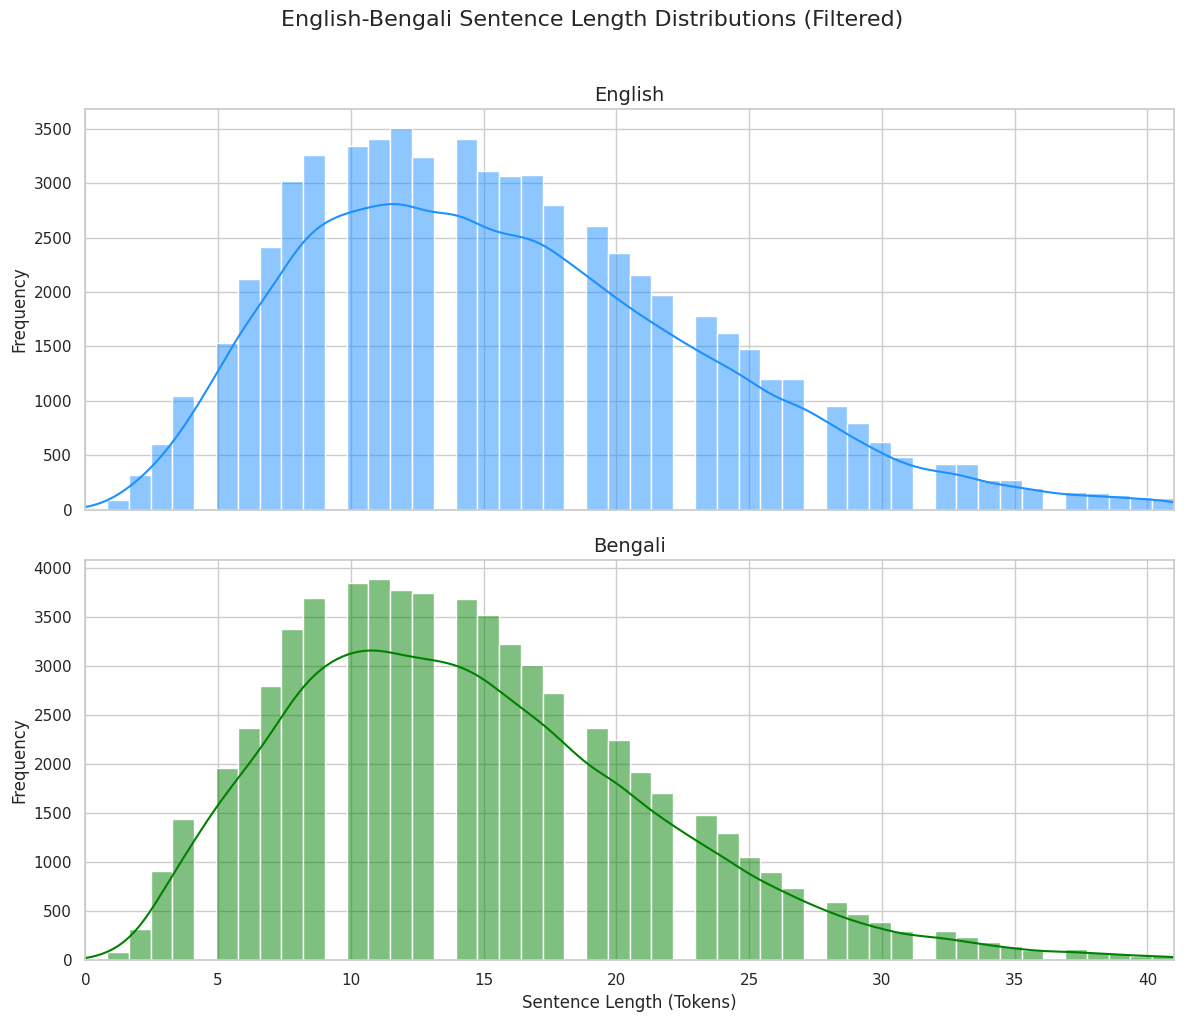

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


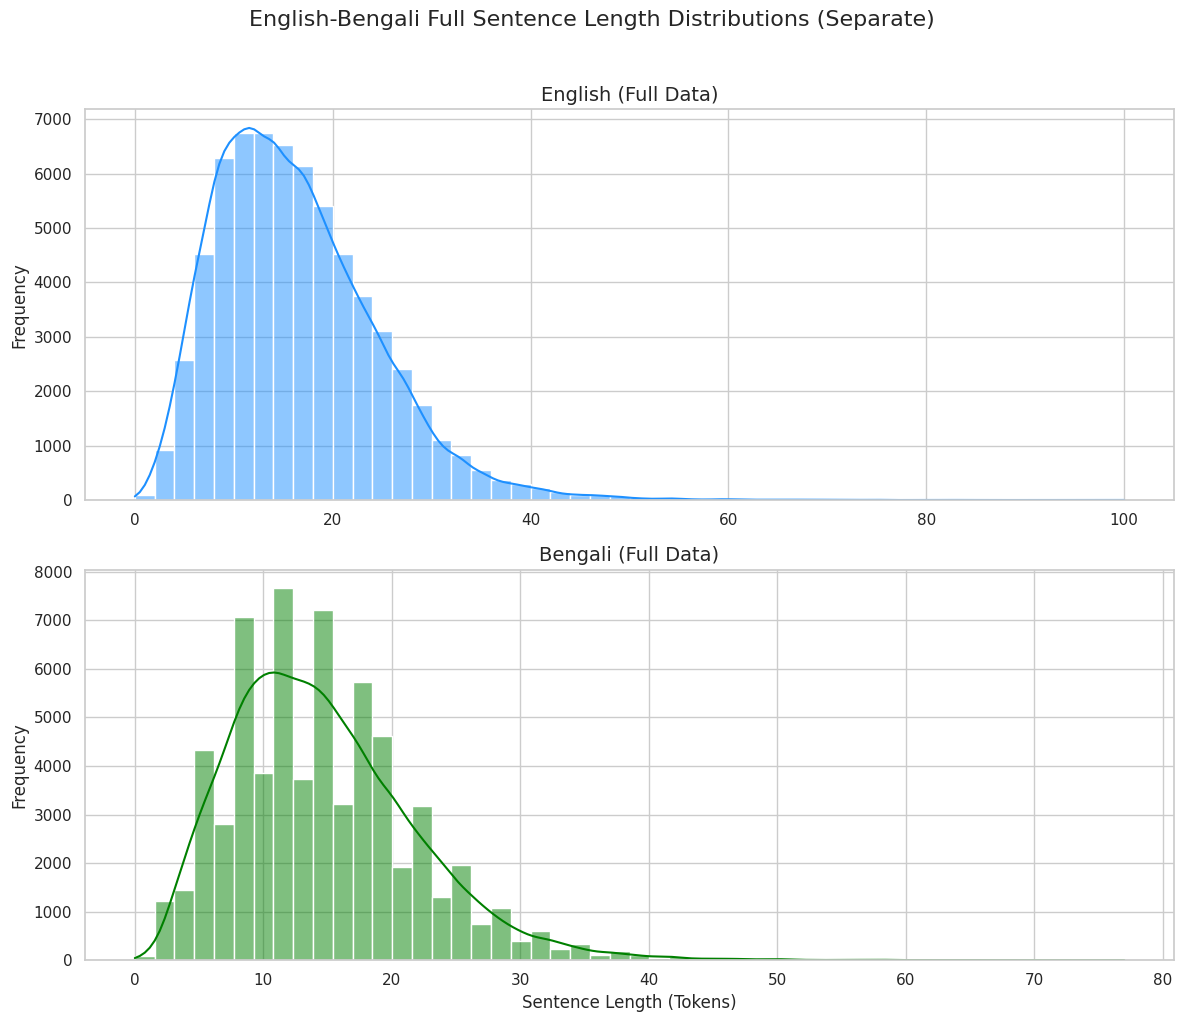


Plotting complete.
Plots saved as 'en_bn_sentence_length_filtered.png' and 'en_bn_sentence_length_full.png'


In [ ]:
"""
Part 3: Data Analysis - Sentence Lengths
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# (Assumes src_tokens_train and tgt_tokens_train exist from Part 2)

# 1. Calculate the length of each sentence
src_lengths = [len(s) for s in src_tokens_train]
tgt_lengths = [len(s) for s in tgt_tokens_train]

# 2. Store lengths in pandas Series for easy stats
src_series = pd.Series(src_lengths)
tgt_series = pd.Series(tgt_lengths)

# 3. Print summary statistics
print("--- Source (EN) Sentence Lengths (Tokens) ---")
# Get count, mean, std, min, max, and percentiles
src_stats = src_series.describe(percentiles=[.90, .95, .99])
print(src_stats)

print("\n--- Target (BN) Sentence Lengths (Tokens) ---")
tgt_stats = tgt_series.describe(percentiles=[.90, .95, .99])
print(tgt_stats)


# --- 4. Plotting the Distributions ---

# Set a consistent plot style
sns.set(style="whitegrid")

# --- (Optional) Plot 1: Overlaid Histograms (Full Data) ---
# (This plot is commented out, just as in the original code)
#
# plt.figure(figsize=(12, 7))
# sns.histplot(src_series, color="dodgerblue", label="Source (EN)", kde=True, alpha=0.6, bins=50)
# sns.histplot(tgt_series, color="green", label="Target (BN)", kde=True, alpha=0.6, bins=50)
# plt.title('Full Distribution of Sentence Lengths (Frequency vs. Length)', fontsize=16)
# plt.xlabel('Sentence Length (Tokens)', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)
# plt.legend()
# plt.show()


# --- 5. Prepare Filtered Data for Cleaner Plots ---
# Get the 99th percentile length as a plotting limit to hide outliers
max_len_src = src_stats.get('99%', src_stats.get('max'))
max_len_tgt = tgt_stats.get('99%', tgt_stats.get('max'))
plot_limit = int(max(max_len_src, max_len_tgt))

# Create new Series that only contain lengths up to the limit
src_filtered = src_series[src_series <= plot_limit]
tgt_filtered = tgt_series[tgt_series <= plot_limit]

# --- (Optional) Plot 2: Filtered Histograms ---
# (This plot is commented out, just as in the original code)
#
# plt.figure(figsize=(12, 7))
# sns.histplot(src_filtered, color="dodgerblue", label="Source (EN)", kde=True, alpha=0.6)
# sns.histplot(tgt_filtered, color="green", label="Target (BN)", kde=True, alpha=0.6)
# plt.title(f'Distribution of Sentence Lengths (Filtered at {plot_limit} Tokens)', fontsize=16)
# plt.xlabel('Sentence Length (Tokens)', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)
# plt.legend()
# plt.show()

# --- 6. Plot: Filtered Data (Separate Subplots) ---
# Shows the filtered data (up to 99th percentile)
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
fig.suptitle('Source-Target Sentence Length Distributions (Filtered)', fontsize=16, y=1.02)

# Source (EN) plot
sns.histplot(src_filtered, ax=axes[0], color="dodgerblue", kde=True, bins=50)
axes[0].set_title('Source (English)', fontsize=14)
axes[0].set_xlabel('')
axes[0].set_ylabel('Frequency')

# Target (BN) plot
sns.histplot(tgt_filtered, ax=axes[1], color="green", kde=True, bins=50)
axes[1].set_title('Target (Bengali)', fontsize=14)
axes[1].set_xlabel('Sentence Length (Tokens)')
axes[1].set_ylabel('Frequency')

plt.xlim(0, plot_limit)
plt.tight_layout()
# Save the figure
fig.savefig('src_tgt_sentence_length_filtered.png', dpi=300, bbox_inches='tight')
plt.show()

# --- 7. Plot: Full Data (Separate Subplots) ---
# Shows the *complete* data (including outliers)
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=False) # No shared x-axis
fig.suptitle('Source-Target Full Sentence Length Distributions (Separate)', fontsize=16, y=1.02)

# Source (EN) Full Data
sns.histplot(src_series, ax=axes[0], color="dodgerblue", kde=True, bins=50)
axes[0].set_title('Source (English) (Full Data)', fontsize=14)
axes[0].set_xlabel('')
axes[0].set_ylabel('Frequency')

# Target (BN) Full Data
sns.histplot(tgt_series, ax=axes[1], color="green", kde=True, bins=50)
axes[1].set_title('Target (Bengali) (Full Data)', fontsize=14)
axes[1].set_xlabel('Sentence Length (Tokens)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
# Save the figure
fig.savefig('src_tgt_sentence_length_full.png', dpi=300, bbox_inches='tight')
plt.show()


print("\nPlotting complete.")
print("Plots saved as 'src_tgt_sentence_length_filtered.png' and 'src_tgt_sentence_length_full.png'")

In [ ]:
"""
Part 3: Data Analysis - Sentence Lengths
"""
import pandas as pd

# (Assumes src_tokens_train and tgt_tokens_train exist from Part 2)

# 1. Get the list of lengths for your training data
src_lengths = [len(s) for s in src_tokens_train]
tgt_lengths = [len(s) for s in tgt_tokens_train]

# 2. Create a pandas Series to get quick stats
src_series = pd.Series(src_lengths)
tgt_series = pd.Series(tgt_lengths)

# 3. Print the descriptive statistics
print("--- Source (EN) Sentence Lengths (Tokens) ---")
# We add 90th, 95th, and 99th percentiles
print(src_series.describe(percentiles=[.90, .95, .99]))

print("\n--- Target (BN) Sentence Lengths (Tokens) ---")
print(tgt_series.describe(percentiles=[.90, .95, .99]))

--- English Sentence Lengths (Tokens) ---
count    65407.000000
mean        16.116975
std          8.132322
min          0.000000
50%         15.000000
90%         27.000000
95%         31.000000
99%         41.000000
max        100.000000
dtype: float64

--- Hindi Sentence Lengths (Tokens) ---
count    65407.000000
mean        14.630865
std          7.246930
min          0.000000
50%         14.000000
90%         24.000000
95%         28.000000
99%         36.000000
max         77.000000
dtype: float64


In [ ]:
"""
Part 4: PyTorch DataLoader (using TensorDataset)
"""

import torch
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# ----------------------------------------------------------------------------
# 1. TOKEN-TO-ID HELPER FUNCTION
# ----------------------------------------------------------------------------

def tokens_to_padded_ids(tokens, word2index, max_length, config):
    """
    Converts a list of tokens into a padded list of numerical IDs.
    Also adds <SOS> and <EOS> tokens.
    """
    # Get the numerical index for each special token
    sos_idx = word2index.get(config.SOS_TOKEN, config.UNK_IDX)
    eos_idx = word2index.get(config.EOS_TOKEN, config.UNK_IDX)
    pad_idx = word2index.get(config.PAD_TOKEN, config.UNK_IDX)
    unk_idx = word2index.get(config.UNK_TOKEN, config.UNK_IDX)

    # Start with <SOS> token
    indices = [sos_idx]

    # Convert sentence tokens to indices
    for token in tokens:
        indices.append(word2index.get(token, unk_idx))

    # Add <EOS> token
    indices.append(eos_idx)

    # Pad or truncate the sentence
    if len(indices) < max_length:
        # Pad with <pad> tokens if it's too short
        num_pads = max_length - len(indices)
        padded_indices = indices + ([pad_idx] * num_pads)
    else:
        # Truncate if it's too long, ensuring <EOS> is the last token
        truncated_indices = indices[:max_length - 1]
        padded_indices = truncated_indices + [eos_idx]

    return padded_indices

# ----------------------------------------------------------------------------
# 2. DATALOADER CREATION (TRAIN & VAL)
# ----------------------------------------------------------------------------

def prepare_train_val_loaders(config,
                              src_tokens_train, tgt_tokens_train,
                              src_tokens_val, tgt_tokens_val,
                              src_word2index, tgt_word2index):
    """
    Creates the training and validation DataLoader objects.
    """

    print("\n--- Part 4: Creating DataLoaders ---")

    # --- 1. Encode and Pad Training Data ---
    print(f"Encoding {len(src_tokens_train)} training sentences...")
    train_src_encoded = [
        tokens_to_padded_ids(tokens, src_word2index, config.SEQ_LENGTH, config)
        for tokens in src_tokens_train
    ]
    train_tgt_encoded = [
        tokens_to_padded_ids(tokens, tgt_word2index, config.SEQ_LENGTH, config)
        for tokens in tgt_tokens_train
    ]

    # --- 2. Encode and Pad Validation Data ---
    print(f"Encoding {len(src_tokens_val)} validation sentences...")
    val_src_encoded = [
        tokens_to_padded_ids(tokens, src_word2index, config.SEQ_LENGTH, config)
        for tokens in src_tokens_val
    ]
    val_tgt_encoded = [
        tokens_to_padded_ids(tokens, tgt_word2index, config.SEQ_LENGTH, config)
        for tokens in val_tokens_val
    ]

    # --- 3. Convert to PyTorch Tensors ---
    print("Converting to PyTorch Tensors...")
    train_src_tensor = torch.from_numpy(np.array(train_src_encoded)).long()
    train_tgt_tensor = torch.from_numpy(np.array(train_tgt_encoded)).long()

    val_src_tensor = torch.from_numpy(np.array(val_src_encoded)).long()
    val_tgt_tensor = torch.from_numpy(np.array(val_tgt_encoded)).long()

    # --- 4. Create TensorDatasets ---
    # Wraps the tensors. Indexing retrieves a pair (src, tgt).
    train_dataset = TensorDataset(train_src_tensor, train_tgt_tensor)
    val_dataset = TensorDataset(val_src_tensor, val_tgt_tensor)

    # --- 5. Create DataLoaders ---
    train_loader = DataLoader(
        train_dataset,
        batch_size=config.BATCH_SIZE,
        shuffle=True, # Shuffle training data
        drop_last=True # Drop the last, smaller batch
    )

    val_loader = DataLoader(
        val_dataset,
        batch_size=config.BATCH_SIZE,
        shuffle=False, # No need to shuffle validation
        drop_last=False
    )

    print("Train and Validation DataLoaders created.")

    # --- 6. Show an example from the dataloader ---
    try:
        example_src_batch, example_tgt_batch = next(iter(train_loader))
        print(f"\nExample train batch shape (SRC): {example_src_batch.shape}")
        print(f"Example train batch shape (TGT): {example_tgt_batch.shape}")

        print("\nExample numericalized source sentence (from batch):")
        print(example_src_batch[0])

        print("\nExample numericalized target sentence (from batch):")
        print(example_tgt_batch[0])
    except Exception as e:
        print(f"Could not show dataloader example: {e}")

    return train_loader, val_loader


def prepare_test_loader(config, src_tokens_test, test_ids, src_word2index):
    """
    Creates the TEST (submission) DataLoader.
    Contains only the source (English) data.
    """

    print("\n--- Part 4: Creating Test DataLoader ---")

    # --- 1. Encode and Pad Test Data ---
    print(f"Encoding {len(src_tokens_test)} test sentences...")
    test_src_encoded = [
        tokens_to_padded_ids(tokens, src_word2index, config.SEQ_LENGTH, config)
        for tokens in src_tokens_test
    ]

    # --- 2. Convert to Tensors ---
    test_src_tensor = torch.from_numpy(np.array(test_src_encoded)).long()

    # --- 3. Create TensorDataset ---
    # We pair the source tensor with a dummy tensor of indices (0, 1, 2...)
    # This lets the DataLoader work but we only use the src tensor.
    dummy_indices_tensor = torch.arange(len(test_ids))
    test_dataset = TensorDataset(test_src_tensor, dummy_indices_tensor)

    # --- 4. Create DataLoader ---
    test_loader = DataLoader(
        test_dataset,
        batch_size=config.BATCH_SIZE,
        shuffle=False, # Must NOT shuffle test data
        drop_last=False
    )

    print("Test (Submission) DataLoader created.")

    # Return the test_ids list so we can match predictions to IDs
    return test_loader, test_ids

In [ ]:
# Create the training and validation dataloaders
train_loader, val_loader = prepare_train_val_loaders(
    config,
    src_tokens_train, tgt_tokens_train,
    src_tokens_val, tgt_tokens_val,
    src_word2index, tgt_word2index
)

# Create the test dataloader
# We use `_` to ignore the second return value (test_ids)
test_loader, _ = prepare_test_loader(
    config, src_tokens_test, test_ids, src_word2index
)


--- Part 3: Creating DataLoaders ---
Encoding 65407 training sentences...
Encoding 3442 validation sentences...
Converting to PyTorch Tensors...
Train and Validation DataLoaders created.

Example train batch shape (SRC): torch.Size([50, 45])
Example train batch shape (TGT): torch.Size([50, 45])

Example numericalized source sentence (from batch):
tensor([   1,    9, 5169,   28, 8743, 2173, 8744, 3031, 2173,   23,   74, 4461,
        8745,    7,  110,    9,  525, 1469,  295,  551,   11,   19,  137,   28,
        8743,  651,   52,   74, 1932,   88, 3031,    2,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0])

Example numericalized target sentence (from batch):
tensor([    1,  7879,  4010,  1914,    33,     3,  5096,   517,   122,    80,
          496,  1613, 10881,  6022,  7134,  1644,   344,  5096,  3069,  7879,
          482,    59,     2,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,    

In [ ]:
"""
Part 5: Transformer Building Blocks (Attention)
"""
import torch
import torch.nn as nn
import math

# ----------------------------------------------------------------------------
# 1. SCALED DOT-PRODUCT ATTENTION (Function)
# ----------------------------------------------------------------------------

def scaled_dot_product_attention(query, key, value, mask=None, dropout=None):
    """
    Calculates the core "Scaled Dot-Product Attention".
    Formula: softmax( (Q * K^T) / sqrt(d_k) ) * V

    Args:
        query (Tensor): Q vectors [batch, heads, q_len, d_k]
        key (Tensor): K vectors [batch, heads, k_len, d_k]
        value (Tensor): V vectors [batch, heads, v_len, d_v] (k_len == v_len)
        mask (Tensor, optional): Hides positions (padding or future words).
        dropout (nn.Dropout, optional): Dropout layer for attention weights.

    Returns:
        (Tensor, Tensor):
        1. Output (weighted values) [batch, heads, q_len, d_v]
        2. Attention weights [batch, heads, q_len, k_len]
    """

    # Get key dimension for scaling
    d_k = query.size(-1)

    # 1. Calculate scores: (Q * K^T) / sqrt(d_k)
    # [b, h, q_len, d_k] @ [b, h, d_k, k_len] -> [b, h, q_len, k_len]
    scores = torch.matmul(query, key.transpose(-2, -1)) / math.sqrt(d_k)

    # 2. Apply mask (if provided)
    # Fills 0s in the mask with a large negative number (-1e9)
    if mask is not None:
        scores = scores.masked_fill(mask == 0, -1e9)

    # 3. Apply softmax to get attention weights (probabilities)
    attention_weights = torch.softmax(scores, dim=-1)

    # 4. Apply dropout
    if dropout is not None:
        attention_weights = dropout(attention_weights)

    # 5. Get weighted output: (Attention * V)
    # [b, h, q_len, k_len] @ [b, h, v_len, d_v] -> [b, h, q_len, d_v]
    output = torch.matmul(attention_weights, value)

    return output, attention_weights

# ----------------------------------------------------------------------------
# 2. MULTI-HEAD ATTENTION (Module)
# ----------------------------------------------------------------------------

class MultiHeadAttention(nn.Module):
    """
    Implements the Multi-Head Attention layer.

    1. Projects Q, K, V with Linear layers (W_q, W_k, W_v).
    2. Splits Q, K, V into multiple "heads".
    3. Applies scaled dot-product attention to each head.
    4. Concatenates head results.
    5. Applies a final Linear layer (W_o).
    """
    def __init__(self, d_model, num_heads, dropout_prob): # Renamed
        """
        Args:
            d_model (int): Embedding dimension (e.g., 512).
            num_heads (int): Number of heads (e.g., 8).
            dropout_prob (float): Dropout probability.
        """
        super(MultiHeadAttention, self).__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"

        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads # Dimension per head

        # Linear projections
        self.W_q = nn.Linear(d_model, d_model)
        self.W_k = nn.Linear(d_model, d_model)
        self.W_v = nn.Linear(d_model, d_model)
        self.W_o = nn.Linear(d_model, d_model) # Final output layer

        self.dropout = nn.Dropout(dropout_prob)

    def split_heads(self, x, batch_size):
        """
        Splits d_model into (num_heads, d_k).
        Shape: [batch, seq_len, d_model] -> [batch, num_heads, seq_len, d_k]
        """
        # [batch, seq_len, num_heads, d_k]
        x = x.view(batch_size, -1, self.num_heads, self.d_k)
        # [batch, num_heads, seq_len, d_k]
        return x.transpose(1, 2)

    def forward(self, query, key, value, mask=None):
        """
        Args:
            query (Tensor): Q [batch, q_len, d_model]
            key (Tensor): K [batch, k_len, d_model]
            value (Tensor): V [batch, v_len, d_model]
            mask (Tensor, optional): Mask to hide positions.

        Returns:
            Tensor: Output [batch, q_len, d_model]
        """
        batch_size = query.size(0)

        # 1. Project Q, K, V
        # [batch, seq_len, d_model]
        Q = self.W_q(query)
        K = self.W_k(key)
        V = self.W_v(value)

        # 2. Split into heads
        # [batch, num_heads, seq_len, d_k]
        Q = self.split_heads(Q, batch_size)
        K = self.split_heads(K, batch_size)
        V = self.split_heads(V, batch_size)

        # 3. Apply scaled dot-product attention
        # attention_output: [batch, num_heads, q_len, d_k]
        attention_output, _ = scaled_dot_product_attention(
            Q, K, V, mask, self.dropout
        )

        # 4. Concatenate heads
        # [batch, q_len, num_heads, d_k]
        attention_output = attention_output.transpose(1, 2).contiguous()
        # [batch, q_len, d_model]
        attention_output = attention_output.view(batch_size, -1, self.d_model)

        # 5. Final linear layer
        # [batch, q_len, d_model]
        output = self.W_o(attention_output)

        return output

In [ ]:
"""
Part 6: Transformer Building Blocks (FFN & Positional Encoding)
"""
import torch
import torch.nn as nn
import math

# ----------------------------------------------------------------------------
# 1. POSITION-WISE FEED-FORWARD NETWORK (Module)
# ----------------------------------------------------------------------------

class PositionwiseFeedForward(nn.Module):
    """
    Implements the Position-wise Feed-Forward Network (FFN).
    This is a two-layer Linear network (Expand -> ReLU -> Contract)
    applied to each token position independently.
    """
    def __init__(self, d_model, d_ff, dropout_prob): # Renamed
        """
        Args:
            d_model (int): Input and output dimension (e.g., 512).
            d_ff (int): Inner dimension (e.g., 2048).
            dropout_prob (float): Dropout probability.
        """
        super(PositionwiseFeedForward, self).__init__()
        self.linear_1 = nn.Linear(d_model, d_ff)
        self.linear_2 = nn.Linear(d_ff, d_model)
        self.dropout = nn.Dropout(dropout_prob)
        self.relu = nn.ReLU()

    def forward(self, x):
        """
        Args:
            x (Tensor): Input [batch, seq_len, d_model]
        Returns:
            Tensor: Output [batch, seq_len, d_model]
        """
        # [batch, seq_len, d_model] -> [batch, seq_len, d_ff]
        x = self.relu(self.linear_1(x))
        x = self.dropout(x)
        # [batch, seq_len, d_ff] -> [batch, seq_len, d_model]
        x = self.linear_2(x)
        return x

# ----------------------------------------------------------------------------
# 2. POSITIONAL ENCODING (Module)
# ----------------------------------------------------------------------------

class PositionalEncoding(nn.Module):
    """
    Injects token position information using sine and cosine functions.
    PE(pos, 2i)   = sin(pos / 10000^(2i / d_model))
    PE(pos, 2i+1) = cos(pos / 10000^(2i / d_model))
    """
    def __init__(self, d_model, dropout_prob, max_len=5000): # Renamed
        """
        Args:
            d_model (int): Embedding dimension (e.g., 512).
            dropout_prob (float): Dropout probability.
            max_len (int): Max sequence length to pre-compute.
        """
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout_prob)

        # --- Create the positional encoding matrix ---
        # Shape: [max_len, d_model]
        pe = torch.zeros(max_len, d_model)

        # Shape: [max_len, 1]
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)

        # Calculate the division term (1 / 10000^(2i / d_model))
        div_term = torch.exp(torch.arange(0, d_model, 2).float() *
                             (-math.log(10000.0) / d_model))

        # Apply sin to even indices
        pe[:, 0::2] = torch.sin(position * div_term)
        # Apply cos to odd indices
        pe[:, 1::2] = torch.cos(position * div_term)

        # Add a batch dimension: [1, max_len, d_model]
        pe = pe.unsqueeze(0)

        # Register 'pe' as a buffer (part of state, but not a parameter)
        self.register_buffer('pe', pe)

    def forward(self, x):
        """
        Adds positional encoding to the input embeddings.
        Args:
            x (Tensor): Input embeddings [batch, seq_len, d_model]
        Returns:
            Tensor: Embeddings + positional encoding [batch, seq_len, d_model]
        """
        # Add the pre-computed PE matrix (sliced to seq_len)
        x = x + self.pe[:, :x.size(1), :]
        return self.dropout(x)

In [ ]:

import torch
import torch.nn as nn
import math

# (Assuming MultiHeadAttention, PositionwiseFeedForward, PositionalEncoding are defined)

# ----------------------------------------------------------------------------
# 1. ENCODER LAYER (Single Block)
# ----------------------------------------------------------------------------

class EncoderLayer(nn.Module):
    """
    A single Encoder block.

    Contains:
    1. Multi-Head Self-Attention
    2. Position-wise Feed-Forward Network
    (Both followed by Add & Norm)
    """
    def __init__(self, d_model, num_heads, d_ff, dropout_prob): # Renamed
        super(EncoderLayer, self).__init__()

        # Sub-layer 1: Self-Attention
        self.self_attn = MultiHeadAttention(d_model, num_heads, dropout_prob)
        self.norm1 = nn.LayerNorm(d_model)
        self.dropout1 = nn.Dropout(dropout_prob)

        # Sub-layer 2: Feed-Forward
        self.feed_forward = PositionwiseFeedForward(d_model, d_ff, dropout_prob)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout2 = nn.Dropout(dropout_prob)

    def forward(self, x, mask):
        """
        Args:
            x (Tensor): Input [batch, seq_len, d_model]
            mask (Tensor): Source padding mask [batch, 1, 1, seq_len]
        """

        # 1. Self-Attention (Q, K, V are all 'x')
        attn_output = self.self_attn(query=x, key=x, value=x, mask=mask)
        x = self.norm1(x + self.dropout1(attn_output)) # Add & Norm

        # 2. Feed-Forward
        ff_output = self.feed_forward(x)
        x = self.norm2(x + self.dropout2(ff_output)) # Add & Norm

        return x

# ----------------------------------------------------------------------------
# 2. ENCODER (Full Stack)
# ----------------------------------------------------------------------------

class Encoder(nn.Module):
    """
    The full Encoder, a stack of N EncoderLayers.

    Processes the source sequence.
    """
    def __init__(self,
                 src_vocab_size, # Renamed
                 d_model,
                 num_layers,
                 num_heads,
                 d_ff,
                 dropout_prob, # Renamed
                 max_src_seq_len): # Renamed
        """
        Args:
            src_vocab_size (int): Size of the source vocabulary.
            d_model (int): Embedding dimension.
            num_layers (int): Number of EncoderLayers.
            num_heads (int): Number of attention heads.
            d_ff (int): Inner dimension of FFN.
            dropout_prob (float): Dropout probability.
            max_src_seq_len (int): Max source sequence length.
        """
        super(Encoder, self).__init__()

        self.d_model = d_model
        self.embedding = nn.Embedding(src_vocab_size, d_model)
        self.pos_encoding = PositionalEncoding(d_model, dropout_prob, max_len=max_src_seq_len)

        # Create a stack of N layers
        self.layers = nn.ModuleList(
            [EncoderLayer(d_model, num_heads, d_ff, dropout_prob)
             for _ in range(num_layers)]
        )

        self.dropout = nn.Dropout(dropout_prob)
        self.norm = nn.LayerNorm(d_model) # Final normalization

    def forward(self, x, mask):
        """
        Args:
            x (Tensor): Source token indices [batch, src_seq_len]
            mask (Tensor): Source padding mask [batch, 1, 1, src_seq_len]

        Returns:
            Tensor: Encoded sequence [batch, src_seq_len, d_model]
        """

        # 1. Embedding + Scaling
        x = self.embedding(x) * math.sqrt(self.d_model)

        # 2. Add Positional Encoding
        x = self.pos_encoding(x)
        x = self.dropout(x)

        # 3. Pass through all N layers
        for layer in self.layers:
            x = layer(x, mask)

        # 4. Final normalization
        return self.norm(x)

In [ ]:

import torch
import torch.nn as nn
import math

# (Assuming MultiHeadAttention, PositionwiseFeedForward, PositionalEncoding are defined)

# ----------------------------------------------------------------------------
# 1. DECODER LAYER (Single Block)
# ----------------------------------------------------------------------------

class DecoderLayer(nn.Module):
    """
    A single Decoder block.

    Contains:
    1. Masked Self-Attention (on target)
    2. Cross-Attention (on encoder output)
    3. Feed-Forward Network
    (All with Add & Norm)
    """
    def __init__(self, d_model, num_heads, d_ff, dropout_prob): # Renamed
        super(DecoderLayer, self).__init__()

        # Sub-layer 1: Masked Self-Attention
        self.self_attn = MultiHeadAttention(d_model, num_heads, dropout_prob)
        self.norm1 = nn.LayerNorm(d_model)
        self.dropout1 = nn.Dropout(dropout_prob)

        # Sub-layer 2: Cross-Attention (Encoder-Decoder)
        self.cross_attn = MultiHeadAttention(d_model, num_heads, dropout_prob)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout2 = nn.Dropout(dropout_prob)

        # Sub-layer 3: Feed-Forward
        self.feed_forward = PositionwiseFeedForward(d_model, d_ff, dropout_prob)
        self.norm3 = nn.LayerNorm(d_model)
        self.dropout3 = nn.Dropout(dropout_prob)

    def forward(self, x, encoder_output, src_mask, tgt_mask):
        """
        Args:
            x (Tensor): Target input [batch, tgt_len, d_model]
            encoder_output (Tensor): Encoder's output [batch, src_len, d_model]
            src_mask (Tensor): Hides source padding [batch, 1, 1, src_len]
            tgt_mask (Tensor): Hides target padding & future tokens [batch, 1, tgt_len, tgt_len]
        """

        # 1. Masked Self-Attention (attends to itself, using target mask)
        self_attn_output = self.self_attn(query=x, key=x, value=x, mask=tgt_mask)
        x = self.norm1(x + self.dropout1(self_attn_output)) # Add & Norm

        # 2. Cross-Attention (Q=decoder, K/V=encoder, using source mask)
        cross_attn_output = self.cross_attn(query=x,
                                            key=encoder_output,
                                            value=encoder_output,
                                            mask=src_mask)
        x = self.norm2(x + self.dropout2(cross_attn_output)) # Add & Norm

        # 3. Feed-Forward
        ff_output = self.feed_forward(x)
        x = self.norm3(x + self.dropout3(ff_output)) # Add & Norm

        return x

# ----------------------------------------------------------------------------
# 2. DECODER (Full Stack)
# ----------------------------------------------------------------------------

class Decoder(nn.Module):
    """
    The full Decoder, a stack of N DecoderLayers.

    Processes the target sequence.
    """
    def __init__(self,
                 tgt_vocab_size, # Renamed
                 d_model,
                 num_layers,
                 num_heads,
                 d_ff,
                 dropout_prob, # Renamed
                 max_tgt_seq_len): # Renamed
        """
        Args:
            tgt_vocab_size (int): Size of the target vocabulary.
            d_model (int): Embedding dimension.
            num_layers (int): Number of DecoderLayers.
            num_heads (int): Number of attention heads.
            d_ff (int): Inner dimension of FFN.
            dropout_prob (float): Dropout probability.
            max_tgt_seq_len (int): Max target sequence length.
        """
        super(Decoder, self).__init__()

        self.d_model = d_model
        self.embedding = nn.Embedding(tgt_vocab_size, d_model)
        self.pos_encoding = PositionalEncoding(d_model, dropout_prob, max_len=max_tgt_seq_len)

        # Create a stack of N layers
        self.layers = nn.ModuleList(
            [DecoderLayer(d_model, num_heads, d_ff, dropout_prob)
             for _ in range(num_layers)]
        )

        self.dropout = nn.Dropout(dropout_prob)
        self.norm = nn.LayerNorm(d_model) # Final normalization

    def forward(self, x, encoder_output, src_mask, tgt_mask):
        """
        Args:
            x (Tensor): Target token indices [batch, tgt_len]
            encoder_output (Tensor): Encoder's output [batch, src_len, d_model]
            src_mask (Tensor): Source padding mask
            tgt_mask (Tensor): Target mask

        Returns:
            Tensor: Decoded sequence [batch, tgt_len, d_model]
        """

        # 1. Embedding + Scaling
        x = self.embedding(x) * math.sqrt(self.d_model)

        # 2. Add Positional Encoding
        x = self.pos_encoding(x)
        x = self.dropout(x)

        # 3. Pass through all N layers
        for layer in self.layers:
            x = layer(x, encoder_output, src_mask, tgt_mask)

        # 4. Final normalization
        return self.norm(x)

In [ ]:

import torch
import torch.nn as nn
import math

# (Assuming Encoder and Decoder classes are defined)

# ----------------------------------------------------------------------------
# 1. TRANSFORMER MODEL (Module)
# ----------------------------------------------------------------------------

class Transformer(nn.Module):
    """
    The complete Encoder-Decoder Transformer model.

    Combines:
    1. Encoder
    2. Decoder
    3. Final Linear layer (to predict words)
    """
    def __init__(self,
                 config,
                 src_vocab_size,
                 tgt_vocab_size,
                 src_pad_idx,
                 tgt_pad_idx
                ):
        """
        Args:
            config (Config): The main settings object.
            src_vocab_size (int): Source vocab size (from config.VOCAB_SRC_SIZE).
            tgt_vocab_size (int): Target vocab size (from config.VOCAB_TGT_SIZE).
            src_pad_idx (int): Index of the source padding token.
            tgt_pad_idx (int): Index of the target padding token.
        """
        super(Transformer, self).__init__()

        self.config = config
        self.src_pad_idx = src_pad_idx
        self.tgt_pad_idx = tgt_pad_idx

        # 1. Initialize Encoder
        self.encoder = Encoder(
            src_vocab_size=src_vocab_size,
            d_model=config.D_MODEL,
            num_layers=config.NUM_ENCODER_LAYERS,
            num_heads=config.N_HEADS,
            d_ff=config.D_FF,
            dropout_prob=config.DROPOUT, # Renamed
            max_src_seq_len=config.SEQ_LENGTH + 20 # Add a buffer
        )

        # 2. Initialize Decoder
        self.decoder = Decoder(
            tgt_vocab_size=tgt_vocab_size,
            d_model=config.D_MODEL,
            num_layers=config.NUM_DECODER_LAYERS,
            num_heads=config.N_HEADS,
            d_ff=config.D_FF,
            dropout_prob=config.DROPOUT, # Renamed
            max_tgt_seq_len=config.SEQ_LENGTH + 20 # Add a buffer
        )

        # 3. Final output Linear layer
        # Projects [batch, len, d_model] -> [batch, len, tgt_vocab_size]
        self.final_linear = nn.Linear(config.D_MODEL, tgt_vocab_size)

        # Initialize weights
        self._initialize_weights()

        # --- Weight Tying ---
        # Share weights between decoder embedding and final linear layer
        self.final_linear.weight = self.decoder.embedding.weight

    def _initialize_weights(self):
        """Applies Xavier uniform initialization to parameters."""
        for p in self.parameters():
            if p.dim() > 1:
                nn.init.xavier_uniform_(p)

    def create_src_mask(self, src):
        """
        Creates a mask to hide padding tokens in the source sequence.
        Shape: [batch, 1, 1, src_len]
        """
        # Finds where src is NOT the pad token, then adds attention dims
        src_mask = (src != self.src_pad_idx).unsqueeze(1).unsqueeze(2)
        return src_mask

    def create_tgt_mask(self, tgt):
        """
        Creates a mask for the target sequence.
        Hides padding tokens AND future tokens (look-ahead mask).
        Shape: [batch, 1, tgt_len, tgt_len]
        """
        # 1. Target padding mask (hides <pad>)
        # Shape: [batch, 1, 1, tgt_len]
        tgt_pad_mask = (tgt != self.tgt_pad_idx).unsqueeze(1).unsqueeze(2)

        # 2. Look-ahead mask (hides future tokens)
        tgt_seq_len = tgt.shape[1]
        # Creates a lower-triangular matrix (True on and below diagonal)
        look_ahead_mask = torch.triu(
            torch.ones((1, 1, tgt_seq_len, tgt_seq_len), device=tgt.device),
            diagonal=1
        ) == 0

        # 3. Combine masks: (pad_mask) AND (look_ahead_mask)
        # Shape: [batch, 1, tgt_len, tgt_len]
        tgt_mask = tgt_pad_mask & look_ahead_mask
        return tgt_mask

    def forward(self, src, tgt):
        """
        Forward pass for the Transformer.

        Args:
            src (Tensor): Source indices [batch, src_len]
            tgt (Tensor): Target indices (shifted right) [batch, tgt_len]

        Returns:
            Tensor: Output logits [batch, tgt_len, tgt_vocab_size]
        """
        # 1. Create masks
        src_mask = self.create_src_mask(src)
        tgt_mask = self.create_tgt_mask(tgt)

        # 2. Pass source through Encoder
        encoder_output = self.encoder(src, src_mask)

        # 3. Pass target and encoder output through Decoder
        decoder_output = self.decoder(tgt, encoder_output, src_mask, tgt_mask)

        # 4. Project to vocabulary
        output = self.final_linear(decoder_output)

        return output

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
import time
import math
from tqdm import tqdm

# (Assuming Transformer class is defined)

# Helper to format epoch time
def epoch_time(start_time, end_time):
    """Calculates elapsed time for an epoch."""
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

# ----------------------------------------------------------------------------
# 1. TRAINING FUNCTION (One Epoch)
# ----------------------------------------------------------------------------

def train_fn(model, dataloader, optimizer, criterion, config):
    """Trains the model for one epoch."""
    model.train() # Set model to training mode
    epoch_loss = 0.0

    # Loop through batches
    for batch in tqdm(dataloader, desc="Training", leave=False):

        # 1. Get batch and move to device
        src = batch[0].to(config.DEVICE)
        tgt = batch[1].to(config.DEVICE)

        # 2. Zero gradients
        optimizer.zero_grad()

        # 3. Create shifted targets for "teacher forcing"
        # Input to decoder: <sos>, w1, w2, ...
        tgt_input = tgt[:, :-1]
        # Target for loss: w1, w2, ..., <eos>
        tgt_output = tgt[:, 1:]

        # 4. Forward pass
        output = model(src, tgt_input)

        # 5. Calculate loss
        # Flatten output: [batch * len, vocab_size]
        # Flatten target: [batch * len]
        output_flat = output.contiguous().view(-1, output.shape[-1])
        tgt_output_flat = tgt_output.contiguous().view(-1)

        # Loss function ignores PAD_IDX
        loss = criterion(output_flat, tgt_output_flat)

        # 6. Backward pass and optimize
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0) # Clip gradients
        optimizer.step()

        # 7. Accumulate loss
        epoch_loss += loss.item()

    return epoch_loss / len(dataloader) # Return average loss

# ----------------------------------------------------------------------------
# 2. EVALUATION FUNCTION (One Epoch)
# ----------------------------------------------------------------------------

def evaluate_fn(model, dataloader, criterion, config):
    """Evaluates the model on the validation set."""
    model.eval() # Set model to evaluation mode
    epoch_loss = 0.0

    with torch.no_grad(): # Disable gradient calculation
        for batch in tqdm(dataloader, desc="Evaluating", leave=False):

            # 1. Get batch and move to device
            src = batch[0].to(config.DEVICE)
            tgt = batch[1].to(config.DEVICE)

            # 2. Create shifted targets
            tgt_input = tgt[:, :-1]
            tgt_output = tgt[:, 1:]

            # 3. Forward pass
            output = model(src, tgt_input)

            # 4. Calculate loss
            output_flat = output.contiguous().view(-1, output.shape[-1])
            tgt_output_flat = tgt_output.contiguous().view(-1)

            loss = criterion(output_flat, tgt_output_flat)

            # 5. Accumulate loss
            epoch_loss += loss.item()

    return epoch_loss / len(dataloader) # Return average loss

# ----------------------------------------------------------------------------
# 3. MAIN TRAINING RUNNER
# ----------------------------------------------------------------------------

def run_training_loop(config, train_loader, val_loader): # Renamed
    """
    Initializes and runs the full training and validation loop.
    """
    print("\n--- Starting Training (Part 10) ---")

    # 1. Initialize the Transformer model
    print("Initializing model...")
    model = Transformer(
        config=config,
        src_vocab_size=config.VOCAB_SRC_SIZE, # Use SRC
        tgt_vocab_size=config.VOCAB_TGT_SIZE, # Use TGT
        src_pad_idx=config.PAD_IDX,
        tgt_pad_idx=config.PAD_IDX
    )

    # 2. Handle Multi-GPU
    if config.USE_MULTI_GPU and torch.cuda.device_count() > 1:
        print(f"--- Using {torch.cuda.device_count()} GPUs via nn.DataParallel ---")
        model = nn.DataParallel(model) # Wrap model
    else:
        print(f"--- Using a single device: {config.DEVICE} ---")

    # 3. Move model to device
    model = model.to(config.DEVICE)

    # 4. Initialize Optimizer
    print(f"Initializing Adam optimizer with LR: {config.LEARNING_RATE}")
    optimizer = optim.Adam(model.parameters(), lr=config.LEARNING_RATE)

    # 5. Initialize Loss Function (Criterion)
    print(f"Initializing CrossEntropyLoss, ignoring index: {config.PAD_IDX}")
    # Use label smoothing for better performance
    criterion = nn.CrossEntropyLoss(ignore_index=config.PAD_IDX, label_smoothing=0.1)

    # --- Training Loop ---
    best_val_loss = float('inf')

    print(f"\n--- Starting training for {config.NUM_EPOCHS} epochs ---")

    for epoch in range(config.NUM_EPOCHS):

        start_time = time.time()

        # Run one epoch
        train_loss = train_fn(model, train_loader, optimizer, criterion, config)
        val_loss = evaluate_fn(model, val_loader, criterion, config)

        end_time = time.time()
        epoch_mins, epoch_secs = epoch_time(start_time, end_time)

        # Check if this is the best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss

            # Save the best model
            # (If using DataParallel, save `model.module`)
            model_state = model.module.state_dict() if isinstance(model, nn.DataParallel) else model.state_dict()
            torch.save(model_state, config.MODEL_SAVE_PATH)
            save_status = " (Best model saved)"
        else:
            save_status = ""

        # Print epoch results
        print(f"\nEpoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s")
        print(f"\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}")
        print(f"\t Val. Loss: {val_loss:.3f} |  Val. PPL: {math.exp(val_loss):7.3f} {save_status}")

    print("\n--- Training Finished ---")
    print(f"Best validation loss: {best_val_loss:.3f}")
    print(f"Best model saved to: {config.MODEL_SAVE_PATH}")

    # --- Save the final model ---
    print(f"Saving final model (Epoch {config.NUM_EPOCHS}) to: {config.MODEL_SAVE_PATH_FINAL}")
    model_state = model.module.state_dict() if isinstance(model, nn.DataParallel) else model.state_dict()
    torch.save(model_state, config.MODEL_SAVE_PATH_FINAL)
    # -----------------------------

    # Return the unwrapped model
    if isinstance(model, nn.DataParallel):
        return model.module
    else:
        return model

In [ ]:
# This cell starts the full training process.

# Set the number of epochs for this specific run
config.NUM_EPOCHS = 15 # (You can set this to 1 for a quick test)

trained_model = run_training_loop(
    config,
    train_loader, # Renamed
    val_loader  # Renamed
)

print("\n--- Training script complete ---")
print(f"Model type: {type(trained_model)}")


--- Starting Training (Part 9) ---
Initializing model...
--- Using 2 GPUs via nn.DataParallel ---
Initializing Adam optimizer with LR: 0.0001
Initializing CrossEntropyLoss, ignoring index: 0

--- Starting training for 15 epochs ---



Epoch: 01 | Time: 3m 53s
	Train Loss: 7.148 | Train PPL: 1271.763
	 Val. Loss: 6.635 |  Val. PPL: 761.044  (Best model saved)



Epoch: 02 | Time: 3m 54s
	Train Loss: 6.312 | Train PPL: 551.278
	 Val. Loss: 6.092 |  Val. PPL: 442.229  (Best model saved)



Epoch: 03 | Time: 3m 54s
	Train Loss: 5.766 | Train PPL: 319.106
	 Val. Loss: 5.665 |  Val. PPL: 288.486  (Best model saved)



Epoch: 04 | Time: 3m 54s
	Train Loss: 5.311 | Train PPL: 202.461
	 Val. Loss: 5.331 |  Val. PPL: 206.578  (Best model saved)



Epoch: 05 | Time: 3m 54s
	Train Loss: 4.917 | Train PPL: 136.605
	 Val. Loss: 5.079 |  Val. PPL: 160.689  (Best model saved)



Epoch: 06 | Time: 3m 54s
	Train Loss: 4.571 | Train PPL:  96.681
	 Val. Loss: 4.863 |  Val. PPL: 129.436  (Best model saved)



Epoch: 07 | Time: 3m 54s
	Train Loss: 4.258 | Train PPL:  70.642
	 Val. Loss: 4.680 |  Val. PPL: 107.765  (Best model saved)



Epoch: 08 | Time: 3m 54s
	Train Loss: 3.964 | Train PPL:  52.684
	 Val. Loss: 4.535 |  Val. PPL:  93.222  (Best model saved)



Epoch: 09 | Time: 3m 54s
	Train Loss: 3.696 | Train PPL:  40.295
	 Val. Loss: 4.414 |  Val. PPL:  82.632  (Best model saved)



Epoch: 10 | Time: 3m 54s
	Train Loss: 3.453 | Train PPL:  31.586
	 Val. Loss: 4.322 |  Val. PPL:  75.335  (Best model saved)



Epoch: 11 | Time: 3m 54s
	Train Loss: 3.228 | Train PPL:  25.227
	 Val. Loss: 4.267 |  Val. PPL:  71.317  (Best model saved)



Epoch: 12 | Time: 3m 54s
	Train Loss: 3.022 | Train PPL:  20.531
	 Val. Loss: 4.205 |  Val. PPL:  67.009  (Best model saved)



Epoch: 13 | Time: 3m 54s
	Train Loss: 2.831 | Train PPL:  16.959
	 Val. Loss: 4.155 |  Val. PPL:  63.742  (Best model saved)



Epoch: 14 | Time: 3m 54s
	Train Loss: 2.657 | Train PPL:  14.255
	 Val. Loss: 4.153 |  Val. PPL:  63.644  (Best model saved)



Epoch: 15 | Time: 3m 54s
	Train Loss: 2.498 | Train PPL:  12.155
	 Val. Loss: 4.133 |  Val. PPL:  62.395  (Best model saved)

--- Training Finished ---
Best validation loss: 4.133
Model saved to: transformer_model_bn.pth

--- Training script complete ---
Model type: <class '__main__.Transformer'>


In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
import time
import math
import json
import os
from tqdm import tqdm

# (Assuming Config, load_train_val_data, prepare_train_val_loaders,
#  Transformer, train_fn, evaluate_fn, and epoch_time are defined)

# --- 1. Define File Paths ---
# Path to the *original* dataset
DATA_PATH = "/kaggle/input/capstone-dataset/Train"

# Path to your *saved model artifacts*
MODEL_INPUT_DIR = "/kaggle/input/json-files-eng2bengali"
MODEL_MOD_DIR = "/kaggle/input/eng2bengali/transformers/default/1"
MODEL_PATH = os.path.join(MODEL_MOD_DIR, "transformer_model_bn.pth")
CONFIG_PATH = os.path.join(MODEL_INPUT_DIR, "config.json")
SRC_VOCAB_PATH = os.path.join(MODEL_INPUT_DIR, "en_word2index.json") # Renamed
TGT_VOCAB_PATH = os.path.join(MODEL_INPUT_DIR, "bn_word2index.json") # Renamed

# --- 2. Load Config and Vocabs ---
print("Loading artifacts...")
with open(CONFIG_PATH, 'r') as f:
    config_data = json.load(f)
with open(SRC_VOCAB_PATH, 'r') as f:
    src_word2index = json.load(f) # Renamed
with open(TGT_VOCAB_PATH, 'r') as f:
    tgt_word2index = json.load(f) # Renamed

# --- 3. Set up the Config Object ---
# Create a new config and override it with loaded values
config = Config()
config.D_MODEL = config_data['D_MODEL']
config.N_HEADS = config_data['N_HEADS']
config.NUM_ENCODER_LAYERS = config_data['NUM_ENCODER_LAYERS']
config.NUM_DECODER_LAYERS = config_data['NUM_DECODER_LAYERS']
config.D_FF = config_data['D_FF']
config.DROPOUT = config_data['DROPOUT']
config.SEQ_LENGTH = config_data['SEQ_LENGTH']
config.PAD_IDX = config_data['PAD_IDX']

# Set vocab sizes from loaded files (using SRC/TGT)
config.VOCAB_SRC_SIZE = len(src_word2index)
config.VOCAB_TGT_SIZE = len(tgt_word2index)

# Set data paths and a new save path
config.DATA_JSON_FILE = os.path.join(DATA_PATH, "train_data1.json")
config.TEST_JSON_FILE = os.path.join(DATA_PATH, "test_data1_final.json")
config.MODEL_SAVE_PATH = "transformer_model_resumed.pth" # Save to a new file

print(f"Loaded config with SEQ_LENGTH={config.SEQ_LENGTH}")

# --- 4. Re-create the DataLoaders ---
# Load raw token data (without building new vocabs)
print("Loading raw token data...")
(
    src_tokens_train, tgt_tokens_train, # Renamed
    src_tokens_val, tgt_tokens_val,   # Renamed
    _ # Don't need the raw JSON
) = load_train_val_data(config)

# Create dataloaders using the *loaded* vocabs
print("Creating dataloaders using loaded vocabs...")
train_loader, val_loader = prepare_train_val_loaders( # Renamed function
    config,
    src_tokens_train, tgt_tokens_train, # Renamed
    src_tokens_val, tgt_tokens_val,   # Renamed
    src_word2index,  # Pass the loaded vocab
    tgt_word2index   # Pass the loaded vocab
)
print("DataLoaders created.")

# --- 5. Build Model and Load Weights ---
print("Initializing model structure...")
model = Transformer(
    config=config,
    src_vocab_size=config.VOCAB_SRC_SIZE, # Use SRC
    tgt_vocab_size=config.VOCAB_TGT_SIZE, # Use TGT
    src_pad_idx=config.PAD_IDX,
    tgt_pad_idx=config.PAD_IDX
)

print(f"Loading saved weights from: {MODEL_PATH}")
device = "cuda" if torch.cuda.is_available() else "cpu"
model.load_state_dict(torch.load(MODEL_PATH, map_location=torch.device(device)))
print("Weights loaded successfully.")

# --- 6. Set up for Resumed Training ---
if config.USE_MULTI_GPU and torch.cuda.device_count() > 1:
    print(f"--- Wrapping model in nn.DataParallel for {torch.cuda.device_count()} GPUs ---")
    model = nn.DataParallel(model)

model = model.to(config.DEVICE)

optimizer = optim.Adam(model.parameters(), lr=config.LEARNING_RATE)
criterion = nn.CrossEntropyLoss(ignore_index=config.PAD_IDX, label_smoothing=0.1)

# --- 7. Run the Training Loop ---
print("\nRunning initial evaluation to get baseline...")
initial_val_loss = evaluate_fn(model, val_loader, criterion, config) # Use val_loader
best_val_loss = initial_val_loss # Use best_val_loss
print(f"Current Val. Loss: {best_val_loss:.3f} |  Val. PPL: {math.exp(best_val_loss):7.3f}")

NUM_MORE_EPOCHS = 10
START_EPOCH = 35 # The number of epochs you already trained

print(f"\n--- Resuming training for {NUM_MORE_EPOCHS} more epochs ---")

for epoch in range(NUM_MORE_EPOCHS):
    current_epoch_num = START_EPOCH + epoch + 1
    start_time = time.time()

    # Run one epoch
    train_loss = train_fn(model, train_loader, optimizer, criterion, config) # Use train_loader
    val_loss = evaluate_fn(model, val_loader, criterion, config) # Use val_loader

    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if val_loss < best_val_loss:
        best_val_loss = val_loss

        # Save the best model
        model_state = model.module.state_dict() if isinstance(model, nn.DataParallel) else model.state_dict()
        torch.save(model_state, config.MODEL_SAVE_PATH)
        save_status = " (Best model saved)"
    else:
        save_status = ""

    print(f"\nEpoch: {current_epoch_num:02} | Time: {epoch_mins}m {epoch_secs}s")
    print(f"\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}")
    print(f"\t Val. Loss: {val_loss:.3f} |  Val. PPL: {math.exp(val_loss):7.3f} {save_status}")

print("\n--- Additional Training Finished ---")
print(f"Model saved to: {config.MODEL_SAVE_PATH}")

# --- Save the final model ---
print(f"Saving final model (Epoch {current_epoch_num}) to: {config.MODEL_SAVE_PATH_FINAL}")
model_state = model.module.state_dict() if isinstance(model, nn.DataParallel) else model.state_dict()
torch.save(model_state, config.MODEL_SAVE_PATH_FINAL)
# -----------------------------

Loading artifacts...
Loaded config with SEQ_LENGTH=45
Loading raw token data...

--- Loading Train Data ---
Loading data from: /kaggle/input/capstone-dataset/Train/train_data1.json
Processing for language pair: English-Bengali
Loaded 68849 total training sentences.
Splitting data: 65407 training, 3442 validation.
Tokenizing sentences (this may take a minute)...
Creating dataloaders using loaded vocabs...

--- Part 3: Creating DataLoaders ---
Encoding 65407 training sentences...
Encoding 3442 validation sentences...
Converting to PyTorch Tensors...
Train and Validation DataLoaders created.

Example train batch shape (SRC): torch.Size([50, 45])
Example train batch shape (TGT): torch.Size([50, 45])

Example numericalized source sentence (from batch):
tensor([    1,    34,   374,  6625,   884,   371,  2942, 14922,     2,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
        

Current Val. Loss: 5.070 |  Val. PPL: 159.242

--- Resuming training for 10 more epochs ---



Epoch: 36 | Time: 4m 0s
	Train Loss: 3.839 | Train PPL:  46.459
	 Val. Loss: 5.087 |  Val. PPL: 161.825 



Epoch: 37 | Time: 4m 3s
	Train Loss: 3.631 | Train PPL:  37.764
	 Val. Loss: 5.057 |  Val. PPL: 157.163  (Best model saved)



Epoch: 38 | Time: 4m 3s
	Train Loss: 3.466 | Train PPL:  32.017
	 Val. Loss: 5.058 |  Val. PPL: 157.230 



Epoch: 39 | Time: 4m 3s
	Train Loss: 3.326 | Train PPL:  27.840
	 Val. Loss: 5.071 |  Val. PPL: 159.395 



Epoch: 40 | Time: 4m 3s
	Train Loss: 3.204 | Train PPL:  24.637
	 Val. Loss: 5.097 |  Val. PPL: 163.588 



Epoch: 41 | Time: 4m 3s
	Train Loss: 3.096 | Train PPL:  22.101
	 Val. Loss: 5.127 |  Val. PPL: 168.489 



Epoch: 42 | Time: 4m 3s
	Train Loss: 2.998 | Train PPL:  20.044
	 Val. Loss: 5.149 |  Val. PPL: 172.264 



Epoch: 43 | Time: 4m 3s
	Train Loss: 2.913 | Train PPL:  18.408
	 Val. Loss: 5.184 |  Val. PPL: 178.359 



Epoch: 44 | Time: 4m 3s
	Train Loss: 2.832 | Train PPL:  16.988
	 Val. Loss: 5.223 |  Val. PPL: 185.445 



Epoch: 45 | Time: 4m 3s
	Train Loss: 2.763 | Train PPL:  15.843
	 Val. Loss: 5.248 |  Val. PPL: 190.265 

--- Additional Training Finished ---
Model saved to: transformer_model_resumed.pth
Saving final model (Epoch 15) to: transformer_model_final.pth


In [ ]:

import math
import time

# (Assuming Transformer, train_fn, evaluate_fn, epoch_time,
#  config, train_loader, val_loader are defined)

# --- 1. Re-create the model structure ---
# Create a new model instance to load the saved weights into.
print("Initializing model structure to load saved weights...")
model_to_resume = Transformer(
    config=config,
    src_vocab_size=config.VOCAB_SRC_SIZE, # Use SRC
    tgt_vocab_size=config.VOCAB_TGT_SIZE, # Use TGT
    src_pad_idx=config.PAD_IDX,
    tgt_pad_idx=config.PAD_IDX
)

# --- 2. Load the saved weights ---
try:
    print(f"Loading saved weights from: {config.MODEL_SAVE_PATH}")
    # Load the state dict
    model_to_resume.load_state_dict(torch.load(config.MODEL_SAVE_PATH))
    print("Weights loaded successfully.")

except Exception as e:
    print(f"Error loading model: {e}")
    print("Please ensure the model was saved correctly.")

# --- 3. Handle Multi-GPU ---
# Re-wrap in DataParallel *after* loading weights, if needed
if config.USE_MULTI_GPU and torch.cuda.device_count() > 1:
    print(f"--- Re-wrapping model in nn.DataParallel for {torch.cuda.device_count()} GPUs ---")
    model_to_resume = nn.DataParallel(model_to_resume)

# Move model to the correct device
model_to_resume = model_to_resume.to(config.DEVICE)


# --- 4. Re-create Optimizer and Criterion ---
print(f"Initializing Adam optimizer with LR: {config.LEARNING_RATE}")
optimizer = optim.Adam(model_to_resume.parameters(), lr=config.LEARNING_RATE)

print(f"Initializing CrossEntropyLoss, ignoring index: {config.PAD_IDX}")
criterion = nn.CrossEntropyLoss(ignore_index=config.PAD_IDX, label_smoothing=0.1)

# --- 5. Run the Training Loop ---
# Run a quick evaluation to get the current best loss
print("\nRunning initial evaluation to get baseline...")
initial_val_loss = evaluate_fn(model_to_resume, val_loader, criterion, config) # Use val_loader
best_val_loss = initial_val_loss # Use best_val_loss
print(f"Current Val. Loss: {best_val_loss:.3f} |  Val. PPL: {math.exp(best_val_loss):7.3f}")


print(f"\n--- Resuming training for 10 more epochs ---")
NEW_EPOCHS = 10
START_EPOCH = 25 # Your previous run

for epoch in range(NEW_EPOCHS):

    current_epoch_num = START_EPOCH + epoch + 1
    start_time = time.time()

    # Run one epoch of training
    train_loss = train_fn(model_to_resume, train_loader, optimizer, criterion, config) # Use train_loader

    # Run one epoch of evaluation
    val_loss = evaluate_fn(model_to_resume, val_loader, criterion, config) # Use val_loader

    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # Check if this is the best model so far
    if val_loss < best_val_loss:
        best_val_loss = val_loss

        # Save the model
        model_state = model_to_resume.module.state_dict() if isinstance(model_to_resume, nn.DataParallel) else model_to_resume.state_dict()
        torch.save(model_state, config.MODEL_SAVE_PATH)
        save_status = " (Best model saved)"
    else:
        save_status = ""

    # Print epoch results
    print(f"\nEpoch: {current_epoch_num:02} | Time: {epoch_mins}m {epoch_secs}s")
    print(f"\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}")
    print(f"\t Val. Loss: {val_loss:.3f} |  Val. PPL: {math.exp(val_loss):7.3f} {save_status}")

print("\n--- Additional Training Finished ---")
print(f"Best validation loss after {START_EPOCH + NEW_EPOCHS} total epochs: {best_val_loss:.3f}")
print(f"Model saved to: {config.MODEL_SAVE_PATH}")

# Store the final, unwrapped model in a variable
if isinstance(model_to_resume, nn.DataParallel):
    trained_model = model_to_resume.module
else:
    trained_model = model_to_resume

Initializing model structure to load saved weights...
Loading saved weights from: transformer_model_bn.pth
Weights loaded successfully.
--- Re-wrapping model in nn.DataParallel for 2 GPUs ---
Initializing Adam optimizer with LR: 0.0001
Initializing CrossEntropyLoss, ignoring index: 0

Running initial evaluation to get baseline...


Current Val. Loss: 5.100 |  Val. PPL: 164.062

--- Resuming training for 10 more epochs ---



Epoch: 26 | Time: 4m 1s
	Train Loss: 3.938 | Train PPL:  51.293
	 Val. Loss: 5.111 |  Val. PPL: 165.784 



Epoch: 27 | Time: 4m 0s
	Train Loss: 3.734 | Train PPL:  41.859
	 Val. Loss: 5.070 |  Val. PPL: 159.242  (Best model saved)



Epoch: 28 | Time: 4m 0s
	Train Loss: 3.575 | Train PPL:  35.706
	 Val. Loss: 5.086 |  Val. PPL: 161.719 



Epoch: 29 | Time: 4m 0s
	Train Loss: 3.439 | Train PPL:  31.147
	 Val. Loss: 5.078 |  Val. PPL: 160.427 



Epoch: 30 | Time: 3m 59s
	Train Loss: 3.318 | Train PPL:  27.605
	 Val. Loss: 5.102 |  Val. PPL: 164.410 



Epoch: 31 | Time: 3m 59s
	Train Loss: 3.209 | Train PPL:  24.744
	 Val. Loss: 5.121 |  Val. PPL: 167.457 



Epoch: 32 | Time: 3m 59s
	Train Loss: 3.111 | Train PPL:  22.441
	 Val. Loss: 5.136 |  Val. PPL: 170.089 



Epoch: 33 | Time: 4m 0s
	Train Loss: 3.020 | Train PPL:  20.500
	 Val. Loss: 5.163 |  Val. PPL: 174.688 



Epoch: 34 | Time: 4m 0s
	Train Loss: 2.938 | Train PPL:  18.884
	 Val. Loss: 5.196 |  Val. PPL: 180.503 



Epoch: 35 | Time: 3m 59s
	Train Loss: 2.864 | Train PPL:  17.527
	 Val. Loss: 5.230 |  Val. PPL: 186.788 

--- Additional Training Finished ---
Best validation loss after 35 total epochs: 5.070
Model saved to: transformer_model_bn.pth


In [ ]:
trained_model=model

In [ ]:

import torch
import torch.nn as nn
import pandas as pd
from tqdm import tqdm
import time

# (Assuming preprocess_sentence, tokens_to_padded_ids,
#  and trained_model are defined)

# ----------------------------------------------------------------------------
# 1. HELPER FUNCTION FOR EXAMPLE SENTENCES
# ----------------------------------------------------------------------------
def translate_example(
    model,
    sentence,
    config,
    src_word2index,
    tgt_index2word
):
    """
    Translates a single raw English sentence string using greedy decoding.
    """
    print(f"Source: {sentence}")

    # 1. Process and tokenize the sentence
    tokens = preprocess_sentence(sentence, 'src')

    # 2. Numericalize and pad (using function from Part 4)
    src_tensor_ids = tokens_to_padded_ids(
        tokens,
        src_word2index,
        config.SEQ_LENGTH,
        config
    )

    # 3. Convert to tensor and add batch dimension [1, seq_len]
    src_tensor = torch.tensor(src_tensor_ids, dtype=torch.long).unsqueeze(0)
    src_tensor = src_tensor.to(config.DEVICE)

    # 4. Set model to evaluation mode
    model.eval()

    # Get the base model (unwraps from DataParallel if needed)
    real_model = model.module if isinstance(model, nn.DataParallel) else model

    with torch.no_grad():
        # 5. Create the source mask
        src_mask = real_model.create_src_mask(src_tensor)

        # 6. Run the encoder (only once)
        encoder_output = real_model.encoder(src_tensor, src_mask)

        # 7. Start the decoder input with <sos>
        tgt_tokens = [config.SOS_IDX]

        # 8. Greedy decoding loop
        for i in range(config.SEQ_LENGTH):
            # Create tensor from current target tokens
            tgt_tensor = torch.tensor(
                tgt_tokens, dtype=torch.long
            ).unsqueeze(0).to(config.DEVICE)

            # Create the target mask
            tgt_mask = real_model.create_tgt_mask(tgt_tensor)

            # Run the decoder
            output = real_model.decoder(
                tgt_tensor, encoder_output, src_mask, tgt_mask
            )

            # Get logits for the *last* token
            logits = real_model.final_linear(output[:, -1, :])

            # Find the best prediction
            pred_token = logits.argmax(dim=-1).item()

            # Append it
            tgt_tokens.append(pred_token)

            # Stop if we hit <eos>
            if pred_token == config.EOS_IDX:
                break

    # 9. Convert numerical IDs back to words
    translation_tokens = [
        # Use str(idx) in .get() in case keys were saved as strings from JSON
        tgt_index2word.get(str(idx), config.UNK_TOKEN) for idx in tgt_tokens
    ]

    # Clean up special tokens
    translation = [
        t for t in translation_tokens
        if t not in [config.SOS_TOKEN, config.EOS_TOKEN]
    ]

    print(f"Translation: {' '.join(translation)}\n")


# --- 2. Run Example Translations ---
if 'trained_model' in locals():
    print("\n--- Testing Inference on Example Sentences ---")

    # --- New Examples ---
    example_1 = "This is a test of the translation model."
    example_2 = "How are you doing today?"
    example_3 = "The quick brown fox jumps over the lazy dog."

    translate_example(
        trained_model, example_1, config, src_word2index, tgt_index2word
    )
    translate_example(
        trained_model, example_2, config, src_word2index, tgt_index2word
    )
    translate_example(
        trained_model, example_3, config, src_word2index, tgt_index2word
    )
else:
    print("WARNING: 'trained_model' not found. Skipping example translations.")

In [ ]:

import torch
import torch.nn as nn
import pandas as pd
from tqdm import tqdm
import time

# (Assuming Transformer, config, src_word2index, tgt_index2word,
#  and test_loader are all defined and loaded)

# ----------------------------------------------------------------------------
# 1. MAIN INFERENCE FUNCTION (FOR SUBMISSION)
# ----------------------------------------------------------------------------

def generate_submission_file(
    config,
    test_loader, # Renamed
    test_ids,
    tgt_index2word, # Renamed
    model=None
):
    """
    Runs inference on the entire test set and saves the `answersB.csv`.
    """
    print("\n--- Starting Inference (Part 14) ---")

    # 1. Load the trained model if it wasn't passed in
    if model is None:
        print(f"Loading best model from: {config.MODEL_SAVE_PATH}")
        # Initialize a new model instance
        model = Transformer(
            config=config,
            src_vocab_size=config.VOCAB_SRC_SIZE, # Use SRC
            tgt_vocab_size=config.VOCAB_TGT_SIZE, # Use TGT
            src_pad_idx=config.PAD_IDX,
            tgt_pad_idx=config.PAD_IDX
        )
        try:
            # Load the saved weights (assuming they were saved from model.module)
            model.load_state_dict(torch.load(config.MODEL_SAVE_PATH, map_location=config.DEVICE))
            print("Model weights loaded successfully.")
        except FileNotFoundError:
            print("ERROR: No trained model file found. Cannot run inference.")
            return
        except Exception as e:
            print(f"Error loading model weights: {e}. Aborting.")
            return

    # 2. Handle Multi-GPU (if used during training)
    if config.USE_MULTI_GPU and torch.cuda.device_count() > 1 and not isinstance(model, nn.DataParallel):
        print(f"--- Wrapping model in nn.DataParallel for {torch.cuda.device_count()} GPUs ---")
        model = nn.DataParallel(model)

    model = model.to(config.DEVICE)
    model.eval() # Set model to evaluation mode

    all_translations = []
    print("Translating test batches...")
    start_time = time.time()

    # Get the base model (unwraps from DataParallel if needed)
    real_model = model.module if isinstance(model, nn.DataParallel) else model

    for batch in tqdm(test_loader, desc="Inference"):
        # `test_loader` from Part 4 yields (src_batch, dummy_indices)
        src_batch = batch[0].to(config.DEVICE)
        batch_size = src_batch.size(0)

        with torch.no_grad():
            # 1. Create source mask
            src_mask = real_model.create_src_mask(src_batch)

            # 2. Run encoder (once per batch)
            encoder_output = real_model.encoder(src_batch, src_mask)

            # 3. Start decoder inputs: [batch_size, 1] tensor of <sos> tokens
            tgt_tensor = torch.full(
                (batch_size, 1),
                config.SOS_IDX,
                dtype=torch.long,
                device=config.DEVICE
            )

            # 4. Greedy decoding loop (one token at a time for all sentences)
            for i in range(config.SEQ_LENGTH):
                # Create mask for the *current* target sequence
                tgt_mask = real_model.create_tgt_mask(tgt_tensor)

                # Run decoder
                output = real_model.decoder(
                    tgt_tensor, encoder_output, src_mask, tgt_mask
                )

                # Get logits for the *last* token only
                logits = real_model.final_linear(output[:, -1, :])

                # Get the most likely next token (greedy)
                pred_token = logits.argmax(dim=-1).unsqueeze(1) # Shape [batch_size, 1]

                # Append new tokens to the running target tensor
                tgt_tensor = torch.cat([tgt_tensor, pred_token], dim=1)

            # 5. Convert batch of tensors back to lists of words
            for i in range(batch_size):
                tokens = tgt_tensor[i].cpu().numpy()
                translation = [
                    # Use str(idx) in case keys are strings
                    tgt_index2word.get(str(idx), config.UNK_TOKEN) for idx in tokens
                ]

                # Clean up <sos> and stop at <eos>
                cleaned_translation = []
                for t in translation:
                    if t == config.EOS_TOKEN:
                        break # Stop
                    if t != config.SOS_TOKEN:
                        cleaned_translation.append(t)

                all_translations.append(" ".join(cleaned_translation))

    end_time = time.time()
    print(f"Inference complete in {end_time - start_time:.2f} seconds.")

    # 6. Create and save the submission DataFrame
    if len(test_ids) != len(all_translations):
        print(f"ERROR: Mismatch in lengths. Expected {len(test_ids)} but got {len(all_translations)}")
    else:
        df_submission = pd.DataFrame({
            "ID": test_ids,
            "Translation": all_translations
        })

        # Save to language-specific file
        df_submission.to_csv('answersB.csv', index=False)
        print("\n--- Submission File Created ---")
        print(df_submission.head())
        print("\nSuccessfully created 'answersB.csv'.")

In [ ]:
# --- Run Full Inference for Submission ---
generate_submission_file(
    config,
    test_loader,
    test_ids, # Use the original list from the pipeline
    tgt_index2word,
    trained_model # Use the model already in memory
)


--- Starting Inference (Part 10) ---
Translating test batches...


Inference: 100%|██████████| 394/394 [04:56<00:00,  1.33it/s]

Inference complete in 296.31 seconds.

--- Submission File Created ---
       ID                                        Translation
0  177039                                       বর্তমান ঘটনা
1  177040  ঈশ্বর ঈশ্বর তাঁর <unk> কাছে খুশি ছিলেন কিন্তু ...
2  177041  বুকে ব্যাথা হলে বা জোরে জোরে জোরে জোরে চূর্ণ ক...
3  177042  তার উপর এটা স্বীকার করে যে শিশু সত্যি বলতে থাক...
4  177043  অস্ট্রেলিয়ার <unk> <unk> বেশী মাত্রায় পাওয়া যায় ।

Successfully created 'answersB.csv'.


In [ ]:
"""
Part 15: Save Artifacts
"""
import json

# (Assuming config, src_word2index, and tgt_word2index exist)
# We will use the original variable names for saving.
en_word2index = src_word2index
bn_word2index = tgt_word2index

# --- 1. Save Vocabularies ---
print("Saving vocabularies...")
with open('en_word2index.json', 'w') as f:
    # Save the source (EN) word-to-index mapping
    json.dump(en_word2index, f)

with open('bn_word2index.json', 'w') as f:
    # Save the target (BN) word-to-index mapping
    json.dump(bn_word2index, f)

# --- 2. Save Config ---
# Save the key model hyperparameters needed for inference
print("Saving config...")
config_to_save = {
    'D_MODEL': config.D_MODEL,
    'N_HEADS': config.N_HEADS,
    'NUM_ENCODER_LAYERS': config.NUM_ENCODER_LAYERS,
    'NUM_DECODER_LAYERS': config.NUM_DECODER_LAYERS,
    'D_FF': config.D_FF,
    'DROPOUT': config.DROPOUT,
    'SEQ_LENGTH': config.SEQ_LENGTH,
    'VOCAB_EN_SIZE': config.VOCAB_SRC_SIZE, # Map back to original EN
    'VOCAB_BN_SIZE': config.VOCAB_TGT_SIZE, # Map back to original BN
    'PAD_IDX': config.PAD_IDX
}
with open('config.json', 'w') as f:
    json.dump(config_to_save, f)

print("\nDone. You should now have these 4 files:")
print(f"1. {config.MODEL_SAVE_PATH} (or .pth file from training)")
print("2. en_word2index.json")
print("3. bn_word2index.json")
print("4. config.json")

Saving vocabularies...
Saving config...
Done. Now download these 4 files:
1. transformer_model.pth
2. en_word2index.json
3. bn_word2index.json
4. config.json
